<a href="https://colab.research.google.com/github/yogesh0027/Climate-Disaster-Analysis-and-Prediction-for-India/blob/main/Disaster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To get indian Cities

In [ ]:
from google.colab import files
uploaded = files.upload()


In [1]:
import pandas as pd

# Load the uploaded file (use actual filename if it's different)
df = pd.read_csv('worldcities.csv')

# Show header/column names
print("Headers:\n", df.columns)


Headers: Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('worldcities.csv')

# Filter rows where country is India
india_df = df[df['country'] == 'India']

# Select only required columns
indian_cities = india_df[['city', 'lat', 'lng', 'country']]

# Save to a new CSV file
indian_cities.to_csv('indian_major_cities.csv', index=False)

# Optional: Show the first few rows
indian_cities.head()


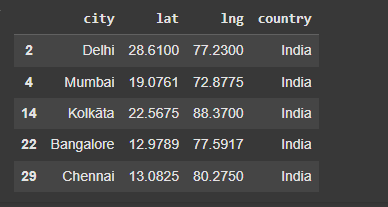

In [2]:
# Load the saved CSV
df_india = pd.read_csv('indian_major_cities.csv')

# Show the headers
print("Headers:\n", df_india.columns)


Headers: Index(['city', 'lat', 'lng', 'country'], dtype='object')


**Till this step we collected extracted only indian cities from the global major cities with their lat and lng  **

In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv('indian_major_cities.csv')

# Drop the 'country' column
df = df.drop(columns=['country'])

# Save it back (overwrite or save with new name)
df.to_csv('indian_major_cities.csv', index=False)

# Optional: Preview
print(df.head())


        city      lat      lng
0      Delhi  28.6100  77.2300
1     Mumbai  19.0761  72.8775
2    Kolkāta  22.5675  88.3700
3  Bangalore  12.9789  77.5917
4    Chennai  13.0825  80.2750


# ** Collecting the 2024 weather data for this major Indian Cites from NASA API**

In [ ]:
import pandas as pd
import aiohttp
import asyncio
import time

# Load city data from CSV
cities_df = pd.read_csv("indian_major_cities.csv")

# List to hold all data rows
weather_data = []

# Set the number of cities to process (5000 for now)
max_cities_to_process = 5000  # Process first 5000 cities

# Async function to fetch weather data
async def fetch_weather_data(session, city, lat, lon):
    print(f"Fetching data for {city}...")

    url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,T2M_MAX,T2M_MIN,WS2M,RH2M,PRECTOTCORR,PS",
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": "20240101",
        "end": "20241220",
        "format": "JSON"
    }

    async with session.get(url, params=params) as response:
        if response.status == 200:  # Change from status_code to status
            data = await response.json()
            parameters = data['properties']['parameter']

            # Reformat data to rows
            for date in parameters['T2M'].keys():
                weather_data.append({
                    "City": city,
                    "Date": date,
                    "T2M": parameters['T2M'][date],
                    "T2M_MAX": parameters['T2M_MAX'][date],
                    "T2M_MIN": parameters['T2M_MIN'][date],
                    "WS2M": parameters['WS2M'][date],
                    "RH2M": parameters['RH2M'][date],
                    "PRECTOTCORR": parameters['PRECTOTCORR'][date],
                    "PS": parameters['PS'][date]
                })
            print(f"✅ {city} done.")
        else:
            print(f"❌ Failed to fetch {city}, status code: {response.status}")

# Function to manage all requests
async def fetch_all_weather_data():
    async with aiohttp.ClientSession() as session:
        tasks = []
        for index, row in cities_df.iterrows():
            if index >= max_cities_to_process:  # Stop after processing 5000 cities
                break

            city = row['city']
            lat = row['lat']
            lon = row['lng']

            # Fetch only the first 5000 cities
            tasks.append(fetch_weather_data(session, city, lat, lon))

        await asyncio.gather(*tasks)

# Start the asynchronous requests
start_time = time.time()
await fetch_all_weather_data()
end_time = time.time()

print(f"Data fetched in {end_time - start_time:.2f} seconds")

# Save the data in chunks after every 1000 rows
def save_chunk(data, chunk_number):
    df = pd.DataFrame(data)
    df.to_csv(f"india_city_weather_data_chunk_{chunk_number}.csv", index=False)
    print(f"Saved chunk {chunk_number}")

# Save in chunks of 1000
def save_data_in_chunks():
    chunk_size = 1000
    chunk_number = 1
    current_chunk = []

    for data_row in weather_data:
        current_chunk.append(data_row)

        if len(current_chunk) >= chunk_size:
            save_chunk(current_chunk, chunk_number)
            chunk_number += 1
            current_chunk = []

    # Save any remaining data after loop
    if current_chunk:
        save_chunk(current_chunk, chunk_number)

save_data_in_chunks()


Streaming output truncated to the last 5000 lines.
✅ Nandurbar done.
✅ Purwa Utar done.
✅ Kovilpatti done.
✅ Titāgarh done.
✅ Shujālpur done.
✅ Jalpāiguri done.
✅ Suriāpet done.
✅ Sehore done.
✅ Kaliānpur done.
✅ Mancherāl done.
✅ Muktsar done.
✅ Islāmābād done.
✅ Bāgalkot done.
✅ Makrāna done.
✅ Gangāwati done.
✅ Dam Dam done.
✅ Tādpatri done.
✅ Gharbara done.
✅ Sundarnagar done.
✅ Kurichchi done.
✅ Kheda done.
✅ Shikohābād done.
✅ Sheopur done.
✅ Nautanwa done.
✅ Khardah done.
✅ Sultānpur done.
✅ Semāri done.
✅ Hindaun done.
✅ Bhilai Karanja done.
✅ Jamālpur done.
✅ Amarāvati done.
✅ Tādepallegūdem done.
✅ Brājarājnagar done.
✅ Negapatam done.
✅ Bānsbāria done.
✅ Būndi done.
✅ Bhadreswar done.
✅ Kishanganj done.
✅ Dhamtari done.
✅ Ballia done.
✅ Rishīkesh done.
✅ Buxar done.
✅ Sītāmarhi done.
✅ Tezpur done.
✅ Kāranja done.
✅ Kalyani done.
✅ Kapūrthala done.
✅ Aurangābād done.
✅ Sūjāngarh done.
✅ Madhavaram done.
✅ Datia done.
✅ Gangtok done.
✅ Barod done.
✅ Jeypore done.
✅ Kundli done.
✅ Rāneswar done.
✅ Port Blair done.
✅ Vāsco Da Gāma done.
✅ Abbigeri done.
✅ Seoni done.
✅ Khambhāliya done.
✅ Chilakalūrupet done.
✅ Amalner done.
✅ Tellicherry done.
✅ Itārsi done.
✅ Navalyal done.
✅ Dhuliān done.
✅ Luckeesarai done.
✅ Khambhāt done.
✅ Kohīma done.
✅ Tiruchengodu done.
✅ Kadaiyanallūr done.
✅ Chanwari done.
✅ Zerakpur done.
✅ Kārwār done.
✅ Harihar done.
✅ Kallūru done.
✅ Yalamakūru done.
✅ Tinsukia done.
✅ Bachhraon done.
✅ Bodināyakkanūr done.
✅ Deoni Buzurg done.
✅ Kot Kapūra done.
✅ Suramāla done.
✅ Sardārshahr done.
✅ Paramagudi done.
✅ Closepet done.
✅ Emmiganūr done.
✅ Chākdaha done.
✅ Silvassa done.
✅ Allinagaram done.
✅ Rāmnagar done.
✅ Rāyachoti done.
✅ Dhār done.
✅ Marmagao done.
✅ Bhadohi done.
✅ Māndvi done.
✅ Tandwa done.
✅ Nagīna done.
✅ Pedagādi done.
✅ Akot done.
✅ Lachhmangarh Sīkar done.
✅ Jamūī done.
✅ Nirmal done.
✅ Madgaon done.
✅ Vāniyambādi done.
✅ Nīmbāhera done.
✅ Pollāchi done.
✅ Najībābād done.
✅ Jumri Tilaiyā done.
✅ Rāsipuram done.
✅ Kangan done.
✅ Jāmtāra done.
✅ Sangrūr done.
✅ Tiruttani done.
✅ Contai done.
✅ Sankeshwar done.
✅ Chinnachauku done.
✅ Shahdol done.
✅ Kāvali done.
✅ Jangipur done.
✅ Kumārapālaiyam done.
✅ Ponnāni done.
✅ Pāloncha done.
✅ Sārni done.
✅ Bāsoda done.
✅ Palangotu Adwār done.
✅ Mhow done.
✅ Kairāna done.
✅ Aruppukkottai done.
✅ Nachchāndupatti done.
✅ Seoni Mālwa done.
✅ Saundatti done.
✅ Nirāla done.
✅ Kadiri done.
✅ Hānsi done.
✅ Karād done.
✅ Diphu done.
✅ Bhawānipatna done.
✅ Rāmagiri Udayagiri done.
✅ Pilkhua done.
✅ Krishnagiri done.
✅ Ootacamund done.
✅ Phusro done.
✅ Anakāpalle done.
✅ Farīdkot done.
✅ Maratturai done.
✅ Mettupālaiyam done.
✅ Arni done.
✅ Dhorāji done.
✅ Channapatna done.
✅ Gumlā done.
✅ Tiruppattūr done.
✅ Garulia done.
✅ Samadiāla done.
✅ Dobni Para done.
✅ Simdega done.
✅ Kadi done.
✅ Saunda done.
✅ Arāria done.
✅ Kottagūdem done.
✅ Chingleput done.
✅ Kuniyamuttūr done.
✅ Ashoknagar done.
✅ Arkonam done.
✅ Balrāmpur done.
✅ Lāharpur done.
✅ Mānsa done.
✅ Tīkamgarh done.
✅ Harda Khās done.
✅ Vīrappanchathiram done.
✅ Dahegām done.
✅ Khamānon Kalān done.
✅ Peruvancha done.
✅ Mannārgudi done.
✅ Baj Baj done.
✅ Tirkākara done.
✅ Bargarh done.
✅ Kāmāreddipet done.
✅ Gokulgarh done.
✅ Nipāni done.
✅ Kātoya done.
✅ Sirsilla done.
✅ Bolpur done.
✅ Shājāpur done.
✅ Yanam done.
✅ Kambam done.
✅ Koch Bihār done.
✅ Surendranagar done.
✅ Manmād done.
✅ Keshod done.
✅ Pattukkottai done.
✅ Bodhan done.
✅ Rānāghāt done.
✅ Chintāmani done.
✅ Fāzilka done.
✅ Ambājogāi done.
✅ Piro done.
✅ Dhrāngadhra done.
✅ Malappuram done.
✅ Tanuku done.
✅ Gokāk done.
✅ Gangammapeta done.
✅ Tindivanam done.
✅ Tirumangalam done.
✅ Chaklāsi done.
✅ Kallakkurichchi done.
✅ Garhi done.
✅ Bhadarwāh done.
✅ Tarn Tāran done.
✅ Mandlā done.
✅ Rāyadrug done.
✅ Gobindgarh done.
✅ Sangāreddi done.
✅ Tura done.
✅ Nilanga done.
✅ Siruguppa done.
✅ Vriddhāchalam done.
✅ Mangalagiri done.
✅ Hāveri done.
✅ Jaorā done.
✅ Wandiwāsh done.
✅ Virudunagar done.
✅ Fatehābād done.
✅ Malaut done.
✅ Khejroli done.
✅ Dabra done.
✅ Parappanangādi done.
✅ Gūdūr done.
✅ Gaura done.
✅ Pardigūda done.
✅ Srīvilliputtūr done.
✅ Kāsipālaiyam done.
✅ Bilāra done.
✅ Tāndūr done.
✅ Warora done.
✅ Kodungallūr done.
✅ Badvel done.
✅ Mārkāpur done.
✅ Sūratgarh done.
✅ Parādīp Garh done.
✅ Sankaranayinār Kovil done.
✅ Rāyagada done.
✅ Ratangarh done.
✅ Quilāndi done.
✅ Tripunittura done.
✅ Nāndūra Buzurg done.
✅ Dhārāpuram done.
✅ Modāsa done.
✅ Rājsamand done.
✅ Satyamangalam done.
✅ Dhenkānāl done.
✅ Bijaynagar done.
✅ Basavakalyān done.
✅ Neyyāttinkara done.
✅ Nowrangapur done.
✅ Varisshiyakuni done.
✅ Bāpatla done.
✅ Ilkal done.
✅ Pālghar done.
✅ Mīrpeta done.
✅ Pakribarawān done.
✅ Farīdpur done.
✅ Anjangaon done.
✅ Nihtaur done.
✅ Kalamasseri done.
✅ Bishnupur done.
✅ Dandeli done.
✅ Gauravaram done.
✅ Puliyankudi done.
✅ Vālpārai done.
✅ Urun-Islāmpur done.
✅ Avaniyāpuram done.
✅ Jagoniguda done.
✅ Jaisalmer done.
✅ Beypore done.
✅ Gopālganj done.
✅ Dharmasāgaram done.
✅ Kodoli done.
✅ Siuri done.
✅ Koratla done.
✅ Hasanpur done.
✅ Siddipet done.
✅ Gohna done.
✅ Kāyankulam done.
✅ Vaijāpur done.
✅ Madhipura done.
✅ Guruvāyūr done.
✅ Pulivendla done.
✅ Phalodi done.
✅ Sahaswān done.
✅ Renukūt done.
✅ Sausar done.
✅ Dhūri done.
✅ Sirsi done.
✅ Arāmbāgh done.
✅ Alīpur Duār done.
✅ Nābha done.
✅ Kānhangād done.
✅ Chakpi Karong done.
✅ Narapalli done.
✅ Tamlūk done.
✅ Pidugurālla done.
✅ Dharmapuri done.
✅ Sangamner done.
✅ Rāth done.
✅ Kurabūr done.
✅ Keitumkawn done.
✅ Sinnar done.
✅ Jagraon done.
✅ Idappādi done.
✅ Hiriyūr done.
✅ Tohāna done.
✅ Giddarbāha done.
✅ Bankra done.
✅ Visnagar done.
✅ Sheikhpura done.
✅ Wāshīm done.
✅ Athni done.
✅ Armūr done.
✅ Kodād done.
✅ Tādepalle done.
✅ Halvad done.
✅ Nawalgarh done.
✅ Jatani done.
✅ Bhabhua done.
✅ Gadwāl done.
✅ Khagaul done.
✅ Sundapālaiyam done.
✅ Chidambaram done.
✅ Chik Ballāpur done.
✅ Okha done.
✅ Dhuburi done.
✅ Pāmūru done.
✅ Narwāna done.
✅ Jhārgrām done.
✅ Wanparti done.
✅ Rāmanāthapuram done.
✅ Kathua done.
✅ Bāri done.
✅ Udamalpet done.
✅ Trikonavattam done.
✅ Sirsi done.
✅ Nanjangūd done.
✅ Nānpāra done.
✅ Sherkot done.
✅ Siddhapur done.
✅ Kukarmunda done.
✅ Rāzampeta done.
✅ Zahirābād done.
✅ Velampālaiyam done.
✅ Kesamudram done.
✅ Pālitāna done.
✅ Rānipet done.
✅ Nagari done.
✅ Rāghogarh done.
✅ Nedumangād done.
✅ Tirukkoyilūr done.
✅ Thatri done.
✅ Chandralapādu done.
✅ Gunupur done.
✅ Khagaria done.
✅ Hunsūr done.
✅ Pāchora done.
✅ Tiptūr done.
✅ North Lakhimpur done.
✅ Vinukonda done.
✅ Una done.
✅ Panruti done.
✅ Upleta done.
✅ Chāmrājnagar done.
✅ Panna done.
✅ Sillod done.
✅ Narasapur done.
✅ Binnāguri done.
✅ Pipariā done.
✅ Rājgarh done.
✅ Gohadi done.
✅ Tiruvālūr done.
✅ Dumraon done.
✅ Mulbāgal done.
✅ Nanjakkād done.
✅ Wani done.
✅ Gopichettipālaiyam done.
✅ Dhone done.
✅ Mehnājpur done.
✅ Hastināpur done.
✅ Pānskura done.
✅ Itānagar done.
✅ Unjha done.
✅ Bīmgal done.
✅ Palāsa done.
✅ Sandīla done.
✅ Ponnūru done.
✅ Vrindāvan done.
✅ Bail-Hongal done.
✅ Mācherla done.
✅ Kollegāl done.
✅ Bilimora done.
✅ Sonabedha done.
✅ Kothāpet done.
✅ Sardhana done.
✅ Keonjhargarh done.
✅ Lohārdagā done.
✅ Rāmpur Hat done.
✅ Maduraivayal done.
✅ Bobbili done.
✅ Lonāvale done.
✅ Poonamallee done.
✅ Naugaon Sādāt done.
✅ Karīmganj done.
✅ Kandukūr done.
✅ Gūdalur done.
✅ Khandāla done.
✅ Diglipur done.
✅ Sāmalkot done.
✅ Sendhwa done.
✅ Nasīrabād done.
✅ Sattenapalle done.
✅ Chintalapalli done.
✅ Sīra done.
✅ Talegaon Dābhāde done.
✅ Gangārāmpur done.
✅ Mandapeta done.
✅ Kālna done.
✅ Pithorāgarh done.
✅ Puthiyangādi done.
✅ Tirur done.
✅ Barwāni done.
✅ Māngrol done.
✅ Lunglei done.
✅ Chālil done.
✅ Kengri done.
✅ Ropar done.
✅ Belampalli done.
✅ Ajodhya done.
✅ Kharar done.
✅ Biswān done.
✅ Punganūru done.
✅ Kāndi done.
✅ Tiruvallūr done.
✅ Raxaul done.
✅ Viramgām done.
✅ Harpanahalli done.
✅ Atchampeta done.
✅ Erumaippatti done.
✅ Madhupur done.
✅ Bhīmunipatnam done.
✅ Puttūr done.
✅ Challakere done.
✅ Tāsgaon done.
✅ Chonthrhu done.
✅ Palmaner done.
✅ Umred done.
✅ Fālākāta done.
✅ Polūr done.
✅ Kannamangalam done.
✅ Khurai done.
✅ Pithāpuram done.
✅ Ghātāl done.
✅ Sāgar done.
✅ Deolāli done.
✅ Jalor done.
✅ Jaggayyapeta done.
✅ Nāmakkal done.
✅ Nāndod done.
✅ Bhongīr done.
✅ Periya Semūr done.
✅ Kāliyāganj done.
✅ Dholka done.
✅ Islāmpur done.
✅ Ashta done.
✅ Mansāla done.
✅ Ottappālam done.
✅ Tilhar done.
✅ Mūndka done.
✅ Rāhuri done.
✅ Samāna done.
✅ Kāsaragod done.
✅ Sidhi done.
✅ Amalāpuram done.
✅ Arsikere done.
✅ Sohna done.
✅ Bakhtiyārpur done.
✅ Vaisampākkal done.
✅ Pārvatipuram done.
✅ Ilindu Kothi done.
✅ Manjeri done.
✅ Puttūr done.
✅ Shāhpur done.
✅ Sihor done.
✅ Phaltan done.
✅ Goālpāra done.
✅ Daudnagar done.
✅ Arwal done.
✅ Jangaon done.
✅ Manglaur done.
✅ Nerkunram done.
✅ Mandi Dabwāli done.
✅ Kumarankari done.
✅ Kunnamkulam done.
✅ Khattan done.
✅ Badūria done.
✅ Mudhol done.
✅ Ullāl done.
✅ Lakhminia done.
✅ Sironj done.
✅ Venkatagiri done.
✅ Diu done.
✅ Jiyyammavalasa done.
✅ Todupulai done.
✅ Korāput done.
✅ Bāruipur done.
✅ Aurangābād done.
✅ Bhavāni done.
✅ Tiruvalla done.
✅ Vikārābād done.
✅ Sultānganj done.
✅ Tirupparangunram done.
✅ Irinjālakuda done.
✅ Mahmudābād done.
✅ Bikramganj done.
✅ Repalle done.
✅ Zangāreddigūdem done.
✅ Mandamāri done.
✅ Hodal done.
✅ Dabhoi done.
✅ Jaspur done.
✅ Ānaiyūr done.
✅ Peranāmpattu done.
✅ Puthuppariyāram done.
✅ Bowringpet done.
✅ Forbesganj done.
✅ Patancheruvu done.
✅ Fatwa done.
✅ Pardwāl done.
✅ Kālpi done.
✅ Bhadrāchalam done.
✅ Gādarwāra done.
✅ Metpalli done.
✅ Kuchaiburi done.
✅ Sujānpur done.
✅ Sibsāgar done.
✅ Kosamba done.
✅ Tūndla done.
✅ Rongat done.
✅ Burla done.
✅ Shiv done.
✅ Sidlaghatta done.
✅ Vyāra done.
✅ Marpalli done.
✅ Laksar done.
✅ Nohar done.
✅ Kizhake Chālakudi done.
✅ Biaora done.
✅ Peddāpuram done.
✅ Bhattu Kolān done.
✅ Tammampatti done.
✅ Bhawānīpur Rājdhām done.
✅ Sojat done.
✅ Chatrā done.
✅ Perambalūr done.
✅ Sihorā done.
✅ Bar Bigha done.
✅ Naugachhia done.
✅ Parāsia done.
✅ Kapadvanj done.
✅ Perintalmanna done.
✅ Bhainsa done.
✅ Padrauna done.
✅ Guntakal Junction done.
✅ Gooty done.
✅ Jaggisettigūdem done.
✅ Bantvāl done.
✅ Nizāmpur done.
✅ Rāmnagar done.
✅ Koduvalli done.
✅ Chinnamanūr done.
✅ Bāghpat done.
✅ Payyoli done.
✅ Tennala done.
✅ Kīlvishāram done.
✅ Joshīmath done.
✅ Upperu done.
✅ Bokāro done.
✅ Hoskote done.
✅ Sulleru done.
✅ Prattipādu done.
✅ Hilsa done.
✅ Vikramasingapuram done.
✅ Khairābād done.
✅ Homnābād done.
✅ Jiāganj done.
✅ Azhikkōd done.
✅ Nāngal Township done.
✅ Mājalgaon done.
✅ Bādurpalle done.
✅ Bhatkal done.
✅ Dūngarpur done.
✅ Pallipālaiyam done.
✅ Nellikkuppam done.
✅ Godda done.
✅ Aland done.
✅ Sadāseopet done.
✅ Jammalamadugu done.
✅ Gumia done.
✅ Vite done.
✅ Atarra done.
✅ Dumka done.
✅ Sikandra Rao done.
✅ Azhikkal done.
✅ Manappārai done.
✅ Nilambūr done.
✅ Hagaribommanahalli done.
✅ Mēla Gūdalūr done.
✅ Jasdan done.
✅ Kampli done.
✅ Mangalapādi done.
✅ Padra done.
✅ Warud done.
✅ Dharmaragar done.
✅ Obra done.
✅ Vuyyūru done.
✅ Garhwa done.
✅ Pākaur done.
✅ Chandrāwāda done.
✅ Nandikotkūr done.
✅ Mattanūr done.
✅ Selu done.
✅ Jalandhar Cantonment done.
✅ Rānāvāv done.
✅ Umarkhed done.
✅ Bhālki done.
✅ Nawāshahr done.
✅ Coonoor done.
✅ Thoubāl done.
✅ Bihāt done.
✅ Kumta done.
✅ Changanācheri done.
✅ Anandpur done.
✅ Rājgarh done.
✅ Nawai done.
✅ Punalūr done.
✅ Gollalagunta done.
✅ Shertallai done.
✅ Chattamangalam done.
✅ Farrukhnagar done.
✅ Mahālingpur done.
✅ Chalungalpādam done.
✅ Kadinamkulam done.
✅ Ganapathivattam done.
✅ Guledagudda done.
✅ Arantāngi done.
✅ Bhāyala done.
✅ Ālamūru done.
✅ Sundargarh done.
✅ Kedgaon done.
✅ Dhupgāri done.
✅ Mānvi done.
✅ Muddebihāl done.
✅ Charkhi Dādri done.
✅ Sachīn done.
✅ Gobārdānga done.
✅ Sainthia done.
✅ Nalegaon done.
✅ Majurwa done.
✅ Rāmeswaram done.
✅ Nandigāma done.
✅ Karvārakundu done.
✅ Rāpūr done.
✅ Melūr done.
✅ Talipparamba done.
✅ Dowlaiswaram done.
✅ Rājaldesar done.
✅ Shekhupur done.
✅ Barnagar done.
✅ Jora done.
✅ Ahmadpur done.
✅ Nāyudupet done.
✅ Murshidābād done.
✅ Jangamguda done.
✅ Dīg done.
✅ Angul done.
✅ Dalli Rājhara done.
✅ Medak done.
✅ Raisen done.
✅ Ellenabad done.
✅ Siyāna done.
✅ Wānkāner done.
✅ Rudauli done.
✅ Bodupāl done.
✅ Barwāh done.
✅ Porsa done.
✅ Jānakammapeta done.
✅ Sihora done.
✅ Jambusar done.
✅ Ananipalle done.
✅ Saoner done.
✅ Bhatpalli done.
✅ Seohāra done.
✅ Chembra done.
✅ Kāyalpattanam done.
✅ Pratāpgarh done.
✅ Addanki done.
✅ Barauli done.
✅ Kottangara done.
✅ Dildārnagar done.
✅ Shōranūr done.
✅ Periyakulam done.
✅ Nidadavole done.
✅ Anekal done.
✅ Nilothi done.
✅ Allūru done.
✅ Jājpur done.
✅ Mahbūbābād done.
✅ Muttayyāpuram done.
✅ Kōttōppādam done.
✅ Yeola done.
✅ Rāmachandrapuram done.
✅ Dhāka done.
✅ Kattivākkam done.
✅ Pirthīpur done.
✅ Kadalur done.
✅ Kharik done.
✅ Barhiya done.
✅ Ambāsamudram done.
✅ Thol done.
✅ Sānand done.
✅ Kodīnar done.
✅ Palladam done.
✅ Kārmegh done.
✅ Nārāyanpet done.
✅ Kālol done.
✅ Indi done.
✅ Barpeta done.
✅ Bairāgnia done.
✅ Jambughoda done.
✅ Limbdi done.
✅ Kendrāparha done.
✅ Laungowāl done.
✅ Kārsiyāng done.
✅ Thān done.
✅ Sālār done.
✅ Akbarpur done.
✅ Anakaputtur done.
✅ Nāikankudi done.
✅ Nāthdwāra done.
✅ Rajaori done.
✅ Hālol done.
✅ Agar done.
✅ Jayamkondacholapuram done.
✅ Peddapalli done.
✅ Sūrampatti done.
✅ Saidpur Dabra done.
✅ Sagauli done.
✅ Naini Tal done.
✅ Golāghāt done.
✅ Berubāri done.
✅ Tālcher done.
✅ Shutayil done.
✅ Paliā Kalān done.
✅ Erramvāripālem done.
✅ Diamond Harbour done.
✅ Pīleru done.
✅ Pāmban done.
✅ Kallār done.
✅ Memāri done.
✅ Dhamdāha done.
✅ Cherupulasshēri done.
✅ Rāmganj Mandi done.
✅ Talukkara done.
✅ Buddh Gaya done.
✅ Nalhāti done.
✅ Kadūr done.
✅ Trikarpūr North done.
✅ Rājgīr done.
✅ Qādiān done.
✅ Sherghāti done.
✅ Mārākkara done.
✅ Pālampur done.
✅ Channarāyapatna done.
✅ Bilāsipāra done.
✅ Patti done.
✅ Jhābua done.
✅ Murtajāpur done.
✅ Jānjgīr done.
✅ Pilāni done.
✅ Vavveru done.
✅ Krishnarājāsāgara done.
✅ Peringalam done.
✅ Vellakkovil done.
✅ Mundakkal done.
✅ Kunigal done.
✅ Erattukulakkada done.
✅ Phulwāria done.
✅ Merta done.
✅ Bāsudebpur done.
✅ Nowgong done.
✅ Junnar done.
✅ Kālimpong done.
✅ Mailapur done.
✅ Sabalgarh done.
✅ Jogbani done.
✅ Kīlakkarai done.
✅ Panaji done.
✅ Varkkallai done.
✅ Kovvūr done.
✅ Atmakūr done.
✅ Kakrāla done.
✅ Amudālavalasa done.
✅ Uttarkāshi done.
✅ Partāpnagar done.
✅ Vādāsinor done.
✅ Mayyanād done.
✅ Solan done.
✅ Tiruchendūr done.
✅ Begamganj done.
✅ Maihar done.
✅ Rājgarh done.
✅ Pachrūkha done.
✅ Pehowa done.
✅ Samālkha done.
✅ Sardulgarh done.
✅ Seram done.
✅ Wādegaon done.
✅ Bādepalli done.
✅ Wālājāpet done.
✅ Revelganj done.
✅ Mehidpur done.
✅ Sijua done.
✅ Vetapālem done.
✅ Tinnanūr done.
✅ Sindgi done.
✅ Khāchrod done.
✅ Rājula done.
✅ Idangansālai done.
✅ Salaiya done.
✅ Penumūr done.
✅ Lālganj done.
✅ Chittaranjan done.
✅ Nawābganj done.
✅ Birmitrapur done.
✅ Melmadai done.
✅ Chikodi done.
✅ Islāmpur done.
✅ Hailākāndi done.
✅ Rāmdurg done.
✅ Vengat done.
✅ Mahādeopur done.
✅ Ayirāpuram done.
✅ Cheyyār done.
✅ Nallūr done.
✅ Dhanera done.
✅ Amla done.
✅ Buchireddipālem done.
✅ Tuvāgudi done.
✅ Betamcherla done.
✅ Paravūrkambolam done.
✅ Dwārka done.
✅ Huzūrābād done.
✅ Gurais done.
✅ Nūrpur done.
✅ Shankarpur Khawās done.
✅ Pathanāmthitta done.
✅ Pallipram done.
✅ Pen done.
✅ Srīnagar done.
✅ Mamun done.
✅ Porur done.
✅ Thakraha done.
✅ Rāni done.
✅ Sandūr done.
✅ Khairtal done.
✅ Gomoh done.
✅ Charaut done.
✅ Goribidnūr done.
✅ Karuvambram done.
✅ Jāle done.
✅ Rāwatbhāta done.
✅ Tāki done.
✅ Coondapoor done.
✅ Satānā done.
✅ Aklera done.
✅ Dubrājpur done.
❌ Failed to fetch Giddalūr, status code: 429
❌ Failed to fetch Pāppinisshēri, status code: 429
❌ Failed to fetch Tāzhakara, status code: 429
❌ Failed to fetch Pandaul, status code: 429
❌ Failed to fetch Bibhutpur, status code: 429
❌ Failed to fetch Rāwatsār, status code: 429
❌ Failed to fetch Pulppatta, status code: 429
❌ Failed to fetch Yellandu, status code: 429
❌ Failed to fetch Māranchēri, status code: 429
❌ Failed to fetch Wokha, status code: 429
❌ Failed to fetch Bāpaura, status code: 429
❌ Failed to fetch Chiplūn, status code: 429
❌ Failed to fetch Harra, status code: 429
✅ Jaito done.
❌ Failed to fetch Mel Nāriyappanūr, status code: 429
❌ Failed to fetch Dulhanganj, status code: 429
❌ Failed to fetch Karumattampatti, status code: 429
❌ Failed to fetch Lingsugūr, status code: 429
❌ Failed to fetch Shīyāli, status code: 429
❌ Failed to fetch Madukkarai, status code: 429
❌ Failed to fetch Alandatte, status code: 429
❌ Failed to fetch Vadigenhalli, status code: 429
❌ Failed to fetch Hīrākud, status code: 429
❌ Failed to fetch Munnarkōd, status code: 429
❌ Failed to fetch Mannārakkāt, status code: 429
❌ Failed to fetch Āllagadda, status code: 429
❌ Failed to fetch Khajamahalpur, status code: 429
✅ Phulbāni done.
❌ Failed to fetch Safidon, status code: 429
❌ Failed to fetch Kolattupuzha, status code: 429
❌ Failed to fetch Dhāmnod, status code: 429
❌ Failed to fetch Mānāmadurai, status code: 429
✅ Hatta done.
❌ Failed to fetch Marutharōd, status code: 429
❌ Failed to fetch Banda, status code: 429
❌ Failed to fetch Paithan, status code: 429
❌ Failed to fetch Dāpoli, status code: 429
❌ Failed to fetch Kulittalai, status code: 429
❌ Failed to fetch Ankola, status code: 429
❌ Failed to fetch Madakalavāripalli, status code: 429
❌ Failed to fetch Zaidpur, status code: 429
❌ Failed to fetch Kita Chauhāttar, status code: 429
❌ Failed to fetch Degāna, status code: 429
❌ Failed to fetch Kalarūch, status code: 429
❌ Failed to fetch Aiyappan Kōvil, status code: 429
❌ Failed to fetch Vedāranniyam, status code: 429
❌ Failed to fetch Baraidih, status code: 429
❌ Failed to fetch Badiadka, status code: 429
❌ Failed to fetch Tiruvūr, status code: 429
❌ Failed to fetch Kokrajhar, status code: 429
❌ Failed to fetch Risod, status code: 429
❌ Failed to fetch Almora, status code: 429
❌ Failed to fetch Balarāmpur, status code: 429
❌ Failed to fetch Titlāgarh, status code: 429
❌ Failed to fetch Wāris Alīganj, status code: 429
❌ Failed to fetch Jāmkhed, status code: 429
❌ Failed to fetch Rūdarpur, status code: 429
❌ Failed to fetch Kallidaikurichi, status code: 429
❌ Failed to fetch Annigeri, status code: 429
❌ Failed to fetch Pulgaon, status code: 429
❌ Failed to fetch Mulavūr, status code: 429
❌ Failed to fetch Toda Bhīm, status code: 429
❌ Failed to fetch Byādgi, status code: 429
❌ Failed to fetch Kadungapuram, status code: 429
✅ Manali done.
❌ Failed to fetch Bangaon, status code: 429
❌ Failed to fetch Narsīpatnam, status code: 429
❌ Failed to fetch Kaippakanchēri, status code: 429
❌ Failed to fetch Vemalwāda, status code: 429
❌ Failed to fetch Chāvakkād, status code: 429
❌ Failed to fetch Kasba, status code: 429
❌ Failed to fetch Manganam, status code: 429
❌ Failed to fetch Chempalli, status code: 429
❌ Failed to fetch Dhekiajuli, status code: 429
❌ Failed to fetch Mangalam, status code: 429
❌ Failed to fetch Vettam, status code: 429
✅ Pilibangan done.
❌ Failed to fetch Madhubani, status code: 429
❌ Failed to fetch Darsi, status code: 429
❌ Failed to fetch Angamāli, status code: 429
❌ Failed to fetch Sirīpur, status code: 429
✅ Basavana Bāgevādi done.
❌ Failed to fetch Madikeri, status code: 429
❌ Failed to fetch Bāmaur, status code: 429
❌ Failed to fetch Kondapalle, status code: 429
❌ Failed to fetch Hisuā, status code: 429
❌ Failed to fetch Churi, status code: 429
❌ Failed to fetch Kidamangalam, status code: 429
❌ Failed to fetch Zamānia, status code: 429
❌ Failed to fetch Kavundappādi, status code: 429
❌ Failed to fetch Shamsābād, status code: 429
❌ Failed to fetch Kartārpur, status code: 429
❌ Failed to fetch Shikārpūr, status code: 429
❌ Failed to fetch Borne, status code: 429
❌ Failed to fetch Umaria, status code: 429
❌ Failed to fetch Tekkebhāgam, status code: 429
❌ Failed to fetch Chanderi, status code: 429
❌ Failed to fetch Kareli, status code: 429
❌ Failed to fetch Hāngal, status code: 429
❌ Failed to fetch Turkauliyā, status code: 429
❌ Failed to fetch Elesvaram, status code: 429
❌ Failed to fetch Fatehpur Sīkri, status code: 429
❌ Failed to fetch Patrātu, status code: 429
❌ Failed to fetch Sānchor, status code: 429
✅ Ratia done.
❌ Failed to fetch Lohagaon, status code: 429
❌ Failed to fetch Ārumuganeri, status code: 429
❌ Failed to fetch Umarkot, status code: 429
❌ Failed to fetch Parambil, status code: 429
❌ Failed to fetch Udaipur, status code: 429
❌ Failed to fetch Chand Chaur, status code: 429
❌ Failed to fetch Mankada, status code: 429
❌ Failed to fetch Kallūr, status code: 429
❌ Failed to fetch Debagrām, status code: 429
❌ Failed to fetch Vadavalli, status code: 429
❌ Failed to fetch Vilakkudi, status code: 429
❌ Failed to fetch Nānjikkottai, status code: 429
❌ Failed to fetch Jamikunta, status code: 429
❌ Failed to fetch Tārānagar, status code: 429
❌ Failed to fetch Belhi, status code: 429
❌ Failed to fetch Shamsābād, status code: 429
❌ Failed to fetch Erraguntla, status code: 429
❌ Failed to fetch Chēmanchēri, status code: 429
❌ Failed to fetch Mānwat, status code: 429
❌ Failed to fetch Ketti, status code: 429
❌ Failed to fetch Turaiyūr, status code: 429
❌ Failed to fetch Chemmaruthi, status code: 429
❌ Failed to fetch Chamtha, status code: 429
❌ Failed to fetch Pattanapuram, status code: 429
❌ Failed to fetch Narsinghgarh, status code: 429
❌ Failed to fetch Sāsthānkotta, status code: 429
❌ Failed to fetch Kalyandrug, status code: 429
❌ Failed to fetch Tattamangalam, status code: 429
❌ Failed to fetch Erāmala, status code: 429
❌ Failed to fetch Utraula, status code: 429
❌ Failed to fetch Kāngayam, status code: 429
❌ Failed to fetch Kukshi, status code: 429
❌ Failed to fetch Mangūr, status code: 429
❌ Failed to fetch Rādhanpur, status code: 429
❌ Failed to fetch Kovūr, status code: 429
❌ Failed to fetch Munnar, status code: 429
❌ Failed to fetch Akivīdu, status code: 429
❌ Failed to fetch Makhdumpur, status code: 429
❌ Failed to fetch Purāini, status code: 429
❌ Failed to fetch Tholikuzhi, status code: 429
❌ Failed to fetch Palamel, status code: 429
❌ Failed to fetch Purattūr, status code: 429
❌ Failed to fetch Alengād, status code: 429
❌ Failed to fetch Maur Kalān, status code: 429
❌ Failed to fetch Sherpur, status code: 429
❌ Failed to fetch Jhanjhārpur, status code: 429
❌ Failed to fetch Alamnagar, status code: 429
❌ Failed to fetch Bagasra, status code: 429
❌ Failed to fetch Kottaikuppam, status code: 429
❌ Failed to fetch Velliyōd, status code: 429
❌ Failed to fetch Singia, status code: 429
❌ Failed to fetch Tekkēkara Kizhakku, status code: 429
❌ Failed to fetch Sadābād, status code: 429
❌ Failed to fetch Kochugaon, status code: 429
❌ Failed to fetch Tuljāpur, status code: 429
❌ Failed to fetch Lālgola, status code: 429
❌ Failed to fetch Masur, status code: 429
❌ Failed to fetch Nautan Dube, status code: 429
❌ Failed to fetch Thazhamel, status code: 429
❌ Failed to fetch Rāhatgarh, status code: 429
❌ Failed to fetch Shikārpur, status code: 429
❌ Failed to fetch Kurivikod, status code: 429
❌ Failed to fetch Charthāwal, status code: 429
❌ Failed to fetch Samdhin, status code: 429
❌ Failed to fetch Nauāgarhi, status code: 429
❌ Failed to fetch Deori Khās, status code: 429
❌ Failed to fetch Kunnatnād, status code: 429
❌ Failed to fetch Kolachel, status code: 429
❌ Failed to fetch Sanha, status code: 429
❌ Failed to fetch Vellanād, status code: 429
❌ Failed to fetch Sri Mādhopur, status code: 429
❌ Failed to fetch Lumding, status code: 429
❌ Failed to fetch Sherpur Khurd, status code: 429
❌ Failed to fetch Vadakakarai, status code: 429
❌ Failed to fetch Nāspur, status code: 429
❌ Failed to fetch Unchagao, status code: 429
❌ Failed to fetch Rusera, status code: 429
❌ Failed to fetch Bramhapuri, status code: 429
❌ Failed to fetch Podili, status code: 429
❌ Failed to fetch Shrīgonda, status code: 429
❌ Failed to fetch Kalliyasshēri, status code: 429
❌ Failed to fetch Malaikkal, status code: 429
❌ Failed to fetch Tummapāla, status code: 429
❌ Failed to fetch Mushābani, status code: 429
❌ Failed to fetch Karera, status code: 429
❌ Failed to fetch Malakanagiri, status code: 429
❌ Failed to fetch Tarakeswar, status code: 429
❌ Failed to fetch Bādāmi, status code: 429
❌ Failed to fetch Husainābād, status code: 429
❌ Failed to fetch Bairi Chak, status code: 429
❌ Failed to fetch Leh, status code: 429
❌ Failed to fetch Pattanakkād, status code: 429
❌ Failed to fetch Sholinghur, status code: 429
❌ Failed to fetch Dharampur, status code: 429
❌ Failed to fetch Mānāvadar, status code: 429
❌ Failed to fetch Palaiya Āyakkudi, status code: 429
❌ Failed to fetch Chinnālapatti, status code: 429
❌ Failed to fetch Pattittara, status code: 429
❌ Failed to fetch Mahemdāvād, status code: 429
❌ Failed to fetch Gadarpur, status code: 429
❌ Failed to fetch Ulliyeri, status code: 429
❌ Failed to fetch Tekkali, status code: 429
❌ Failed to fetch Pedana, status code: 429
❌ Failed to fetch Mattathūr, status code: 429
❌ Failed to fetch Pandua, status code: 429
❌ Failed to fetch Bābura, status code: 429
❌ Failed to fetch Bannūr, status code: 429
❌ Failed to fetch Chengam, status code: 429
❌ Failed to fetch Devarshola, status code: 429
❌ Failed to fetch Talakkād, status code: 429
❌ Failed to fetch Sankaramangalam, status code: 429
❌ Failed to fetch Nāgāwaram, status code: 429
❌ Failed to fetch Gariadhar, status code: 429
❌ Failed to fetch Maināguri, status code: 429
❌ Failed to fetch Karuvakulam, status code: 429
❌ Failed to fetch Uran, status code: 429
❌ Failed to fetch Karjan, status code: 429
❌ Failed to fetch Mūvattupula, status code: 429
❌ Failed to fetch Manāwar, status code: 429
❌ Failed to fetch Kūttānallūr, status code: 429
❌ Failed to fetch Dhāri, status code: 429
❌ Failed to fetch Mānsa, status code: 429
❌ Failed to fetch Rehli, status code: 429
✅ Gajendragarh done.
❌ Failed to fetch Shāhpura, status code: 429
❌ Failed to fetch Sallimedu, status code: 429
❌ Failed to fetch Koni, status code: 429
❌ Failed to fetch Chimākurti, status code: 429
❌ Failed to fetch Tāramangalam, status code: 429
❌ Failed to fetch Kaipram, status code: 429
✅ Vettūr done.
❌ Failed to fetch Anjad, status code: 429
❌ Failed to fetch Periyanāyakkanpālaiyam, status code: 429
❌ Failed to fetch Egra, status code: 429
❌ Failed to fetch Kanniparamba, status code: 429
❌ Failed to fetch Mussoorie, status code: 429
❌ Failed to fetch Saktī, status code: 429
❌ Failed to fetch Rahīmpur, status code: 429
❌ Failed to fetch Elūr, status code: 429
❌ Failed to fetch Kondarangi Kīranūr, status code: 429
❌ Failed to fetch Nethirimangalam, status code: 429
❌ Failed to fetch Mahugaon, status code: 429
❌ Failed to fetch Mārgrām, status code: 429
❌ Failed to fetch Jamālpur, status code: 429
❌ Failed to fetch Ārda, status code: 429
❌ Failed to fetch Mundāhal Khurd, status code: 429
❌ Failed to fetch Hasanparti, status code: 429
❌ Failed to fetch Rānpur, status code: 429
❌ Failed to fetch Pātri, status code: 429
❌ Failed to fetch Salāya, status code: 429
❌ Failed to fetch Edasshēri, status code: 429
❌ Failed to fetch Mundi, status code: 429
❌ Failed to fetch Padappakara, status code: 429
❌ Failed to fetch Sāgwāra, status code: 429
❌ Failed to fetch Tirwa, status code: 429
❌ Failed to fetch Kaluvāya, status code: 429
❌ Failed to fetch Masabdisa, status code: 429
❌ Failed to fetch Māgadi, status code: 429
❌ Failed to fetch Bāghmāri, status code: 429
❌ Failed to fetch Sarpavaram, status code: 429
❌ Failed to fetch Dhandhuka, status code: 429
❌ Failed to fetch Saundhonwāli, status code: 429
❌ Failed to fetch Koratgi, status code: 429
❌ Failed to fetch Pārakadavu, status code: 429
❌ Failed to fetch Navāpur, status code: 429
❌ Failed to fetch Riga, status code: 429
❌ Failed to fetch Kottūru, status code: 429
❌ Failed to fetch Birūr, status code: 429
❌ Failed to fetch Marhaura, status code: 429
❌ Failed to fetch Triprangōttūr, status code: 429
❌ Failed to fetch Ozhūr, status code: 429
❌ Failed to fetch Pānakkudi, status code: 429
❌ Failed to fetch Kodayattūr, status code: 429
❌ Failed to fetch Krishnarājpet, status code: 429
❌ Failed to fetch Tiruvēgapra, status code: 429
❌ Failed to fetch Talwāra, status code: 429
❌ Failed to fetch Madavur, status code: 429
❌ Failed to fetch Puthupalli, status code: 429
❌ Failed to fetch Devarkonda, status code: 429
❌ Failed to fetch Nattam, status code: 429
❌ Failed to fetch Sursand, status code: 429
❌ Failed to fetch Hosdurga, status code: 429
❌ Failed to fetch Nepānagar, status code: 429
❌ Failed to fetch Idar, status code: 429
❌ Failed to fetch Jāmai, status code: 429
❌ Failed to fetch Mannārgudi, status code: 429
❌ Failed to fetch Veliyangōd, status code: 429
❌ Failed to fetch Kalpatta, status code: 429
❌ Failed to fetch Kollengode, status code: 429
❌ Failed to fetch Rārōtt, status code: 429
❌ Failed to fetch Lākheri, status code: 429
❌ Failed to fetch Chiknāyakanhalli, status code: 429
❌ Failed to fetch Maranga, status code: 429
❌ Failed to fetch Behror, status code: 429
❌ Failed to fetch Mīnād, status code: 429
❌ Failed to fetch Sankaridrug, status code: 429
❌ Failed to fetch Pirakkād, status code: 429
❌ Failed to fetch Ibrāhīmpatnam, status code: 429
❌ Failed to fetch Mūdbidri, status code: 429
❌ Failed to fetch Ātmakūr, status code: 429
❌ Failed to fetch Vadakku Valliyūr, status code: 429
❌ Failed to fetch Pilachikare, status code: 429
❌ Failed to fetch Marar, status code: 429
❌ Failed to fetch Pattikonda, status code: 429
❌ Failed to fetch Nalakadoddi, status code: 429
❌ Failed to fetch Aralam, status code: 429
❌ Failed to fetch Khunti, status code: 429
❌ Failed to fetch Rasrā, status code: 429
❌ Failed to fetch Garaimāri, status code: 429
❌ Failed to fetch Udaipur, status code: 429
✅ Chunār done.
❌ Failed to fetch Maddagiri, status code: 429
❌ Failed to fetch Beldānga, status code: 429
❌ Failed to fetch Rāghopur, status code: 429
❌ Failed to fetch Pallijkarani, status code: 429
❌ Failed to fetch Mahendragarh, status code: 429
❌ Failed to fetch Nakrekal, status code: 429
❌ Failed to fetch Sānkrāil, status code: 429
❌ Failed to fetch Colgong, status code: 429
❌ Failed to fetch Sonāmukhi, status code: 429
❌ Failed to fetch Kālappatti, status code: 429
❌ Failed to fetch Deodrug, status code: 429
❌ Failed to fetch Uttamapālaiyam, status code: 429
❌ Failed to fetch Vandiyūr, status code: 429
❌ Failed to fetch Vallikunnam, status code: 429
❌ Failed to fetch Ponmana, status code: 429
❌ Failed to fetch Gūdalūr, status code: 429
❌ Failed to fetch Plachēri, status code: 429
❌ Failed to fetch Kailāras, status code: 429
❌ Failed to fetch Kuttuparamba, status code: 429
❌ Failed to fetch Ariyalūr, status code: 429
❌ Failed to fetch Lādwa, status code: 429
❌ Failed to fetch Nāhan, status code: 429
❌ Failed to fetch Karippira, status code: 429
❌ Failed to fetch Kūdligi, status code: 429
❌ Failed to fetch Gidri, status code: 429
❌ Failed to fetch Pokhrām, status code: 429
❌ Failed to fetch Vīrapāndi, status code: 429
❌ Failed to fetch Tiruvambadi, status code: 429
❌ Failed to fetch Narsimlāpet, status code: 429
❌ Failed to fetch Kamalāpuram, status code: 429
❌ Failed to fetch Ponmala, status code: 429
❌ Failed to fetch Landhaura, status code: 429
❌ Failed to fetch Umrat, status code: 429
❌ Failed to fetch Kozhinjampāra, status code: 429
❌ Failed to fetch Nongstoin, status code: 429
❌ Failed to fetch Murlīganj, status code: 429
❌ Failed to fetch Rāikot, status code: 429
❌ Failed to fetch Nauhata, status code: 429
❌ Failed to fetch Pattāmbi, status code: 429
❌ Failed to fetch Pawāyan, status code: 429
❌ Failed to fetch Neduvannūr, status code: 429
❌ Failed to fetch Edayikunnam, status code: 429
❌ Failed to fetch Akkattettar, status code: 429
❌ Failed to fetch Sottaiyampālaiyam, status code: 429
❌ Failed to fetch Simri Bakhriārpur, status code: 429
✅ Mulavana done.
❌ Failed to fetch Manampizha, status code: 429
❌ Failed to fetch Bāgha Purāna, status code: 429
❌ Failed to fetch Rajpur, status code: 429
❌ Failed to fetch Munnalam, status code: 429
❌ Failed to fetch Losal, status code: 429
❌ Failed to fetch Vattalkundu, status code: 429
❌ Failed to fetch Pārdi, status code: 429
❌ Failed to fetch Pāvugada, status code: 429
❌ Failed to fetch Nenmem, status code: 429
❌ Failed to fetch Harūr, status code: 429
❌ Failed to fetch Elanjivaliseri, status code: 429
❌ Failed to fetch Bānswāda, status code: 429
✅ Kanigiri done.
❌ Failed to fetch Rāmanayyapeta, status code: 429
❌ Failed to fetch Mahārājpur, status code: 429
❌ Failed to fetch Mannanchōri, status code: 429
❌ Failed to fetch Puvali, status code: 429
❌ Failed to fetch Kizhakkōtt, status code: 429
❌ Failed to fetch Brāhmana Periya Agrahāram, status code: 429
✅ Attingal done.
❌ Failed to fetch Puttankulam, status code: 429
❌ Failed to fetch Sāho, status code: 429
❌ Failed to fetch Srungavarapukota, status code: 429
❌ Failed to fetch Karanjiā, status code: 429
❌ Failed to fetch Hājipur, status code: 429
✅ Pujali done.
❌ Failed to fetch Antur, status code: 429
❌ Failed to fetch Sirsāganj, status code: 429
❌ Failed to fetch Shāhpura, status code: 429
❌ Failed to fetch Chennamangalam, status code: 429
❌ Failed to fetch Bhambia Bhai, status code: 429
❌ Failed to fetch Sāngola, status code: 429
❌ Failed to fetch Sheohar, status code: 429
❌ Failed to fetch Kotagiri, status code: 429
❌ Failed to fetch Kuli, status code: 429
❌ Failed to fetch Kalwākurti, status code: 429
❌ Failed to fetch Devanhalli, status code: 429
❌ Failed to fetch Gingee, status code: 429
❌ Failed to fetch Sāila, status code: 429
❌ Failed to fetch Kārākurisshi, status code: 429
❌ Failed to fetch Kushtagi, status code: 429
❌ Failed to fetch Kanavāikuli, status code: 429
❌ Failed to fetch Āron, status code: 429
❌ Failed to fetch Dhabauli, status code: 429
❌ Failed to fetch Goriar, status code: 429
❌ Failed to fetch Vilāngudi, status code: 429
❌ Failed to fetch Malmal, status code: 429
❌ Failed to fetch Umargām, status code: 429
❌ Failed to fetch Bārughutu, status code: 429
❌ Failed to fetch Nibria, status code: 429
❌ Failed to fetch Wāsi, status code: 429
❌ Failed to fetch Māttūl, status code: 429
❌ Failed to fetch Vadnagar, status code: 429
❌ Failed to fetch Charkhāri, status code: 429
❌ Failed to fetch Paivalike, status code: 429
❌ Failed to fetch Khātegaon, status code: 429
❌ Failed to fetch Tudiyalūr, status code: 429
❌ Failed to fetch Poruvakara, status code: 429
❌ Failed to fetch Tarāna, status code: 429
❌ Failed to fetch Amarpur, status code: 429
❌ Failed to fetch Tangutūru, status code: 429
❌ Failed to fetch Mukher, status code: 429
❌ Failed to fetch Pachor, status code: 429
❌ Failed to fetch Pādiyanallūr, status code: 429
❌ Failed to fetch Parsa, status code: 429
❌ Failed to fetch Kantai, status code: 429
❌ Failed to fetch Rardhu, status code: 429
❌ Failed to fetch Rāyamangalam, status code: 429
❌ Failed to fetch Patjirwa, status code: 429
❌ Failed to fetch Nāsriganj, status code: 429
❌ Failed to fetch Sūlūru, status code: 429
❌ Failed to fetch Bandipura, status code: 429
❌ Failed to fetch Edappalli, status code: 429
❌ Failed to fetch Vandikarai, status code: 429
❌ Failed to fetch Nalbāri, status code: 429
❌ Failed to fetch Sādri, status code: 429
❌ Failed to fetch Ayyagarpet, status code: 429
❌ Failed to fetch Penukonda, status code: 429
❌ Failed to fetch Balussheri, status code: 429
❌ Failed to fetch Varandarapilli, status code: 429
❌ Failed to fetch Bihpur, status code: 429
❌ Failed to fetch Pallippurattusēri, status code: 429
❌ Failed to fetch Bhānder, status code: 429
❌ Failed to fetch Nokha, status code: 429
❌ Failed to fetch Haliyāl, status code: 429
❌ Failed to fetch Debiāpur, status code: 429
❌ Failed to fetch Digboi, status code: 429
❌ Failed to fetch Parimpūdi, status code: 429
❌ Failed to fetch Afzalpur, status code: 429
❌ Failed to fetch Irimbiliyam, status code: 429
❌ Failed to fetch Kuzhittura, status code: 429
❌ Failed to fetch Rāver, status code: 429
❌ Failed to fetch Mādhura, status code: 429
❌ Failed to fetch Āmangal, status code: 429
❌ Failed to fetch Basi, status code: 429
❌ Failed to fetch Malebennūr, status code: 429
❌ Failed to fetch Kadappuram, status code: 429
❌ Failed to fetch Pāyakarāopeta, status code: 429
❌ Failed to fetch Nainijor, status code: 429
❌ Failed to fetch Bāgepalli, status code: 429
❌ Failed to fetch Nelliyalam, status code: 429
❌ Failed to fetch Margherita, status code: 429
❌ Failed to fetch Maner, status code: 429
❌ Failed to fetch Pāmidi, status code: 429
❌ Failed to fetch Pāppākurichchi, status code: 429
❌ Failed to fetch Kadambanād, status code: 429
❌ Failed to fetch Kulasekharapuram, status code: 429
❌ Failed to fetch Kararān, status code: 429
❌ Failed to fetch Madattukkulam, status code: 429
❌ Failed to fetch Pūnch, status code: 429
❌ Failed to fetch Kālikāvu, status code: 429
❌ Failed to fetch Gursarāi, status code: 429
❌ Failed to fetch Arerāj, status code: 429
❌ Failed to fetch Vādippatti, status code: 429
❌ Failed to fetch Bankāpur, status code: 429
❌ Failed to fetch Magilampupuram, status code: 429
❌ Failed to fetch Tūvūr, status code: 429
❌ Failed to fetch Shencottah, status code: 429
❌ Failed to fetch Srīnivāspur, status code: 429
❌ Failed to fetch Thātha, status code: 429
❌ Failed to fetch Trikkunnapuzha, status code: 429
❌ Failed to fetch Konnūr, status code: 429
❌ Failed to fetch Gadhada, status code: 429
❌ Failed to fetch Soron, status code: 429
❌ Failed to fetch Alattūr, status code: 429
❌ Failed to fetch Meppāyyūr, status code: 429
❌ Failed to fetch Māmidālapādu, status code: 429
❌ Failed to fetch Bhuban, status code: 429
❌ Failed to fetch Wellington, status code: 429
❌ Failed to fetch Nediyanad, status code: 429
❌ Failed to fetch Nannamukku, status code: 429
❌ Failed to fetch Talāja, status code: 429
❌ Failed to fetch Kuppādi, status code: 429
❌ Failed to fetch Ezhipram, status code: 429
❌ Failed to fetch Dalsingh Sarai, status code: 429
❌ Failed to fetch Chettipālaiyam, status code: 429
❌ Failed to fetch Rājgarh, status code: 429
❌ Failed to fetch Ghatāro Chaturbhuj, status code: 429
❌ Failed to fetch Lauri, status code: 429
❌ Failed to fetch Manihāri, status code: 429
❌ Failed to fetch Shāhganj, status code: 429
❌ Failed to fetch Manāsa, status code: 429
❌ Failed to fetch Dasūya, status code: 429
❌ Failed to fetch Nyāmti, status code: 429
❌ Failed to fetch Deogarh, status code: 429
❌ Failed to fetch Perumbalam, status code: 429
❌ Failed to fetch Kantābānji, status code: 429
❌ Failed to fetch Maski, status code: 429
❌ Failed to fetch Pānchla, status code: 429
❌ Failed to fetch Māvelikara, status code: 429
❌ Failed to fetch Karumāndi Chellipālaiyam, status code: 429
❌ Failed to fetch Mauganj, status code: 429
❌ Failed to fetch Mandi, status code: 429
❌ Failed to fetch Beohāri, status code: 429
❌ Failed to fetch Tāmarakulam, status code: 429
❌ Failed to fetch Nādbai, status code: 429
❌ Failed to fetch Dīnānagar, status code: 429
❌ Failed to fetch Vīrakeralam, status code: 429
❌ Failed to fetch Rangia, status code: 429
❌ Failed to fetch Gundlupēt, status code: 429
❌ Failed to fetch Reoti, status code: 429
❌ Failed to fetch Elakādu, status code: 429
❌ Failed to fetch Cheranallūr, status code: 429
❌ Failed to fetch Ubaidullāhganj, status code: 429
❌ Failed to fetch Koelwār, status code: 429
❌ Failed to fetch Narasannapeta, status code: 429
❌ Failed to fetch Rasiāri, status code: 429
❌ Failed to fetch Panchānandapur, status code: 429
❌ Failed to fetch Mirganj, status code: 429
✅ Lūnāvāda done.
❌ Failed to fetch Mel Bhuvanagiri, status code: 429
❌ Failed to fetch Tekkalakote, status code: 429
❌ Failed to fetch Tālīkota, status code: 429
❌ Failed to fetch Kūdlu, status code: 429
❌ Failed to fetch Sogrāha, status code: 429
❌ Failed to fetch Vadakkanandal, status code: 429
❌ Failed to fetch Kottakota, status code: 429
❌ Failed to fetch Buddayyakota, status code: 429
❌ Failed to fetch Guruzāla, status code: 429
❌ Failed to fetch Jirwa, status code: 429
❌ Failed to fetch Mankāchar, status code: 429
❌ Failed to fetch Dum Duma, status code: 429
❌ Failed to fetch Budhlāda, status code: 429
❌ Failed to fetch Silao, status code: 429
❌ Failed to fetch Suār, status code: 429
❌ Failed to fetch Bāruni, status code: 429
❌ Failed to fetch Bijbiāra, status code: 429
❌ Failed to fetch Gūdūru, status code: 429
❌ Failed to fetch Rīngas, status code: 429
❌ Failed to fetch Phulera, status code: 429
❌ Failed to fetch Elangunnapuzha, status code: 429
❌ Failed to fetch Terdāl, status code: 429
❌ Failed to fetch Vadakku Viravanallur, status code: 429
❌ Failed to fetch Renigunta, status code: 429
❌ Failed to fetch Sāndi, status code: 429
❌ Failed to fetch Gahmar, status code: 429
❌ Failed to fetch Dharmapuram, status code: 429
❌ Failed to fetch Mangaldai, status code: 429
❌ Failed to fetch Ahmadābād, status code: 429
❌ Failed to fetch Rāmpur, status code: 429
❌ Failed to fetch Chintalapūdi, status code: 429
❌ Failed to fetch Masrakh, status code: 429
✅ Malavalli done.
❌ Failed to fetch Krishnāpuram, status code: 429
❌ Failed to fetch Jaynagar-Majilpur, status code: 429
❌ Failed to fetch Mannachchanellūr, status code: 429
❌ Failed to fetch Jodhpur, status code: 429
❌ Failed to fetch Gilarchāt, status code: 429
❌ Failed to fetch Dhrol, status code: 429
❌ Failed to fetch Chevella, status code: 429
❌ Failed to fetch Perunkalattu, status code: 429
❌ Failed to fetch Jharka, status code: 429
❌ Failed to fetch Kotal, status code: 429
❌ Failed to fetch Vesala, status code: 429
❌ Failed to fetch Polasara, status code: 429
❌ Failed to fetch Kārkala, status code: 429
❌ Failed to fetch Vayakkalattu, status code: 429
❌ Failed to fetch Rāman, status code: 429
❌ Failed to fetch Mungaoli, status code: 429
❌ Failed to fetch Kadamalaikkundu, status code: 429
❌ Failed to fetch Koba, status code: 429
❌ Failed to fetch Seondha, status code: 429
❌ Failed to fetch Lādkhed, status code: 429
❌ Failed to fetch Bishunpur Sundar, status code: 429
❌ Failed to fetch Cherukolattur, status code: 429
❌ Failed to fetch Karavaram, status code: 429
❌ Failed to fetch Chhota Udepur, status code: 429
❌ Failed to fetch Safīpur, status code: 429
❌ Failed to fetch Nāgod, status code: 429
❌ Failed to fetch Chinna Salem, status code: 429
❌ Failed to fetch Netāpur Tānda, status code: 429
❌ Failed to fetch Vorkādi, status code: 429
❌ Failed to fetch Nanminda, status code: 429
❌ Failed to fetch Kāko, status code: 429
❌ Failed to fetch Tarkeshwar, status code: 429
✅ Dargot done.
❌ Failed to fetch Nagar, status code: 429
❌ Failed to fetch Sirumugai, status code: 429
❌ Failed to fetch Chainpura, status code: 429
❌ Failed to fetch Vijāpur, status code: 429
❌ Failed to fetch Raghunāthpur, status code: 429
❌ Failed to fetch Niramaruthūr, status code: 429
❌ Failed to fetch Nettappākkam, status code: 429
❌ Failed to fetch Poranki, status code: 429
❌ Failed to fetch Mannadipattu, status code: 429
❌ Failed to fetch Pauri, status code: 429
❌ Failed to fetch Chengannūr, status code: 429
❌ Failed to fetch Bathnāha, status code: 429
❌ Failed to fetch Kīranūr, status code: 429
❌ Failed to fetch Nonāhi, status code: 429
❌ Failed to fetch Karunāgapalli, status code: 429
❌ Failed to fetch Tiruppattūr, status code: 429
❌ Failed to fetch Timurni, status code: 429
❌ Failed to fetch Merkānam, status code: 429
❌ Failed to fetch Bābra, status code: 429
❌ Failed to fetch Wādi, status code: 429
❌ Failed to fetch Jevargi, status code: 429
❌ Failed to fetch Ilaiyānkudi, status code: 429
❌ Failed to fetch Uttaramerūr, status code: 429
❌ Failed to fetch Saranga, status code: 429
❌ Failed to fetch Mudgal, status code: 429
❌ Failed to fetch Pāonta Sāhib, status code: 429
❌ Failed to fetch Kola, status code: 429
❌ Failed to fetch Lātehār, status code: 429
❌ Failed to fetch Banhatti, status code: 429
❌ Failed to fetch Tirorā, status code: 429
❌ Failed to fetch Vāsudevanallūr, status code: 429
❌ Failed to fetch Gulām, status code: 429
❌ Failed to fetch Gokarn, status code: 429
❌ Failed to fetch Panāgar, status code: 429
❌ Failed to fetch Sohwal, status code: 429
❌ Failed to fetch Pallappatti, status code: 429
❌ Failed to fetch Sāhibpur Kamāl, status code: 429
❌ Failed to fetch Nāmrup, status code: 429
❌ Failed to fetch Saiha, status code: 429
❌ Failed to fetch Rajākheri, status code: 429
❌ Failed to fetch Rānia, status code: 429
❌ Failed to fetch Kadavūr, status code: 429
❌ Failed to fetch Sahjanwa, status code: 429
❌ Failed to fetch Jāfarābād, status code: 429
❌ Failed to fetch Shrīrangapattana, status code: 429
❌ Failed to fetch Nabīnagar, status code: 429
❌ Failed to fetch Barwa Sāgar, status code: 429
❌ Failed to fetch Sohāgpur, status code: 429
❌ Failed to fetch Barki Ballia, status code: 429
❌ Failed to fetch Trikodi, status code: 429
❌ Failed to fetch Naubatpur, status code: 429
❌ Failed to fetch Hukeri, status code: 429
❌ Failed to fetch Pathiyanikunnu, status code: 429
❌ Failed to fetch Attili, status code: 429
❌ Failed to fetch Ayirūrpāra, status code: 429
❌ Failed to fetch Khed Brahma, status code: 429
❌ Failed to fetch Pārner, status code: 429
❌ Failed to fetch Lālru, status code: 429
❌ Failed to fetch Singhāna, status code: 429
❌ Failed to fetch Mādha, status code: 429
❌ Failed to fetch Sojītra, status code: 429
❌ Failed to fetch Chānasma, status code: 429
❌ Failed to fetch Kalamner, status code: 429
❌ Failed to fetch Khiria Jhānsi, status code: 429
❌ Failed to fetch Lādol, status code: 429
❌ Failed to fetch Kali, status code: 429
❌ Failed to fetch Vodurivāndlagūdem, status code: 429
❌ Failed to fetch Data, status code: 429
❌ Failed to fetch Malanvādi, status code: 429
❌ Failed to fetch Sidhaulī, status code: 429
❌ Failed to fetch Simaria, status code: 429
❌ Failed to fetch Tapa, status code: 429
❌ Failed to fetch Paduvari, status code: 429
❌ Failed to fetch Gajwel, status code: 429
❌ Failed to fetch Kasrāwad, status code: 429
❌ Failed to fetch Mundargi, status code: 429
❌ Failed to fetch Nainpur, status code: 429
❌ Failed to fetch Baindūr, status code: 429
❌ Failed to fetch Dugda, status code: 429
❌ Failed to fetch Karukurti, status code: 429
❌ Failed to fetch Kālāvad, status code: 429
❌ Failed to fetch Edavanakad, status code: 429
❌ Failed to fetch Rangāpāra, status code: 429
❌ Failed to fetch Cherukara, status code: 429
❌ Failed to fetch Rāghopur, status code: 429
❌ Failed to fetch Madūru, status code: 429
❌ Failed to fetch Valambur, status code: 429
❌ Failed to fetch Ghoti Budrukh, status code: 429
❌ Failed to fetch Sirmatpur, status code: 429
❌ Failed to fetch Banga, status code: 429
❌ Failed to fetch Turuttikkara, status code: 429
❌ Failed to fetch Bāsopatti, status code: 429
❌ Failed to fetch Kuttampuzha, status code: 429
❌ Failed to fetch Shivganj, status code: 429
❌ Failed to fetch Podatūrpeta, status code: 429
❌ Failed to fetch Khalāri, status code: 429
❌ Failed to fetch Patnāgarh, status code: 429
❌ Failed to fetch Pānapur, status code: 429
❌ Failed to fetch Mairwa, status code: 429
❌ Failed to fetch Narasingapuram, status code: 429
❌ Failed to fetch Chandili, status code: 429
❌ Failed to fetch Pālakodu, status code: 429
❌ Failed to fetch Pāsighāt, status code: 429
❌ Failed to fetch Navalgund, status code: 429
❌ Failed to fetch Simria, status code: 429
❌ Failed to fetch Naduvannur, status code: 429
❌ Failed to fetch Shamgarh, status code: 429
❌ Failed to fetch Pāta Kalidindi, status code: 429
❌ Failed to fetch Rāmdiri, status code: 429
❌ Failed to fetch Gorantla, status code: 429
❌ Failed to fetch Kottapeta, status code: 429
❌ Failed to fetch Irugūr, status code: 429
❌ Failed to fetch Cheruvāranam, status code: 429
❌ Failed to fetch Sirkhandi Bhitha, status code: 429
❌ Failed to fetch Andhra Thārhi, status code: 429
❌ Failed to fetch Dungra Chhota, status code: 429
❌ Failed to fetch Aklvidu, status code: 429
❌ Failed to fetch Nij Khari, status code: 429
❌ Failed to fetch Tirumuruganpūndi, status code: 429
❌ Failed to fetch Parambatt Kavu, status code: 429
❌ Failed to fetch Khajurāho, status code: 429
❌ Failed to fetch Dhāmnagar, status code: 429
❌ Failed to fetch Tulsīpur, status code: 429
❌ Failed to fetch Sahaspur, status code: 429
❌ Failed to fetch Purwā, status code: 429
❌ Failed to fetch Sahāwar, status code: 429
❌ Failed to fetch Būndu, status code: 429
❌ Failed to fetch Vinnamāla, status code: 429
❌ Failed to fetch Channagiri, status code: 429
❌ Failed to fetch Balarāmpur, status code: 429
❌ Failed to fetch Ashwarāopeta, status code: 429
❌ Failed to fetch Tirutturaippūndi, status code: 429
❌ Failed to fetch Panmana, status code: 429
❌ Failed to fetch Garhara, status code: 429
❌ Failed to fetch Asan, status code: 429
❌ Failed to fetch Nagarpāra, status code: 429
❌ Failed to fetch Paruthūr, status code: 429
❌ Failed to fetch Singarāyakonda, status code: 429
❌ Failed to fetch Saidpur, status code: 429
❌ Failed to fetch Pallapatti, status code: 429
❌ Failed to fetch Iringal, status code: 429
❌ Failed to fetch Bijāwar, status code: 429
❌ Failed to fetch Velūr, status code: 429
❌ Failed to fetch Koloriāng, status code: 429
❌ Failed to fetch Baheri, status code: 429
❌ Failed to fetch Mahārājgani, status code: 429
❌ Failed to fetch Ayanavelikulangara Tekku, status code: 429
❌ Failed to fetch Mau, status code: 429
❌ Failed to fetch Umga, status code: 429
❌ Failed to fetch Mayāng Imphāl, status code: 429
❌ Failed to fetch Vēttakkāranpudūr, status code: 429
❌ Failed to fetch Nāravārikuppam, status code: 429
❌ Failed to fetch Ponneri, status code: 429
❌ Failed to fetch Halikner, status code: 429
❌ Failed to fetch Nazareth, status code: 429
❌ Failed to fetch Maksi, status code: 429
❌ Failed to fetch Mogalturru, status code: 429
❌ Failed to fetch Ukkāyapalle, status code: 429
❌ Failed to fetch Kosigi, status code: 429
❌ Failed to fetch Loha, status code: 429
❌ Failed to fetch Sundararaopeta, status code: 429
❌ Failed to fetch Tiruvattār, status code: 429
❌ Failed to fetch Alwaye, status code: 429
❌ Failed to fetch Sangrāmpur, status code: 429
❌ Failed to fetch Jaisinghpur, status code: 429
❌ Failed to fetch Arttuvāttala, status code: 429
❌ Failed to fetch Siswa, status code: 429
❌ Failed to fetch Sūleswaranpatti, status code: 429
❌ Failed to fetch Yādiki, status code: 429
❌ Failed to fetch Tehri, status code: 429
❌ Failed to fetch Maheshwar, status code: 429
❌ Failed to fetch Sikandarpur, status code: 429
❌ Failed to fetch Pennādam, status code: 429
❌ Failed to fetch Shāhpur, status code: 429
❌ Failed to fetch Puyappalli, status code: 429
✅ Pūrna done.
❌ Failed to fetch Sendamangalam, status code: 429
❌ Failed to fetch Mātābhānga, status code: 429
❌ Failed to fetch Usia, status code: 429
❌ Failed to fetch Mulgund, status code: 429
❌ Failed to fetch Peringuzha, status code: 429
❌ Failed to fetch Neduvattūr, status code: 429
❌ Failed to fetch Karian, status code: 429
❌ Failed to fetch Koilkuntla, status code: 429
❌ Failed to fetch Herohalli, status code: 429
❌ Failed to fetch Pindwāra, status code: 429
❌ Failed to fetch Mulakumūd, status code: 429
❌ Failed to fetch Kuju, status code: 429
❌ Failed to fetch Annūr, status code: 429
❌ Failed to fetch Hungund, status code: 429
❌ Failed to fetch Kumar Khad, status code: 429
❌ Failed to fetch Sulya, status code: 429
❌ Failed to fetch Bithar, status code: 429
❌ Failed to fetch Dākor, status code: 429
❌ Failed to fetch Vallabh Vidyanagar, status code: 429
❌ Failed to fetch Tirumala, status code: 429
❌ Failed to fetch Elukone, status code: 429
❌ Failed to fetch Verukulambu, status code: 429
❌ Failed to fetch Lālgudi, status code: 429
❌ Failed to fetch Avanigadda, status code: 429
❌ Failed to fetch Bīrpur, status code: 429
❌ Failed to fetch Mummidivaram, status code: 429
❌ Failed to fetch Puduva, status code: 429
❌ Failed to fetch Karavalūr, status code: 429
❌ Failed to fetch Sīlappādi, status code: 429
❌ Failed to fetch Anūpshahr, status code: 429
❌ Failed to fetch Tirukkalikkunram, status code: 429
❌ Failed to fetch Sanaur, status code: 429
❌ Failed to fetch Ālangulam, status code: 429
❌ Failed to fetch Yellāpur, status code: 429
❌ Failed to fetch Rajpur, status code: 429
❌ Failed to fetch Chandrakona, status code: 429
✅ Sārangpur done.
❌ Failed to fetch Kulgam, status code: 429
❌ Failed to fetch Mannamturuttu, status code: 429
❌ Failed to fetch Shamsābād, status code: 429
❌ Failed to fetch Kottūru, status code: 429
❌ Failed to fetch Toda Rai Singh, status code: 429
❌ Failed to fetch Perungudi, status code: 429
❌ Failed to fetch Pēravūr, status code: 429
❌ Failed to fetch Dhing, status code: 429
❌ Failed to fetch Gollapūdi, status code: 429
❌ Failed to fetch Belsand, status code: 429
❌ Failed to fetch Honāvar, status code: 429
❌ Failed to fetch Nāyanakulam, status code: 429
❌ Failed to fetch Arukutti, status code: 429
❌ Failed to fetch Koili Simra, status code: 429
❌ Failed to fetch Chanaur, status code: 429
❌ Failed to fetch Gauripur, status code: 429
❌ Failed to fetch Khārupatia, status code: 429
❌ Failed to fetch Madangir, status code: 429
❌ Failed to fetch Payipira, status code: 429
❌ Failed to fetch Rāmpura, status code: 429
❌ Failed to fetch Badnāwar, status code: 429
❌ Failed to fetch Srvanampatti, status code: 429
❌ Failed to fetch Burhar, status code: 429
❌ Failed to fetch Vanimēl, status code: 429
❌ Failed to fetch Ponda, status code: 429
❌ Failed to fetch Kailāshahar, status code: 429
❌ Failed to fetch Dighwa, status code: 429
❌ Failed to fetch Sakleshpur, status code: 429
❌ Failed to fetch Sāndwa, status code: 429
❌ Failed to fetch Madappalli, status code: 429
❌ Failed to fetch Piravanthūr, status code: 429
❌ Failed to fetch Minja, status code: 429
❌ Failed to fetch Mandāwa, status code: 429
❌ Failed to fetch Tazhava, status code: 429
❌ Failed to fetch Ron, status code: 429
❌ Failed to fetch Kedavūr, status code: 429
❌ Failed to fetch Mūlampilli, status code: 429
❌ Failed to fetch Vaikam, status code: 429
❌ Failed to fetch Kūn Puhāl, status code: 429
❌ Failed to fetch Samrāla, status code: 429
❌ Failed to fetch Pātakākāni, status code: 429
❌ Failed to fetch Kedia, status code: 429
❌ Failed to fetch Manambūr, status code: 429
❌ Failed to fetch Tranquebar, status code: 429
✅ Tuensang done.
❌ Failed to fetch Kazhukambalam, status code: 429
❌ Failed to fetch Ponmundam, status code: 429
❌ Failed to fetch Kannamangalam Tekku, status code: 429
❌ Failed to fetch Lalganj, status code: 429
❌ Failed to fetch Ravulapalem, status code: 429
❌ Failed to fetch Singhāra Buzurg, status code: 429
❌ Failed to fetch Mahthi, status code: 429
❌ Failed to fetch Sonepur, status code: 429
❌ Failed to fetch Khirkiyān, status code: 429
❌ Failed to fetch Engandiyūr, status code: 429
❌ Failed to fetch Devikolam, status code: 429
❌ Failed to fetch Sonāri, status code: 429
❌ Failed to fetch Vuliyattara, status code: 429
❌ Failed to fetch Vilāchcheri, status code: 429
❌ Failed to fetch Pallikondai, status code: 429
❌ Failed to fetch Asafābād, status code: 429
❌ Failed to fetch Velugodu, status code: 429
❌ Failed to fetch Koiri Bigha, status code: 429
❌ Failed to fetch Anjarkandi, status code: 429
❌ Failed to fetch Kulattuppālaiyam, status code: 429
❌ Failed to fetch Khairā Tolā, status code: 429
❌ Failed to fetch Dindori, status code: 429
❌ Failed to fetch Vandiperiyār, status code: 429
❌ Failed to fetch Latauna, status code: 429
❌ Failed to fetch Vellalūr, status code: 429
❌ Failed to fetch Muttupet, status code: 429
❌ Failed to fetch Abu, status code: 429
❌ Failed to fetch Mahādebnagar, status code: 429
❌ Failed to fetch Bhirāha, status code: 429
❌ Failed to fetch Vadakarai Kīl Pidāgai, status code: 429
❌ Failed to fetch Nayāgaon, status code: 429
❌ Failed to fetch Chitarpur, status code: 429
❌ Failed to fetch Ahwa, status code: 429
❌ Failed to fetch Pawni, status code: 429
❌ Failed to fetch Zunheboto, status code: 429
❌ Failed to fetch Cheriāl, status code: 429
❌ Failed to fetch Pulimāthu, status code: 429
❌ Failed to fetch Achhnera, status code: 429
❌ Failed to fetch Gormi, status code: 429
❌ Failed to fetch Pariyāpuram, status code: 429
❌ Failed to fetch Kavallemmāvu, status code: 429
❌ Failed to fetch Kodarmā, status code: 429
❌ Failed to fetch Kaler, status code: 429
❌ Failed to fetch Kanchika, status code: 429
❌ Failed to fetch Vernāg, status code: 429
❌ Failed to fetch Vayanūr, status code: 429
❌ Failed to fetch Nasrullāhganj, status code: 429
❌ Failed to fetch Curchorem, status code: 429
❌ Failed to fetch Chunakara Vadakku, status code: 429
❌ Failed to fetch Madira, status code: 429
❌ Failed to fetch Kittanapalli, status code: 429
❌ Failed to fetch Kerūr, status code: 429
❌ Failed to fetch Tekāri, status code: 429
❌ Failed to fetch Murādpur, status code: 429
❌ Failed to fetch Nakūr, status code: 429
✅ Bindki done.
❌ Failed to fetch Dalān, status code: 429
❌ Failed to fetch Dip, status code: 429
❌ Failed to fetch Moirāng, status code: 429
❌ Failed to fetch Patharia, status code: 429
❌ Failed to fetch Mallasamudram, status code: 429
❌ Failed to fetch Bagulā, status code: 429
❌ Failed to fetch Pullappalli, status code: 429
❌ Failed to fetch Chincholi, status code: 429
❌ Failed to fetch Manimala, status code: 429
✅ Kānkuria done.
❌ Failed to fetch Timmāpur, status code: 429
❌ Failed to fetch Hirpardangal, status code: 429
❌ Failed to fetch Manki, status code: 429
❌ Failed to fetch Cholavandān, status code: 429
❌ Failed to fetch Talayolaparambu, status code: 429
❌ Failed to fetch Rāman Mandi, status code: 429
❌ Failed to fetch Vengattūr, status code: 429
❌ Failed to fetch Pokhuria, status code: 429
❌ Failed to fetch Jogipet, status code: 429
❌ Failed to fetch Katangi, status code: 429
❌ Failed to fetch Chavasshēri, status code: 429
❌ Failed to fetch Chatayamangalam, status code: 429
❌ Failed to fetch Hulikal, status code: 429
❌ Failed to fetch Kondāzhi, status code: 429
❌ Failed to fetch Pullanpallikonam, status code: 429
❌ Failed to fetch Aymangala, status code: 429
❌ Failed to fetch Bobleshwar, status code: 429
❌ Failed to fetch Bermo, status code: 429
❌ Failed to fetch Sarea Khās, status code: 429
❌ Failed to fetch Junnārdev, status code: 429
❌ Failed to fetch Perundurai, status code: 429
❌ Failed to fetch Bhadās, status code: 429
❌ Failed to fetch Sāmbhar, status code: 429
❌ Failed to fetch Gurmatkāl, status code: 429
❌ Failed to fetch Bhawānīgarh, status code: 429
❌ Failed to fetch Taulahā, status code: 429
❌ Failed to fetch Panniyannūr, status code: 429
❌ Failed to fetch Nagla, status code: 429
❌ Failed to fetch Prāntij, status code: 429
❌ Failed to fetch Bhatpurī, status code: 429
❌ Failed to fetch Ankireddikuntapālem, status code: 429
❌ Failed to fetch Tiruttangal, status code: 429
❌ Failed to fetch Singampunari, status code: 429
❌ Failed to fetch Alangāyam, status code: 429
❌ Failed to fetch Athiringal, status code: 429
❌ Failed to fetch Chausa, status code: 429
❌ Failed to fetch Metekora, status code: 429
❌ Failed to fetch Kundgol, status code: 429
❌ Failed to fetch Dasnāpur, status code: 429
❌ Failed to fetch Khorabar, status code: 429
❌ Failed to fetch Tiruverumbūr, status code: 429
❌ Failed to fetch Zirāpur, status code: 429
❌ Failed to fetch Simaria, status code: 429
❌ Failed to fetch Kondalāmpatti, status code: 429
❌ Failed to fetch Gubbi, status code: 429
❌ Failed to fetch Pattiyūrgrāmam, status code: 429
❌ Failed to fetch Bakhri, status code: 429
❌ Failed to fetch Vellithiruthi, status code: 429
❌ Failed to fetch Vayalār, status code: 429
❌ Failed to fetch Bhānvad, status code: 429
❌ Failed to fetch Katkol, status code: 429
❌ Failed to fetch Pīrmed, status code: 429
❌ Failed to fetch Howli, status code: 429
❌ Failed to fetch Talwandi Sābo, status code: 429
❌ Failed to fetch Sarapāka, status code: 429
❌ Failed to fetch Husnābād, status code: 429
❌ Failed to fetch Perāvūrani, status code: 429
❌ Failed to fetch Kālchīni, status code: 429
❌ Failed to fetch Ādampur, status code: 429
❌ Failed to fetch Parsāgarhi, status code: 429
❌ Failed to fetch Madhupur, status code: 429
❌ Failed to fetch Chhanera, status code: 429
❌ Failed to fetch Aswāpuram, status code: 429
❌ Failed to fetch Jāwad, status code: 429
❌ Failed to fetch Khandela, status code: 429
❌ Failed to fetch Naregal, status code: 429
❌ Failed to fetch Jugiāl, status code: 429
❌ Failed to fetch Bukkarāyasamudram, status code: 429
❌ Failed to fetch Unchahra, status code: 429
❌ Failed to fetch Drās, status code: 429
❌ Failed to fetch Chākia, status code: 429
❌ Failed to fetch Kuppam, status code: 429
❌ Failed to fetch Melila, status code: 429
❌ Failed to fetch Pochāram, status code: 429
❌ Failed to fetch Rāmantali, status code: 429
❌ Failed to fetch Kāchhāri, status code: 429
❌ Failed to fetch Vanthli, status code: 429
❌ Failed to fetch Rajauli, status code: 429
❌ Failed to fetch Māngrol, status code: 429
❌ Failed to fetch Danwān, status code: 429
❌ Failed to fetch Mangalvedha, status code: 429
❌ Failed to fetch Soyāgaon, status code: 429
❌ Failed to fetch Puttige, status code: 429
❌ Failed to fetch Kizhakkemanād, status code: 429
❌ Failed to fetch Muzhakkunnu, status code: 429
❌ Failed to fetch Pallippuram, status code: 429
❌ Failed to fetch Tūnēri, status code: 429
❌ Failed to fetch Jaynagar, status code: 429
❌ Failed to fetch Bhānpura, status code: 429
❌ Failed to fetch Surpur, status code: 429
❌ Failed to fetch Chatra Gobraura, status code: 429
❌ Failed to fetch Shendurjana, status code: 429
❌ Failed to fetch Mailavaram, status code: 429
❌ Failed to fetch Morinda, status code: 429
❌ Failed to fetch Kalleribhāgam, status code: 429
❌ Failed to fetch Bānapur, status code: 429
❌ Failed to fetch Anamalais, status code: 429
❌ Failed to fetch Vāmanapuram, status code: 429
❌ Failed to fetch Chāgallu, status code: 429
❌ Failed to fetch Vendram, status code: 429
❌ Failed to fetch Qādirganj, status code: 429
❌ Failed to fetch Kadiapattanam, status code: 429
❌ Failed to fetch Senda, status code: 429
❌ Failed to fetch Nangavaram, status code: 429
❌ Failed to fetch Idukki, status code: 429
❌ Failed to fetch Pāpanāsam, status code: 429
❌ Failed to fetch Jaipur Chuhar, status code: 429
❌ Failed to fetch Pāmpur, status code: 429
❌ Failed to fetch Anūppur, status code: 429
❌ Failed to fetch Kānke, status code: 429
❌ Failed to fetch Pushkar, status code: 429
❌ Failed to fetch Rāja Pākar, status code: 429
❌ Failed to fetch Nerupperichchal, status code: 429
❌ Failed to fetch Tiruvankod, status code: 429
❌ Failed to fetch Mandapam, status code: 429
❌ Failed to fetch Amarpātan, status code: 429
❌ Failed to fetch Pākāla, status code: 429
❌ Failed to fetch Kalpakathukonam, status code: 429
❌ Failed to fetch Nāranammālpuram, status code: 429
❌ Failed to fetch Sermādevi, status code: 429
❌ Failed to fetch Adalhāt, status code: 429
❌ Failed to fetch Alnāvar, status code: 429
❌ Failed to fetch North Guwāhāti, status code: 429
❌ Failed to fetch Muthutala, status code: 429
❌ Failed to fetch Madakasīra, status code: 429
❌ Failed to fetch Kodikuthi, status code: 429
❌ Failed to fetch Ganapavaram, status code: 429
❌ Failed to fetch Paravai, status code: 429
❌ Failed to fetch Pendurti, status code: 429
❌ Failed to fetch Āndippatti, status code: 429
❌ Failed to fetch Bariārpur, status code: 429
❌ Failed to fetch Noāmundi, status code: 429
❌ Failed to fetch Mārutūru, status code: 429
❌ Failed to fetch Pāmarru, status code: 429
❌ Failed to fetch Shirhatti, status code: 429
❌ Failed to fetch Srīvaikuntam, status code: 429
❌ Failed to fetch Khowai, status code: 429
❌ Failed to fetch Mohiuddīnnagar, status code: 429
❌ Failed to fetch Singur, status code: 429
❌ Failed to fetch Mundgod, status code: 429
❌ Failed to fetch Tiruppuvanam, status code: 429
❌ Failed to fetch Gummudipūndi, status code: 429
❌ Failed to fetch Srīperumbūdūr, status code: 429
❌ Failed to fetch Nirmāli, status code: 429
❌ Failed to fetch Pāmbādi, status code: 429
❌ Failed to fetch Kaduturutti, status code: 429
❌ Failed to fetch Narippatta, status code: 429
❌ Failed to fetch Padmanābhapuram, status code: 429
❌ Failed to fetch Chāgalamarri, status code: 429
❌ Failed to fetch Kaikalūr, status code: 429
❌ Failed to fetch Sevilimedu, status code: 429
❌ Failed to fetch Iruttarakonam, status code: 429
❌ Failed to fetch Nāmagiripettai, status code: 429
❌ Failed to fetch Koduvilārpatti, status code: 429
❌ Failed to fetch Narkher, status code: 429
❌ Failed to fetch Kosgi, status code: 429
❌ Failed to fetch Tādikombu, status code: 429
❌ Failed to fetch Pillaiyārkuppam, status code: 429
❌ Failed to fetch Rātu, status code: 429
❌ Failed to fetch Chorwād, status code: 429
❌ Failed to fetch Rupauli, status code: 429
❌ Failed to fetch Nāgamangala, status code: 429
❌ Failed to fetch Parasi, status code: 429
❌ Failed to fetch Lāthi, status code: 429
❌ Failed to fetch Belonia, status code: 429
❌ Failed to fetch Sarāri, status code: 429
❌ Failed to fetch Kannānendal, status code: 429
❌ Failed to fetch Morāsar, status code: 429
❌ Failed to fetch Raksaha, status code: 429
❌ Failed to fetch Irukanni, status code: 429
❌ Failed to fetch Adigaratti, status code: 429
❌ Failed to fetch Bānki, status code: 429
❌ Failed to fetch Tehata, status code: 429
❌ Failed to fetch Āmodei, status code: 429
❌ Failed to fetch Sarai Ranjan, status code: 429
❌ Failed to fetch Saurh, status code: 429
❌ Failed to fetch Phulpur, status code: 429
❌ Failed to fetch Paiganapalli, status code: 429
❌ Failed to fetch Behat, status code: 429
❌ Failed to fetch Chinchali, status code: 429
❌ Failed to fetch Patpāra, status code: 429
❌ Failed to fetch Timmarāsanāyakkanūr, status code: 429
❌ Failed to fetch Fatehgarh Chūriān, status code: 429
❌ Failed to fetch Daddi, status code: 429
❌ Failed to fetch Mānjhi, status code: 429
❌ Failed to fetch Sāmba, status code: 429
❌ Failed to fetch Sancoale, status code: 429
❌ Failed to fetch Kudāl, status code: 429
❌ Failed to fetch Tufānganj, status code: 429
❌ Failed to fetch Vadakkum, status code: 429
❌ Failed to fetch Daboh, status code: 429
❌ Failed to fetch Nizāmpatam, status code: 429
❌ Failed to fetch Cuncolim, status code: 429
❌ Failed to fetch Hirekerūr, status code: 429
❌ Failed to fetch Damua, status code: 429
❌ Failed to fetch Nambiyūr, status code: 429
❌ Failed to fetch Bālugān, status code: 429
❌ Failed to fetch Pudupattanam, status code: 429
❌ Failed to fetch Koāth, status code: 429
❌ Failed to fetch Palavūr, status code: 429
❌ Failed to fetch Aurād, status code: 429
✅ Kadiyam done.
❌ Failed to fetch Mudākkal, status code: 429
❌ Failed to fetch Gaura, status code: 429
❌ Failed to fetch Bhainsdehi, status code: 429
❌ Failed to fetch Hārohalli, status code: 429
❌ Failed to fetch Devirammanahalli, status code: 429
❌ Failed to fetch Mariāni, status code: 429
❌ Failed to fetch Alta, status code: 429
❌ Failed to fetch Barhampur, status code: 429
❌ Failed to fetch Yermal, status code: 429
❌ Failed to fetch Puduppalli Kunnam, status code: 429
❌ Failed to fetch Valljkkod, status code: 429
❌ Failed to fetch Peringanād, status code: 429
❌ Failed to fetch Pālkonda, status code: 429
❌ Failed to fetch Banganapalle, status code: 429
❌ Failed to fetch Supaul, status code: 429
✅ Parappur done.
❌ Failed to fetch Narwar, status code: 429
❌ Failed to fetch Kuknūr, status code: 429
❌ Failed to fetch Mathukumnel, status code: 429
❌ Failed to fetch Sonbarsa, status code: 429
❌ Failed to fetch Tittagudi, status code: 429
❌ Failed to fetch Kasumpti, status code: 429
❌ Failed to fetch Achampet, status code: 429
❌ Failed to fetch Gannavaram, status code: 429
❌ Failed to fetch Baroda, status code: 429
❌ Failed to fetch Chithara, status code: 429
❌ Failed to fetch Muttatōdi, status code: 429
❌ Failed to fetch Kāmalāpuram, status code: 429
❌ Failed to fetch Kolāras, status code: 429
❌ Failed to fetch Hardi, status code: 429
❌ Failed to fetch Vinjamūr, status code: 429
❌ Failed to fetch Chintalapalle, status code: 429
❌ Failed to fetch Patuvilāyi, status code: 429
❌ Failed to fetch Jatāra, status code: 429
❌ Failed to fetch Sāvda, status code: 429
❌ Failed to fetch Sultanpur, status code: 429
❌ Failed to fetch Honnāli, status code: 429
❌ Failed to fetch Maniyamturuttu, status code: 429
❌ Failed to fetch Madipakkam, status code: 429
❌ Failed to fetch Sonkach, status code: 429
❌ Failed to fetch Vadamadurai, status code: 429
❌ Failed to fetch Chennimalai, status code: 429
❌ Failed to fetch Muhammadābād, status code: 429
❌ Failed to fetch Nellimarla, status code: 429
❌ Failed to fetch Nahorkatiya, status code: 429
❌ Failed to fetch Nadikūde, status code: 429
❌ Failed to fetch Kizhāttūr, status code: 429
❌ Failed to fetch Keevallur, status code: 429
❌ Failed to fetch Baud, status code: 429
❌ Failed to fetch Koipādi, status code: 429
❌ Failed to fetch Naraura, status code: 429
❌ Failed to fetch Pariyāram, status code: 429
❌ Failed to fetch Rāmnagar Farsāhi, status code: 429
❌ Failed to fetch Karaiyāmpudūr, status code: 429
❌ Failed to fetch Kūttampala, status code: 429
❌ Failed to fetch Chokkampatti, status code: 429
❌ Failed to fetch Harpālpur, status code: 429
❌ Failed to fetch Barki Saria, status code: 429
❌ Failed to fetch Makhtal, status code: 429
❌ Failed to fetch Mundra, status code: 429
❌ Failed to fetch Baihar, status code: 429
❌ Failed to fetch Katākos, status code: 429
❌ Failed to fetch Dharmkot, status code: 429
❌ Failed to fetch Chandragiri, status code: 429
❌ Failed to fetch Bīrpur, status code: 429
❌ Failed to fetch Shāmgarh, status code: 429
❌ Failed to fetch Pulicat, status code: 429
❌ Failed to fetch Devrukh, status code: 429
❌ Failed to fetch Vakkam, status code: 429
❌ Failed to fetch Gopavaram, status code: 429
❌ Failed to fetch Parkāl, status code: 429
❌ Failed to fetch Husainpur, status code: 429
❌ Failed to fetch Chodavaram, status code: 429
❌ Failed to fetch Rāipura, status code: 429
❌ Failed to fetch Edakkunnam, status code: 429
❌ Failed to fetch Belūr, status code: 429
❌ Failed to fetch Samthar, status code: 429
❌ Failed to fetch Khilchipur, status code: 429
❌ Failed to fetch Tondi, status code: 429
❌ Failed to fetch Pennāgaram, status code: 429
❌ Failed to fetch Chāndpur, status code: 429
❌ Failed to fetch Talayāzham, status code: 429
❌ Failed to fetch Pargi, status code: 429
❌ Failed to fetch Sivagiri, status code: 429
❌ Failed to fetch Nelkattumseval, status code: 429
❌ Failed to fetch Erragondapālem, status code: 429
❌ Failed to fetch Bhitarwār, status code: 429
❌ Failed to fetch Aurād Shāhjahāni, status code: 429
❌ Failed to fetch Kherālu, status code: 429
❌ Failed to fetch Ālampālaiyam, status code: 429
❌ Failed to fetch Mattigiri, status code: 429
❌ Failed to fetch Teonthar, status code: 429
❌ Failed to fetch Farakka, status code: 429
❌ Failed to fetch Kulpahār, status code: 429
❌ Failed to fetch Vettikkavala, status code: 429
❌ Failed to fetch Lonār, status code: 429
❌ Failed to fetch Vīrarājendrapet, status code: 429
❌ Failed to fetch Depālpur, status code: 429
❌ Failed to fetch Dhorīmanna, status code: 429
❌ Failed to fetch Sidhapa, status code: 429
❌ Failed to fetch Kārtikapalli, status code: 429
❌ Failed to fetch Kannod, status code: 429
❌ Failed to fetch Kandakkadava, status code: 429
❌ Failed to fetch Bhopatpur, status code: 429
❌ Failed to fetch Shri Mahāvīrji, status code: 429
❌ Failed to fetch Asarganj, status code: 429
❌ Failed to fetch Tadas, status code: 429
❌ Failed to fetch Gorāya, status code: 429
❌ Failed to fetch Rankhandi, status code: 429
❌ Failed to fetch Bhaluhār, status code: 429
❌ Failed to fetch Mandi Bamora, status code: 429
❌ Failed to fetch Sikka, status code: 429
❌ Failed to fetch Bareja, status code: 429
❌ Failed to fetch Pīrbahora, status code: 429
❌ Failed to fetch Bāzidpur Madhaul, status code: 429
❌ Failed to fetch Sujnipur, status code: 429
❌ Failed to fetch Mūnak, status code: 429
❌ Failed to fetch Hudli, status code: 429
❌ Failed to fetch Suroth, status code: 429
❌ Failed to fetch Sohāna, status code: 429
❌ Failed to fetch Marjampād, status code: 429
❌ Failed to fetch Chimthāna, status code: 429
❌ Failed to fetch Mangapet, status code: 429
❌ Failed to fetch Kothanūru, status code: 429
❌ Failed to fetch Tuminkatti, status code: 429
❌ Failed to fetch Ankalgi, status code: 429
❌ Failed to fetch Sonāimukh, status code: 429
❌ Failed to fetch Nāranda, status code: 429
❌ Failed to fetch Shīrūru, status code: 429
❌ Failed to fetch Bhojpur Kadīm, status code: 429
❌ Failed to fetch Garhshankar, status code: 429
❌ Failed to fetch Palāshi, status code: 429
❌ Failed to fetch Kumīl, status code: 429
❌ Failed to fetch Kadakola, status code: 429
❌ Failed to fetch Valiyakumāramangalam, status code: 429
❌ Failed to fetch Bhasāwar, status code: 429
❌ Failed to fetch Dharampur, status code: 429
❌ Failed to fetch Venmani, status code: 429
❌ Failed to fetch Sanrh Majhgawan, status code: 429
❌ Failed to fetch Koskāpur, status code: 429
❌ Failed to fetch Palliman, status code: 429
❌ Failed to fetch Chatiā, status code: 429
❌ Failed to fetch Dhanaula, status code: 429
❌ Failed to fetch Pukhrāyān, status code: 429
❌ Failed to fetch Andāl, status code: 429
❌ Failed to fetch Gil, status code: 429
❌ Failed to fetch Senapparetti, status code: 429
❌ Failed to fetch Karlapālem, status code: 429
❌ Failed to fetch Bara Malehra, status code: 429
❌ Failed to fetch Umrāpur, status code: 429
❌ Failed to fetch Ratanpur, status code: 429
❌ Failed to fetch Ellamanda, status code: 429
❌ Failed to fetch Jāmbai, status code: 429
❌ Failed to fetch Khizrpur, status code: 429
❌ Failed to fetch Mannūr, status code: 429
❌ Failed to fetch Anghad, status code: 429
❌ Failed to fetch Kochas, status code: 429
❌ Failed to fetch Kāmākhyānagar, status code: 429
❌ Failed to fetch Pattamadai, status code: 429
❌ Failed to fetch Bishunpur, status code: 429
❌ Failed to fetch Kattanam, status code: 429
❌ Failed to fetch Ghatkesar, status code: 429
❌ Failed to fetch Puttūr, status code: 429
❌ Failed to fetch Kannānkurichchi, status code: 429
❌ Failed to fetch Thimiri, status code: 429
❌ Failed to fetch Cherakhera, status code: 429
❌ Failed to fetch Kanekallu, status code: 429
❌ Failed to fetch Lehāra, status code: 429
❌ Failed to fetch Beldaur, status code: 429
❌ Failed to fetch Payimattam, status code: 429
❌ Failed to fetch Mokēri, status code: 429
❌ Failed to fetch Dicholi, status code: 429
❌ Failed to fetch Kātpādi, status code: 429
❌ Failed to fetch Karukachal, status code: 429
❌ Failed to fetch Kanniyākumāri, status code: 429
❌ Failed to fetch Nambūru, status code: 429
❌ Failed to fetch Udalguri, status code: 429
❌ Failed to fetch Būdipuram, status code: 429
❌ Failed to fetch Pichor, status code: 429
❌ Failed to fetch Nilakkottai, status code: 429
❌ Failed to fetch Kondūr, status code: 429
❌ Failed to fetch Rāmjībanpur, status code: 429
❌ Failed to fetch Hanumana, status code: 429
❌ Failed to fetch Mayahaura, status code: 429
❌ Failed to fetch Sādpur, status code: 429
❌ Failed to fetch Vallam, status code: 429
❌ Failed to fetch Punjai Puliyampatti, status code: 429
❌ Failed to fetch Morwa, status code: 429
❌ Failed to fetch Pathrajolhania, status code: 429
❌ Failed to fetch Huseni, status code: 429
❌ Failed to fetch Tīrthahalli, status code: 429
❌ Failed to fetch Jhalidā, status code: 429
❌ Failed to fetch Mihona, status code: 429
❌ Failed to fetch Rajaudha, status code: 429
❌ Failed to fetch Mārahra, status code: 429
❌ Failed to fetch Parsāhi Sirsia, status code: 429
❌ Failed to fetch Mahināwān, status code: 429
❌ Failed to fetch Kalayapuram, status code: 429
❌ Failed to fetch Tibba, status code: 429
❌ Failed to fetch Akanavāritota, status code: 429
❌ Failed to fetch Jagalūr, status code: 429
❌ Failed to fetch Nīlgiri, status code: 429
❌ Failed to fetch Katangi, status code: 429
❌ Failed to fetch Krishnapur, status code: 429
❌ Failed to fetch Sondiha, status code: 429
❌ Failed to fetch Teghra English, status code: 429
❌ Failed to fetch Rāmchandrapur, status code: 429
❌ Failed to fetch Narsāpur, status code: 429
❌ Failed to fetch Kārttigappalli, status code: 429
❌ Failed to fetch Sāmalāpuram, status code: 429
❌ Failed to fetch Salangaippālaiyam, status code: 429
❌ Failed to fetch Yandrapalle, status code: 429
❌ Failed to fetch Pahsara, status code: 429
❌ Failed to fetch Kalghatgi, status code: 429
❌ Failed to fetch Kolavallúr, status code: 429
❌ Failed to fetch Abhayāpuri, status code: 429
❌ Failed to fetch Manjathala, status code: 429
❌ Failed to fetch Rifādpur, status code: 429
❌ Failed to fetch Kākdwīp, status code: 429
❌ Failed to fetch Shikrapur, status code: 429
❌ Failed to fetch Kuttyādi, status code: 429
❌ Failed to fetch Oruvadālkotta, status code: 429
❌ Failed to fetch Bholsar, status code: 429
❌ Failed to fetch Perūru, status code: 429
❌ Failed to fetch Sorada, status code: 429
❌ Failed to fetch Palera, status code: 429
❌ Failed to fetch Panniperumthalai, status code: 429
❌ Failed to fetch Assamannur, status code: 429
❌ Failed to fetch Tevāram, status code: 429
❌ Failed to fetch Pohādi, status code: 429
❌ Failed to fetch Pottanikād, status code: 429
❌ Failed to fetch Bhojpur Jadīd, status code: 429
❌ Failed to fetch Indargarh, status code: 429
❌ Failed to fetch Kudra, status code: 429
❌ Failed to fetch Sirvār, status code: 429
❌ Failed to fetch Sirnia, status code: 429
❌ Failed to fetch Bābai, status code: 429
❌ Failed to fetch Holalkere, status code: 429
❌ Failed to fetch Eruvatti, status code: 429
❌ Failed to fetch Ghosāi, status code: 429
❌ Failed to fetch Rangra, status code: 429
❌ Failed to fetch Dumra, status code: 429
✅ Dighwāra done.
❌ Failed to fetch Chetichēri, status code: 429
❌ Failed to fetch Khamaria, status code: 429
❌ Failed to fetch Binka, status code: 429
❌ Failed to fetch Devgadh Bāriya, status code: 429
❌ Failed to fetch Pokaran, status code: 429
❌ Failed to fetch Sirpur, status code: 429
❌ Failed to fetch Raita, status code: 429
❌ Failed to fetch Maghar, status code: 429
❌ Failed to fetch Ghogardīha, status code: 429
❌ Failed to fetch Tiruvādi, status code: 429
❌ Failed to fetch Biswanath Chariali, status code: 429
❌ Failed to fetch Sirālkoppa, status code: 429
❌ Failed to fetch Kodumba, status code: 429
❌ Failed to fetch Iramala, status code: 429
❌ Failed to fetch Chennīrkara, status code: 429
❌ Failed to fetch Māvinpalli, status code: 429
❌ Failed to fetch Morauna, status code: 429
❌ Failed to fetch Shāhgarh, status code: 429
❌ Failed to fetch Shāhpur, status code: 429
✅ Vempalle done.
❌ Failed to fetch Harpur, status code: 429
❌ Failed to fetch Nīlambūr, status code: 429
❌ Failed to fetch Āmta, status code: 429
❌ Failed to fetch Chautāpal, status code: 429
❌ Failed to fetch Mahisi, status code: 429
❌ Failed to fetch Simri, status code: 429
❌ Failed to fetch Nalua, status code: 429
❌ Failed to fetch Murugampālaiyam, status code: 429
❌ Failed to fetch Chinna Ganjām, status code: 429
❌ Failed to fetch Hindoria, status code: 429
❌ Failed to fetch Pūranpur, status code: 429
❌ Failed to fetch Dharmsāla, status code: 429
❌ Failed to fetch Kovūr, status code: 429
❌ Failed to fetch Rahata, status code: 429
❌ Failed to fetch Sārangpur, status code: 429
❌ Failed to fetch Mānjha, status code: 429
❌ Failed to fetch Sarauli, status code: 429
❌ Failed to fetch Bīrpur, status code: 429
❌ Failed to fetch Dūrpalli, status code: 429
❌ Failed to fetch Nārapala, status code: 429
❌ Failed to fetch Sukhāsan, status code: 429
❌ Failed to fetch Koliakkod, status code: 429
❌ Failed to fetch Siripur, status code: 429
❌ Failed to fetch Kāveripatnam, status code: 429
❌ Failed to fetch Sarso, status code: 429
❌ Failed to fetch Sarsāwa, status code: 429
❌ Failed to fetch Varidhanam, status code: 429
❌ Failed to fetch Chilkūru, status code: 429
❌ Failed to fetch Ismailpur, status code: 429
❌ Failed to fetch Guru Har Sahāi, status code: 429
❌ Failed to fetch Lakhnādon, status code: 429
❌ Failed to fetch Aikaranad, status code: 429
❌ Failed to fetch Desavilakku, status code: 429
❌ Failed to fetch Elamāttūr, status code: 429
❌ Failed to fetch Ranbīrsinghpura, status code: 429
❌ Failed to fetch Kōtekāra, status code: 429
❌ Failed to fetch Nanjanād, status code: 429
❌ Failed to fetch Somandepalle, status code: 429
❌ Failed to fetch Nayāgarh, status code: 429
❌ Failed to fetch Ezhamkulam, status code: 429
❌ Failed to fetch Sugaon, status code: 429
❌ Failed to fetch Gātāda, status code: 429
❌ Failed to fetch Jaggampeta, status code: 429
❌ Failed to fetch Kabbūr, status code: 429
❌ Failed to fetch Vīrapāndi, status code: 429
❌ Failed to fetch Vārapatti, status code: 429
❌ Failed to fetch Kottakota, status code: 429
❌ Failed to fetch Dukli, status code: 429
❌ Failed to fetch Purushottampur, status code: 429
❌ Failed to fetch Khetia, status code: 429
❌ Failed to fetch Udumanthala, status code: 429
❌ Failed to fetch Sabalpur, status code: 429
❌ Failed to fetch Garot, status code: 429
❌ Failed to fetch Sompeta, status code: 429
❌ Failed to fetch Marānchi, status code: 429
❌ Failed to fetch Ayyāmpettai, status code: 429
❌ Failed to fetch Nanthankulam, status code: 429
❌ Failed to fetch Birnagar, status code: 429
❌ Failed to fetch Kurumbapālaiyam, status code: 429
❌ Failed to fetch Harihans, status code: 429
❌ Failed to fetch Melmuri, status code: 429
❌ Failed to fetch Sendamaram, status code: 429
❌ Failed to fetch Gunri, status code: 429
❌ Failed to fetch Dhāriwāl, status code: 429
❌ Failed to fetch Vadakkangara, status code: 429
❌ Failed to fetch Sonhauli, status code: 429
❌ Failed to fetch Perunturuttu, status code: 429
❌ Failed to fetch Almel, status code: 429
❌ Failed to fetch Lakhna, status code: 429
❌ Failed to fetch Rishivandiyam, status code: 429
❌ Failed to fetch Molakālumuru, status code: 429
❌ Failed to fetch Soalkuchi, status code: 429
❌ Failed to fetch Jasidih, status code: 429
❌ Failed to fetch Elumalai, status code: 429
❌ Failed to fetch Lauālāgaon, status code: 429
❌ Failed to fetch Telwa, status code: 429
❌ Failed to fetch Kangazha, status code: 429
❌ Failed to fetch Mūkkanūr, status code: 429
❌ Failed to fetch Kīlmangalam, status code: 429
❌ Failed to fetch Mānikkal, status code: 429
❌ Failed to fetch Chākūr, status code: 429
❌ Failed to fetch Kalugumalai, status code: 429
❌ Failed to fetch Manakayi, status code: 429
❌ Failed to fetch Ajnāla, status code: 429
❌ Failed to fetch Majhua, status code: 429
❌ Failed to fetch Valavanūr, status code: 429
❌ Failed to fetch Jalakandāpuram, status code: 429
❌ Failed to fetch Perumkulam, status code: 429
❌ Failed to fetch Bhadaur, status code: 429
❌ Failed to fetch Erumakkuzhi, status code: 429
❌ Failed to fetch Mohana, status code: 429
❌ Failed to fetch Kumbhrāj, status code: 429
❌ Failed to fetch Leteri, status code: 429
❌ Failed to fetch Mellacheruvu, status code: 429
❌ Failed to fetch Kothia, status code: 429
❌ Failed to fetch Rohār, status code: 429
❌ Failed to fetch Lodhwe, status code: 429
❌ Failed to fetch Kulu, status code: 429
❌ Failed to fetch Pālaiyampatti, status code: 429
❌ Failed to fetch Tādikonda, status code: 429
❌ Failed to fetch Tirmalgiri, status code: 429
❌ Failed to fetch Kotanchēri, status code: 429
❌ Failed to fetch Sirvel, status code: 429
❌ Failed to fetch Ajaigarh, status code: 429
❌ Failed to fetch Kannapuram, status code: 429
❌ Failed to fetch Kāriyāpatti, status code: 429
❌ Failed to fetch Dumjor, status code: 429
❌ Failed to fetch Od, status code: 429
❌ Failed to fetch Mukkūdal, status code: 429
❌ Failed to fetch Devadānappatti, status code: 429
❌ Failed to fetch Tilothu, status code: 429
❌ Failed to fetch Unhel, status code: 429
❌ Failed to fetch Hārij, status code: 429
❌ Failed to fetch Bhawānīpur, status code: 429
❌ Failed to fetch Makronia, status code: 429
❌ Failed to fetch Srikhanda, status code: 429
❌ Failed to fetch Qatlūpur, status code: 429
❌ Failed to fetch Agarpur, status code: 429
❌ Failed to fetch Chhoti Sādri, status code: 429
❌ Failed to fetch Ammāpettai, status code: 429
❌ Failed to fetch Daryābād, status code: 429
❌ Failed to fetch Sendārappatti, status code: 429
❌ Failed to fetch Nāri Bhadaun, status code: 429
❌ Failed to fetch Anandpur, status code: 429
❌ Failed to fetch Karuppur, status code: 429
❌ Failed to fetch Rāmpur, status code: 429
❌ Failed to fetch Mannara, status code: 429
❌ Failed to fetch Kasba Maker, status code: 429
❌ Failed to fetch Asakapalle, status code: 429
❌ Failed to fetch Sivandipuram, status code: 429
❌ Failed to fetch Nārāyankher, status code: 429
❌ Failed to fetch Mathurāpur, status code: 429
❌ Failed to fetch Mūlanūr, status code: 429
❌ Failed to fetch Kānp, status code: 429
❌ Failed to fetch Kottukal, status code: 429
❌ Failed to fetch Tirunāgeswaram, status code: 429
❌ Failed to fetch Sāhna, status code: 429
❌ Failed to fetch Mahiari, status code: 429
❌ Failed to fetch Kudatini, status code: 429
❌ Failed to fetch Udaipura, status code: 429
❌ Failed to fetch Mohiuddinnagar, status code: 429
❌ Failed to fetch Tummalapenta, status code: 429
❌ Failed to fetch Kottapalle, status code: 429
❌ Failed to fetch Dumri, status code: 429
❌ Failed to fetch Barhampur, status code: 429
❌ Failed to fetch Jora Khurd, status code: 429
❌ Failed to fetch Pottanūr, status code: 429
❌ Failed to fetch Gāndarbal, status code: 429
❌ Failed to fetch Rāmpur, status code: 429
❌ Failed to fetch Mānikpur, status code: 429
❌ Failed to fetch Raisāri, status code: 429
❌ Failed to fetch Pahārpur, status code: 429
❌ Failed to fetch Tora, status code: 429
❌ Failed to fetch Kopa, status code: 429
❌ Failed to fetch Arājpur, status code: 429
❌ Failed to fetch Tottiyam, status code: 429
❌ Failed to fetch Kottá Kalidindi, status code: 429
❌ Failed to fetch Ambāla, status code: 429
❌ Failed to fetch Basatpur, status code: 429
❌ Failed to fetch Annakunnu, status code: 429
❌ Failed to fetch Bādkulla, status code: 429
❌ Failed to fetch Timri, status code: 429
❌ Failed to fetch Koratagere, status code: 429
❌ Failed to fetch Gidi, status code: 429
❌ Failed to fetch Vilavūr, status code: 429
❌ Failed to fetch Lakshmaneswaram, status code: 429
❌ Failed to fetch Sakri, status code: 429
❌ Failed to fetch Ulao, status code: 429
❌ Failed to fetch Gondar, status code: 429
❌ Failed to fetch Athār, status code: 429
❌ Failed to fetch Tankāra, status code: 429
❌ Failed to fetch Mahraurh, status code: 429
❌ Failed to fetch Sivagiri, status code: 429
❌ Failed to fetch Ghogaon, status code: 429
❌ Failed to fetch Tyāgadurgam, status code: 429
❌ Failed to fetch Rāmpur Tilak, status code: 429
❌ Failed to fetch Sukhsena, status code: 429
❌ Failed to fetch Rājmahal, status code: 429
❌ Failed to fetch Chaita, status code: 429
❌ Failed to fetch Jadcherla, status code: 429
❌ Failed to fetch Payyannūr, status code: 429
❌ Failed to fetch Erumāpālaiyam, status code: 429
❌ Failed to fetch Barvāla, status code: 429
❌ Failed to fetch Yeddumailāram, status code: 429
❌ Failed to fetch Kuchinda, status code: 429
❌ Failed to fetch Khokha, status code: 429
❌ Failed to fetch Manthani, status code: 429
❌ Failed to fetch Silvāni, status code: 429
❌ Failed to fetch Sanghera, status code: 429
❌ Failed to fetch Pudunagaram, status code: 429
❌ Failed to fetch Vilāttikulam, status code: 429
❌ Failed to fetch Martūru, status code: 429
❌ Failed to fetch Veldurti, status code: 429
❌ Failed to fetch Pachmīr, status code: 429
❌ Failed to fetch Kumārapuram, status code: 429
❌ Failed to fetch Marwa, status code: 429
❌ Failed to fetch Vissannapeta, status code: 429
❌ Failed to fetch Shirāli, status code: 429
❌ Failed to fetch Goshaingaon, status code: 429
❌ Failed to fetch Bhīkhi, status code: 429
❌ Failed to fetch Dhānsāria, status code: 429
❌ Failed to fetch Bagahi, status code: 429
❌ Failed to fetch Pariharpur, status code: 429
❌ Failed to fetch Ponmana, status code: 429
❌ Failed to fetch Amīnpur, status code: 429
❌ Failed to fetch Vennandūr, status code: 429
❌ Failed to fetch Dhamaun, status code: 429
❌ Failed to fetch Mankara, status code: 429
❌ Failed to fetch Arakkapādi, status code: 429
❌ Failed to fetch Kuttālam, status code: 429
❌ Failed to fetch Dergaon, status code: 429
❌ Failed to fetch Kodiyēri, status code: 429
❌ Failed to fetch Laukāha, status code: 429
❌ Failed to fetch Susner, status code: 429
❌ Failed to fetch Kharhiāl, status code: 429
❌ Failed to fetch Vettavalam, status code: 429
❌ Failed to fetch Kalyānpur Bamaiya, status code: 429
❌ Failed to fetch Maripād, status code: 429
❌ Failed to fetch Dumri, status code: 429
❌ Failed to fetch Vandalūr, status code: 429
❌ Failed to fetch Kappiyara, status code: 429
❌ Failed to fetch Valluvandad, status code: 429
❌ Failed to fetch Vettikattiri, status code: 429
❌ Failed to fetch Budhni, status code: 429
❌ Failed to fetch Mānullahpatti, status code: 429
✅ Paravūr Tekkumbhāgam done.
❌ Failed to fetch Pupri, status code: 429
❌ Failed to fetch Omallūr, status code: 429
❌ Failed to fetch Vittal, status code: 429
❌ Failed to fetch Raghunāthpur, status code: 429
❌ Failed to fetch Raghunāthpur, status code: 429
❌ Failed to fetch Inkollu, status code: 429
❌ Failed to fetch Manganj, status code: 429
❌ Failed to fetch Chakkuvarakal, status code: 429
❌ Failed to fetch Peruvanthānam, status code: 429
❌ Failed to fetch Rāyappanpatti, status code: 429
❌ Failed to fetch Barhampur, status code: 429
❌ Failed to fetch Krishnapuram, status code: 429
❌ Failed to fetch Bistāria, status code: 429
❌ Failed to fetch Khutāha, status code: 429
❌ Failed to fetch Koriāpatti, status code: 429
❌ Failed to fetch Pālaiyam, status code: 429
❌ Failed to fetch Punnayūr, status code: 429
❌ Failed to fetch Aliyābād, status code: 429
✅ Nakodar done.
❌ Failed to fetch Etacheri, status code: 429
❌ Failed to fetch Turuvekere, status code: 429
❌ Failed to fetch Vāyalpād, status code: 429
❌ Failed to fetch Shirva, status code: 429
❌ Failed to fetch Elankūr, status code: 429
❌ Failed to fetch Kambla, status code: 429
❌ Failed to fetch Eksambe, status code: 429
❌ Failed to fetch Dharampuri, status code: 429
❌ Failed to fetch Buguda, status code: 429
❌ Failed to fetch Kudavāsal, status code: 429
❌ Failed to fetch Bhucho Mandi, status code: 429
❌ Failed to fetch Gautampura, status code: 429
❌ Failed to fetch Nedugula, status code: 429
❌ Failed to fetch Abdullahnagar, status code: 429
❌ Failed to fetch Karkamb, status code: 429
❌ Failed to fetch Lakhnaur, status code: 429
❌ Failed to fetch Anantāvūr, status code: 429
❌ Failed to fetch Māndvi, status code: 429
❌ Failed to fetch Pātan, status code: 429
❌ Failed to fetch Mūkondapalli, status code: 429
❌ Failed to fetch Nīsang, status code: 429
❌ Failed to fetch Seoni Chhapāra, status code: 429
❌ Failed to fetch Nahāzāri, status code: 429
❌ Failed to fetch Ummannūr, status code: 429
❌ Failed to fetch Reota, status code: 429
❌ Failed to fetch Karahia, status code: 429
❌ Failed to fetch Fraserpet, status code: 429
❌ Failed to fetch Odaipatti, status code: 429
❌ Failed to fetch Jhagarua, status code: 429
❌ Failed to fetch Namminikara, status code: 429
❌ Failed to fetch Mārtahalli, status code: 429
❌ Failed to fetch Curti, status code: 429
❌ Failed to fetch Bhagabānpur, status code: 429
❌ Failed to fetch Kurugodu, status code: 429
❌ Failed to fetch Barhan, status code: 429
❌ Failed to fetch Gunjāpalle, status code: 429
❌ Failed to fetch Sānwer, status code: 429
❌ Failed to fetch Banni, status code: 429
❌ Failed to fetch Kembhāvi, status code: 429
❌ Failed to fetch Ibrāhīmpatan, status code: 429
❌ Failed to fetch Kamudi, status code: 429
❌ Failed to fetch Mudukulattūr, status code: 429
❌ Failed to fetch Gothini, status code: 429
❌ Failed to fetch Mau Dhaneshpur, status code: 429
❌ Failed to fetch Yerrapālem, status code: 429
❌ Failed to fetch Chadchan, status code: 429
❌ Failed to fetch Chāripāra, status code: 429
❌ Failed to fetch Sāram, status code: 429
❌ Failed to fetch Keota, status code: 429
❌ Failed to fetch Chorhat, status code: 429
❌ Failed to fetch Jawkatiā, status code: 429
❌ Failed to fetch Kukraun, status code: 429
❌ Failed to fetch Talwandi Bhai, status code: 429
❌ Failed to fetch Pūlla, status code: 429
❌ Failed to fetch Mūlki, status code: 429
❌ Failed to fetch Kulasegaram, status code: 429
❌ Failed to fetch Dehti, status code: 429
❌ Failed to fetch Khānpur, status code: 429
❌ Failed to fetch Dharmāpuri, status code: 429
❌ Failed to fetch Baturbāri, status code: 429
❌ Failed to fetch Mettuppālaiyam, status code: 429
❌ Failed to fetch Nadugadda, status code: 429
❌ Failed to fetch Pāvumba, status code: 429
❌ Failed to fetch Belākoba, status code: 429
❌ Failed to fetch Badantola, status code: 429
❌ Failed to fetch Raiyam, status code: 429
❌ Failed to fetch Cherakara, status code: 429
❌ Failed to fetch Padugupādu, status code: 429
❌ Failed to fetch Kayaralam, status code: 429
❌ Failed to fetch Settiyārpatti, status code: 429
❌ Failed to fetch Kutiyāna, status code: 429
❌ Failed to fetch Ayinīkkād, status code: 429
❌ Failed to fetch Giria, status code: 429
❌ Failed to fetch Majītha, status code: 429
❌ Failed to fetch Pottasshēri, status code: 429
❌ Failed to fetch Kolaccheri, status code: 429
❌ Failed to fetch Pānchgrām, status code: 429
❌ Failed to fetch Chandia, status code: 429
❌ Failed to fetch Tādigadapa, status code: 429
❌ Failed to fetch Tolūprpatti, status code: 429
❌ Failed to fetch Sarotar, status code: 429
❌ Failed to fetch Gudipallipādu, status code: 429
❌ Failed to fetch Peragamanna, status code: 429
❌ Failed to fetch Attimarappatti, status code: 429
❌ Failed to fetch Māvalli, status code: 429
❌ Failed to fetch Āyikudi, status code: 429
❌ Failed to fetch Mannukara, status code: 429
❌ Failed to fetch Challapalle, status code: 429
❌ Failed to fetch Ramnagar, status code: 429
✅ Garhākota done.
❌ Failed to fetch Sītāmau, status code: 429
❌ Failed to fetch Pernamitta, status code: 429
❌ Failed to fetch Nāyakanhatti, status code: 429
❌ Failed to fetch Avitanallur, status code: 429
❌ Failed to fetch Jāyal, status code: 429
✅ Punārakh done.
❌ Failed to fetch Alauli, status code: 429
❌ Failed to fetch Naula, status code: 429
❌ Failed to fetch Matauna, status code: 429
❌ Failed to fetch Kakraul, status code: 429
❌ Failed to fetch Ambalavayal, status code: 429
❌ Failed to fetch Shankar Saraiyā, status code: 429
❌ Failed to fetch Sikandra, status code: 429
❌ Failed to fetch Srīkūrmam, status code: 429
❌ Failed to fetch Kōrōth, status code: 429
❌ Failed to fetch Ughara, status code: 429
❌ Failed to fetch Rāmachandrapuran, status code: 429
❌ Failed to fetch Meltonakkal, status code: 429
❌ Failed to fetch Bishunpura, status code: 429
❌ Failed to fetch Dirba, status code: 429
❌ Failed to fetch Perupālem, status code: 429
❌ Failed to fetch Kombai, status code: 429
❌ Failed to fetch Kottapeta, status code: 429
❌ Failed to fetch Baikatpur, status code: 429
❌ Failed to fetch Tekanpur, status code: 429
❌ Failed to fetch Mālancha, status code: 429
❌ Failed to fetch Pallikapuzha, status code: 429
❌ Failed to fetch Nāranattenvanpatti, status code: 429
❌ Failed to fetch Nidgundi, status code: 429
❌ Failed to fetch Rāmāyampet, status code: 429
❌ Failed to fetch Dhulkot, status code: 429
❌ Failed to fetch Pohādi, status code: 429
❌ Failed to fetch Vīrapāndi, status code: 429
❌ Failed to fetch Khed, status code: 429
❌ Failed to fetch Ettaiyāpuram, status code: 429
✅ Lahār done.
❌ Failed to fetch Mājra, status code: 429
❌ Failed to fetch Sāyarpuram, status code: 429
❌ Failed to fetch Agaram, status code: 429
❌ Failed to fetch Hosakote, status code: 429
❌ Failed to fetch Rāmpur Jalālpur, status code: 429
❌ Failed to fetch Pulimel, status code: 429
❌ Failed to fetch Bhawānīpur, status code: 429
❌ Failed to fetch Madanpur, status code: 429
❌ Failed to fetch Shāhkot, status code: 429
❌ Failed to fetch Meiti, status code: 429
❌ Failed to fetch Acharipallam, status code: 429
❌ Failed to fetch Vechūr, status code: 429
❌ Failed to fetch Kodikulam, status code: 429
❌ Failed to fetch Kadikkād, status code: 429
❌ Failed to fetch Achaljāmu, status code: 429
❌ Failed to fetch Puliyankunnu, status code: 429
❌ Failed to fetch Bhainsoda, status code: 429
❌ Failed to fetch Kāmavarapukota, status code: 429
❌ Failed to fetch Tsundupalle, status code: 429
❌ Failed to fetch Vazhani, status code: 429
❌ Failed to fetch Dhobauli, status code: 429
❌ Failed to fetch Bāuria, status code: 429
❌ Failed to fetch Attappampatti, status code: 429
❌ Failed to fetch Nandigaon, status code: 429
❌ Failed to fetch Kadod, status code: 429
❌ Failed to fetch Arakkal, status code: 429
❌ Failed to fetch Tengampudūr, status code: 429
❌ Failed to fetch Livinjipuram, status code: 429
❌ Failed to fetch Usmānpur, status code: 429
❌ Failed to fetch Takhatgarh, status code: 429
❌ Failed to fetch Chalāla, status code: 429
❌ Failed to fetch Sendurai, status code: 429
❌ Failed to fetch Kattiyeri, status code: 429
❌ Failed to fetch Kodumudi, status code: 429
❌ Failed to fetch Balighattam, status code: 429
❌ Failed to fetch Iluppur, status code: 429
❌ Failed to fetch Gonegandla, status code: 429
❌ Failed to fetch Erumād, status code: 429
❌ Failed to fetch Pazhayannūr, status code: 429
❌ Failed to fetch Piriyāpatna, status code: 429
❌ Failed to fetch Hāvi Bhauār, status code: 429
❌ Failed to fetch Kundal, status code: 429
❌ Failed to fetch Podalakūr, status code: 429
❌ Failed to fetch Kakkalapalle, status code: 429
❌ Failed to fetch Arani, status code: 429
❌ Failed to fetch Khirhar, status code: 429
❌ Failed to fetch Deoria, status code: 429
❌ Failed to fetch Tāwargeri, status code: 429
❌ Failed to fetch Ittiva, status code: 429
❌ Failed to fetch Bariārpur, status code: 429
❌ Failed to fetch Khaniādhāna, status code: 429
❌ Failed to fetch Bargūr, status code: 429
❌ Failed to fetch Mullānwāla, status code: 429
❌ Failed to fetch Barkot, status code: 429
❌ Failed to fetch Mohan Eghu, status code: 429
❌ Failed to fetch Paragaticherla, status code: 429
❌ Failed to fetch Bijni, status code: 429
❌ Failed to fetch Bhai Rupa, status code: 429
❌ Failed to fetch Pannaipuram, status code: 429
❌ Failed to fetch Chavara Grāmam, status code: 429
❌ Failed to fetch Domchānch, status code: 429
❌ Failed to fetch Mangrauni, status code: 429
❌ Failed to fetch Parali, status code: 429
❌ Failed to fetch Rentachintala, status code: 429
❌ Failed to fetch Pilāppulli, status code: 429
❌ Failed to fetch Amba Icharua, status code: 429
❌ Failed to fetch Mudakkiraye, status code: 429
❌ Failed to fetch Ervādi, status code: 429
❌ Failed to fetch Rāsivarai Tottam, status code: 429
❌ Failed to fetch Rājbalhāi, status code: 429
❌ Failed to fetch Ujre, status code: 429
❌ Failed to fetch Mohanūr, status code: 429
❌ Failed to fetch Dighaun, status code: 429
❌ Failed to fetch Chopadandi, status code: 429
❌ Failed to fetch Mannūr, status code: 429
❌ Failed to fetch Gurh, status code: 429
❌ Failed to fetch Dahibhāt Mādhopur, status code: 429
❌ Failed to fetch Rājnagar, status code: 429
❌ Failed to fetch Sakardih, status code: 429
❌ Failed to fetch Baro, status code: 429
❌ Failed to fetch Nilaiyūr, status code: 429
❌ Failed to fetch Pudu, status code: 429
❌ Failed to fetch Rāikal, status code: 429
❌ Failed to fetch Hatti, status code: 429
❌ Failed to fetch Mahesh Khunt, status code: 429
❌ Failed to fetch Khargāpur, status code: 429
❌ Failed to fetch Kesath, status code: 429
❌ Failed to fetch Gokavaram, status code: 429
❌ Failed to fetch Khirpai, status code: 429
❌ Failed to fetch Usgao, status code: 429
❌ Failed to fetch Nunna, status code: 429
❌ Failed to fetch Mahālandi, status code: 429
❌ Failed to fetch Chettināyakkanpatti, status code: 429
❌ Failed to fetch Gālivedu, status code: 429
❌ Failed to fetch Kakching, status code: 429
❌ Failed to fetch Bārnia, status code: 429
❌ Failed to fetch Noniyā, status code: 429
❌ Failed to fetch Kargil, status code: 429
❌ Failed to fetch Thandla, status code: 429
❌ Failed to fetch Vadugappatti, status code: 429
❌ Failed to fetch Khunti Dhanaili, status code: 429
❌ Failed to fetch Kodala, status code: 429
❌ Failed to fetch Sohtha, status code: 429
❌ Failed to fetch Mālhīpur, status code: 429
❌ Failed to fetch Barharwa Kalān, status code: 429
❌ Failed to fetch Madukkūr, status code: 429
❌ Failed to fetch Omalūr, status code: 429
❌ Failed to fetch Birsinghpur, status code: 429
❌ Failed to fetch Jagdispur, status code: 429
❌ Failed to fetch Arachchalūr, status code: 429
❌ Failed to fetch Simaria, status code: 429
❌ Failed to fetch Jalālpur, status code: 429
❌ Failed to fetch Bālasamudram, status code: 429
❌ Failed to fetch Cherān, status code: 429
❌ Failed to fetch Mukhtārpur Salkani, status code: 429
❌ Failed to fetch Kota, status code: 429
❌ Failed to fetch Manamelkudi, status code: 429
❌ Failed to fetch Singhwara, status code: 429
❌ Failed to fetch Vitthalāpuram, status code: 429
❌ Failed to fetch Porumāmilla, status code: 429
❌ Failed to fetch Gokarna, status code: 429
❌ Failed to fetch Saraikela, status code: 429
❌ Failed to fetch Bandora, status code: 429
❌ Failed to fetch Attūr, status code: 429
❌ Failed to fetch Kanhauli Manohar, status code: 429
❌ Failed to fetch Khutauna, status code: 429
❌ Failed to fetch Itāhri, status code: 429
❌ Failed to fetch Chotāla, status code: 429
❌ Failed to fetch Baharu, status code: 429
❌ Failed to fetch Rāmnagar, status code: 429
❌ Failed to fetch Āgiripalle, status code: 429
❌ Failed to fetch Jaypul, status code: 429
❌ Failed to fetch Ganeshpur, status code: 429
❌ Failed to fetch Kittūr, status code: 429
❌ Failed to fetch Jakkampālaiyam, status code: 429
✅ Kesavapuram done.
❌ Failed to fetch Rustampur, status code: 429
❌ Failed to fetch Kāmayakkavundanpatti, status code: 429
❌ Failed to fetch Chennūr, status code: 429
✅ Sitalkuchi done.
❌ Failed to fetch Math Lohiyār, status code: 429
❌ Failed to fetch Lakhipur, status code: 429
❌ Failed to fetch Jalālābād, status code: 429
❌ Failed to fetch Sultānābād, status code: 429
❌ Failed to fetch Cherukunnu, status code: 429
❌ Failed to fetch Khusropur, status code: 429
❌ Failed to fetch Pilkha, status code: 429
❌ Failed to fetch Kajur, status code: 429
❌ Failed to fetch Tadikalapūdi, status code: 429
❌ Failed to fetch Birhana, status code: 429
❌ Failed to fetch Bakarpur Ogairah, status code: 429
❌ Failed to fetch Fatipura, status code: 429
❌ Failed to fetch Anantapalle, status code: 429
❌ Failed to fetch Aurāhi, status code: 429
❌ Failed to fetch Ottūr, status code: 429
❌ Failed to fetch Sūrappalli, status code: 429
❌ Failed to fetch Ottakkadai, status code: 429
❌ Failed to fetch Kollūru, status code: 429
✅ Thāna Bhawan done.
❌ Failed to fetch Shāhpur, status code: 429
❌ Failed to fetch Kalanjūr, status code: 429
❌ Failed to fetch Rāmewādi, status code: 429
❌ Failed to fetch Bhiloda, status code: 429
❌ Failed to fetch Vontimitta, status code: 429
❌ Failed to fetch Makhu, status code: 429
❌ Failed to fetch Ayyampālaiyam, status code: 429
❌ Failed to fetch Sivapuram, status code: 429
❌ Failed to fetch Bādshāhpur, status code: 429
❌ Failed to fetch Penugonda, status code: 429
❌ Failed to fetch Kāyanna, status code: 429
❌ Failed to fetch Rāhon, status code: 429
❌ Failed to fetch Phirangipuram, status code: 429
❌ Failed to fetch Utnūr, status code: 429
❌ Failed to fetch Kumaranallūr, status code: 429
❌ Failed to fetch Rāni Shakarpura, status code: 429
❌ Failed to fetch Asāra, status code: 429
❌ Failed to fetch Wātrāp, status code: 429
❌ Failed to fetch Dandu Mailāram, status code: 429
❌ Failed to fetch Neriyamangalam, status code: 429
❌ Failed to fetch Jāwalgeri, status code: 429
❌ Failed to fetch Kudali, status code: 429
❌ Failed to fetch Rāiganj Bāzār, status code: 429
❌ Failed to fetch Chittayankottai, status code: 429
❌ Failed to fetch Neykkārappatti, status code: 429
❌ Failed to fetch Obra, status code: 429
❌ Failed to fetch Kizhūr, status code: 429
❌ Failed to fetch Valavakāttumūla, status code: 429
❌ Failed to fetch Nanāttupārai, status code: 429
❌ Failed to fetch Sughrāin, status code: 429
❌ Failed to fetch Pātapatnam, status code: 429
❌ Failed to fetch Bahutāl, status code: 429
❌ Failed to fetch Amarwāra, status code: 429
❌ Failed to fetch Tagazhi, status code: 429
❌ Failed to fetch Brahmadesam, status code: 429
❌ Failed to fetch Karambakkudi, status code: 429
❌ Failed to fetch Manatanna, status code: 429
❌ Failed to fetch Suchindram, status code: 429
❌ Failed to fetch Heggadadevankote, status code: 429
❌ Failed to fetch Sāyalkudi, status code: 429
❌ Failed to fetch Vijayapuri North, status code: 429
❌ Failed to fetch Vellikulangara, status code: 429
❌ Failed to fetch Kishundāspur, status code: 429
❌ Failed to fetch Nidiyanga, status code: 429
❌ Failed to fetch Udayagiri, status code: 429
❌ Failed to fetch Aruvāpalam, status code: 429
✅ Jagdīspur done.
❌ Failed to fetch Odaiyakulam, status code: 429
❌ Failed to fetch Pawai, status code: 429
❌ Failed to fetch Chhapra Bahās, status code: 429
❌ Failed to fetch Gandevi, status code: 429
❌ Failed to fetch Dhusar Tikāpatti, status code: 429
❌ Failed to fetch Valabhīpur, status code: 429
❌ Failed to fetch Kodikkulam, status code: 429
❌ Failed to fetch Srīmushnam, status code: 429
❌ Failed to fetch Kadamakudi, status code: 429
❌ Failed to fetch Pūluvappatti, status code: 429
❌ Failed to fetch Tanakpur, status code: 429
❌ Failed to fetch Dhāni Sukhan, status code: 429
❌ Failed to fetch Cholai, status code: 429
❌ Failed to fetch Kallūr, status code: 429
❌ Failed to fetch Belaur, status code: 429
❌ Failed to fetch Kunithala, status code: 429
❌ Failed to fetch Dhūmnagar, status code: 429
❌ Failed to fetch Vardannāpet, status code: 429
❌ Failed to fetch Fatehpur, status code: 429
❌ Failed to fetch Shāhpura, status code: 429
❌ Failed to fetch Kāndla Port, status code: 429
❌ Failed to fetch Mahudha, status code: 429
❌ Failed to fetch Chethakal, status code: 429
❌ Failed to fetch Mansingha, status code: 429
❌ Failed to fetch Kannampālaiyam, status code: 429
❌ Failed to fetch Akambādam, status code: 429
❌ Failed to fetch Kalanādu, status code: 429
❌ Failed to fetch Kasimkota, status code: 429
❌ Failed to fetch Rūpbās, status code: 429
❌ Failed to fetch Puduppatti, status code: 429
❌ Failed to fetch Dūbacherla, status code: 429
❌ Failed to fetch Bharanikāvu Tekku, status code: 429
❌ Failed to fetch Sāhar, status code: 429
❌ Failed to fetch Eravattūr, status code: 429
❌ Failed to fetch Tarūr, status code: 429
❌ Failed to fetch Pochampalli, status code: 429
❌ Failed to fetch Beko, status code: 429
❌ Failed to fetch Mayilūr, status code: 429
❌ Failed to fetch Kājha, status code: 429
❌ Failed to fetch Bhit Bhagwānpur, status code: 429
❌ Failed to fetch Turkaguda, status code: 429
❌ Failed to fetch Rājāpur, status code: 429
❌ Failed to fetch Dhemāji, status code: 429
❌ Failed to fetch Bālkonda, status code: 429
❌ Failed to fetch Cheramkod, status code: 429
❌ Failed to fetch Damdama, status code: 429
❌ Failed to fetch Puttalam, status code: 429
❌ Failed to fetch Narendrapatnam, status code: 429
❌ Failed to fetch Solapuram, status code: 429
❌ Failed to fetch Pallappatti, status code: 429
❌ Failed to fetch Jurāwanpur Karāri, status code: 429
❌ Failed to fetch Dewangarh, status code: 429
❌ Failed to fetch Antarvedi, status code: 429
✅ Kidangazhi done.
❌ Failed to fetch Kolakalūru, status code: 429
❌ Failed to fetch Sundarpur, status code: 429
❌ Failed to fetch Bilpura, status code: 429
❌ Failed to fetch Chembagarāmanpudūr, status code: 429
❌ Failed to fetch Bhagta, status code: 429
❌ Failed to fetch Marahōm, status code: 429
❌ Failed to fetch Baynāla, status code: 429
❌ Failed to fetch Bhagwāngola, status code: 429
❌ Failed to fetch Sapatgrām, status code: 429
❌ Failed to fetch Muhammadābād, status code: 429
❌ Failed to fetch Belo, status code: 429
❌ Failed to fetch Kompalle, status code: 429
❌ Failed to fetch Kadaiyam, status code: 429
❌ Failed to fetch Ernagūdem, status code: 429
❌ Failed to fetch Vatlūru, status code: 429
❌ Failed to fetch Edakkazhiyūr, status code: 429
❌ Failed to fetch Mohanpur, status code: 429
❌ Failed to fetch Chittūr, status code: 429
❌ Failed to fetch Ponnamarāvati, status code: 429
❌ Failed to fetch Palhālan, status code: 429
❌ Failed to fetch Kukkundūr, status code: 429
❌ Failed to fetch Sāligrāma, status code: 429
❌ Failed to fetch Sānātikri, status code: 429
❌ Failed to fetch Sirāli, status code: 429
❌ Failed to fetch Barod, status code: 429
❌ Failed to fetch Palanisettipatti, status code: 429
❌ Failed to fetch Kumaralingam, status code: 429
❌ Failed to fetch Meghauna, status code: 429
❌ Failed to fetch Patilār, status code: 429
❌ Failed to fetch Pipra Latīf, status code: 429
❌ Failed to fetch Asthānwān, status code: 429
❌ Failed to fetch Kurāwar, status code: 429
❌ Failed to fetch Dighirpār, status code: 429
❌ Failed to fetch Vemuladīvi, status code: 429
❌ Failed to fetch Maurānwān, status code: 429
❌ Failed to fetch Pichhor, status code: 429
❌ Failed to fetch Sarai Jattān, status code: 429
❌ Failed to fetch Udala, status code: 429
❌ Failed to fetch Turhāpatti, status code: 429
❌ Failed to fetch Bilgi, status code: 429
❌ Failed to fetch Kambadūru, status code: 429
❌ Failed to fetch Mitrapur, status code: 429
❌ Failed to fetch Arumbāvūr, status code: 429
❌ Failed to fetch Dilārpur, status code: 429
❌ Failed to fetch Nedumudi, status code: 429
❌ Failed to fetch Jamālpur, status code: 429
❌ Failed to fetch Vipparla, status code: 429
❌ Failed to fetch Odanāvattam, status code: 429
❌ Failed to fetch Chokkanāthapuram, status code: 429
❌ Failed to fetch Siladon, status code: 429
❌ Failed to fetch Sodāg, status code: 429
❌ Failed to fetch Lāl Khatangā, status code: 429
❌ Failed to fetch Samsikāpuram, status code: 429
❌ Failed to fetch Khijri, status code: 429
❌ Failed to fetch Sonāpur, status code: 429
❌ Failed to fetch Gopālnagar, status code: 429
❌ Failed to fetch Raspur Patasia, status code: 429
❌ Failed to fetch Kot Bhāi, status code: 429
❌ Failed to fetch Talaināyar Agrahāram, status code: 429
❌ Failed to fetch Isrāin Kalān, status code: 429
❌ Failed to fetch Semra, status code: 429
❌ Failed to fetch Basārh, status code: 429
❌ Failed to fetch Kumaramputtūr, status code: 429
❌ Failed to fetch Chhājli, status code: 429
❌ Failed to fetch Undi, status code: 429
❌ Failed to fetch Pihra, status code: 429
❌ Failed to fetch Bankheri, status code: 429
❌ Failed to fetch Dudhgaon, status code: 429
❌ Failed to fetch Trisshilēri, status code: 429
❌ Failed to fetch Amānganj, status code: 429
❌ Failed to fetch Elandakuttai, status code: 429
❌ Failed to fetch Belāri, status code: 429
❌ Failed to fetch Bhānumukkala, status code: 429
❌ Failed to fetch Tēkkampatti, status code: 429
❌ Failed to fetch Mātar, status code: 429
❌ Failed to fetch Kālikāpur, status code: 429
❌ Failed to fetch Shedbal, status code: 429
❌ Failed to fetch Peddaboddepalle, status code: 429
❌ Failed to fetch Beldānga, status code: 429
❌ Failed to fetch Sāhpur, status code: 429
❌ Failed to fetch Udayendram, status code: 429
❌ Failed to fetch Mangawān, status code: 429
❌ Failed to fetch Rātan, status code: 429
❌ Failed to fetch Marui, status code: 429
❌ Failed to fetch Pimpalgaon Rājā, status code: 429
❌ Failed to fetch Mulakaledu, status code: 429
✅ Nemmara done.
❌ Failed to fetch Pyāpali, status code: 429
❌ Failed to fetch Tondangi, status code: 429
❌ Failed to fetch Musāpur, status code: 429
❌ Failed to fetch Aravakkurichchi, status code: 429
❌ Failed to fetch Jangīd, status code: 429
❌ Failed to fetch Hebli, status code: 429
❌ Failed to fetch Seven Pagodas, status code: 429
❌ Failed to fetch Salua, status code: 429
❌ Failed to fetch Petlāwad, status code: 429
❌ Failed to fetch Cumbum, status code: 429
❌ Failed to fetch Hathīaundha, status code: 429
❌ Failed to fetch Puliyūr, status code: 429
❌ Failed to fetch Lakhaura, status code: 429
❌ Failed to fetch Telua, status code: 429
❌ Failed to fetch Gangāpur, status code: 429
❌ Failed to fetch Warni, status code: 429
❌ Failed to fetch Koduman, status code: 429
❌ Failed to fetch Mallāpuram, status code: 429
❌ Failed to fetch Srīvardhan, status code: 429
❌ Failed to fetch Chautham, status code: 429
❌ Failed to fetch Bhoj, status code: 429
❌ Failed to fetch Khaira, status code: 429
❌ Failed to fetch Bilaua, status code: 429
❌ Failed to fetch Babhani Bholwa, status code: 429
❌ Failed to fetch Bhatranha, status code: 429
❌ Failed to fetch Jasol, status code: 429
❌ Failed to fetch Changamkari, status code: 429
❌ Failed to fetch Itki Thākurgaon, status code: 429
❌ Failed to fetch Tabhka Khās, status code: 429
❌ Failed to fetch Hasanpur, status code: 429
❌ Failed to fetch Putaparti, status code: 429
❌ Failed to fetch Jadia, status code: 429
❌ Failed to fetch Phulaut, status code: 429
❌ Failed to fetch Chilamattūru, status code: 429
❌ Failed to fetch Kohīr, status code: 429
❌ Failed to fetch Buggānipalle, status code: 429
❌ Failed to fetch Bina, status code: 429
❌ Failed to fetch Hasanganj, status code: 429
❌ Failed to fetch Peddapalle, status code: 429
❌ Failed to fetch Devendranagar, status code: 429
❌ Failed to fetch Maddikera, status code: 429
❌ Failed to fetch Ochanthururtha, status code: 429
❌ Failed to fetch Ekma, status code: 429
❌ Failed to fetch Satyāmangala, status code: 429
❌ Failed to fetch Revūr, status code: 429
❌ Failed to fetch Kutavettūr, status code: 429
❌ Failed to fetch Islāmpur, status code: 429
❌ Failed to fetch Aruvikkara, status code: 429
❌ Failed to fetch Kaintragarh, status code: 429
❌ Failed to fetch Rajni, status code: 429
❌ Failed to fetch Udiyāvara, status code: 429
❌ Failed to fetch Konārka, status code: 429
❌ Failed to fetch Shamsa, status code: 429
❌ Failed to fetch Barajor, status code: 429
❌ Failed to fetch Naduvattam, status code: 429
❌ Failed to fetch Pavannur, status code: 429
❌ Failed to fetch Tillor Khurd, status code: 429
❌ Failed to fetch Chettikulam, status code: 429
❌ Failed to fetch Aivanallur, status code: 429
❌ Failed to fetch Shafinagar, status code: 429
❌ Failed to fetch Saidpur, status code: 429
❌ Failed to fetch Hombal, status code: 429
❌ Failed to fetch Bellatti, status code: 429
❌ Failed to fetch Majhgawān, status code: 429
❌ Failed to fetch Singhānwāla, status code: 429
❌ Failed to fetch Cortalim, status code: 429
❌ Failed to fetch Hullahalli, status code: 429
❌ Failed to fetch Valattūr, status code: 429
❌ Failed to fetch Turori, status code: 429
❌ Failed to fetch Khāndhār, status code: 429
❌ Failed to fetch Shirud, status code: 429
❌ Failed to fetch Galatge, status code: 429
❌ Failed to fetch Billapādu, status code: 429
❌ Failed to fetch Māndleshwar, status code: 429
❌ Failed to fetch Kurichchi, status code: 429
❌ Failed to fetch Āndipālaiyam, status code: 429
❌ Failed to fetch Hārohalli, status code: 429
❌ Failed to fetch Yelur, status code: 429
✅ Lakshmeshwar done.
❌ Failed to fetch Kaguchi, status code: 429
❌ Failed to fetch Gurramkonda, status code: 429
❌ Failed to fetch Ādra, status code: 429
❌ Failed to fetch Goluwāli, status code: 429
❌ Failed to fetch Vallūr, status code: 429
❌ Failed to fetch Majholi, status code: 429
❌ Failed to fetch Lānjī, status code: 429
❌ Failed to fetch Ganjām, status code: 429
❌ Failed to fetch Chemmanam, status code: 429
❌ Failed to fetch Chāndi, status code: 429
❌ Failed to fetch Yellāreddi, status code: 429
❌ Failed to fetch Sembedu, status code: 429
❌ Failed to fetch Pursa, status code: 429
❌ Failed to fetch Lakkundi, status code: 429
❌ Failed to fetch Kunnumēl, status code: 429
❌ Failed to fetch Ammūr, status code: 429
❌ Failed to fetch Kela Khera, status code: 429
❌ Failed to fetch Sindhnūr, status code: 429
❌ Failed to fetch Aiyampuzha, status code: 429
❌ Failed to fetch Valangimān, status code: 429
❌ Failed to fetch Parapatti, status code: 429
❌ Failed to fetch Jhandāpur, status code: 429
❌ Failed to fetch Badarpur, status code: 429
❌ Failed to fetch Ālampur, status code: 429
❌ Failed to fetch Champāpur, status code: 429
❌ Failed to fetch Vellālāpuram, status code: 429
❌ Failed to fetch Hanamsāgar, status code: 429
❌ Failed to fetch Chāilāha, status code: 429
❌ Failed to fetch Nagarūr, status code: 429
✅ Kāramadai done.
❌ Failed to fetch Hariharpāra, status code: 429
❌ Failed to fetch Chīpurupalle, status code: 429
❌ Failed to fetch Madhuban, status code: 429
❌ Failed to fetch Kumāramangalam, status code: 429
❌ Failed to fetch Avalpūndurai, status code: 429
❌ Failed to fetch Cherrapunji, status code: 429
❌ Failed to fetch Kumārīpur, status code: 429
❌ Failed to fetch Nenmini, status code: 429
❌ Failed to fetch Devarapalle, status code: 429
❌ Failed to fetch Benipati, status code: 429
❌ Failed to fetch Pālod, status code: 429
❌ Failed to fetch Sanquelim, status code: 429
❌ Failed to fetch Kamrāwān, status code: 429
❌ Failed to fetch Curtorim, status code: 429
❌ Failed to fetch Hasanpur Juned, status code: 429
❌ Failed to fetch Cherupazhasshi, status code: 429
❌ Failed to fetch Perunkolattūr, status code: 429
❌ Failed to fetch Damalcheruvu, status code: 429
❌ Failed to fetch Ijra, status code: 429
❌ Failed to fetch Garhpura, status code: 429
❌ Failed to fetch Andūrkonam, status code: 429
❌ Failed to fetch Bāladharmāram, status code: 429
❌ Failed to fetch Sāhit, status code: 429
❌ Failed to fetch Vaddāpalli, status code: 429
❌ Failed to fetch Mānantheri, status code: 429
❌ Failed to fetch Paramati, status code: 429
❌ Failed to fetch Tirumalaiyampālaiyam, status code: 429
❌ Failed to fetch Kurumbalūr, status code: 429
❌ Failed to fetch Chhāpia, status code: 429
❌ Failed to fetch Kōteshwar, status code: 429
❌ Failed to fetch Kodāngipatti, status code: 429
❌ Failed to fetch Pudur, status code: 429
❌ Failed to fetch Muttamtura, status code: 429
❌ Failed to fetch Sathamba, status code: 429
❌ Failed to fetch Nedumpura, status code: 429
❌ Failed to fetch Kamalganj, status code: 429
❌ Failed to fetch Vasa, status code: 429
❌ Failed to fetch Mulakād, status code: 429
❌ Failed to fetch Kaonke, status code: 429
❌ Failed to fetch Tiruvāsaladi, status code: 429
❌ Failed to fetch Vubatalai, status code: 429
❌ Failed to fetch Alangānallūr, status code: 429
❌ Failed to fetch Kankipādu, status code: 429
❌ Failed to fetch Vemulūru, status code: 429
❌ Failed to fetch Sinha, status code: 429
❌ Failed to fetch Kelamangalam, status code: 429
❌ Failed to fetch Paliaturutu, status code: 429
❌ Failed to fetch Holalagondi, status code: 429
❌ Failed to fetch Thillangéri, status code: 429
❌ Failed to fetch Balīgaon, status code: 429
❌ Failed to fetch Dinmānpur, status code: 429
❌ Failed to fetch Sātyūn, status code: 429
❌ Failed to fetch Talya, status code: 429
❌ Failed to fetch Kānjikkovil, status code: 429
❌ Failed to fetch Lakkampatti, status code: 429
❌ Failed to fetch Palayad, status code: 429
❌ Failed to fetch Akora, status code: 429
❌ Failed to fetch Kottacheruvu, status code: 429
❌ Failed to fetch Paniem, status code: 429
❌ Failed to fetch Barharwā, status code: 429
❌ Failed to fetch Tiruppāchūr, status code: 429
❌ Failed to fetch Darpa, status code: 429
❌ Failed to fetch Relangi, status code: 429
❌ Failed to fetch Gundlapelle, status code: 429
❌ Failed to fetch Bijaipur, status code: 429
❌ Failed to fetch Halwāra, status code: 429
✅ Maur done.
❌ Failed to fetch Nāgireddipalli, status code: 429
❌ Failed to fetch Siswa, status code: 429
❌ Failed to fetch Suwāsra, status code: 429
❌ Failed to fetch Gavinivāripālem, status code: 429
❌ Failed to fetch Lākho, status code: 429
❌ Failed to fetch Lingāl, status code: 429
❌ Failed to fetch Kusāha, status code: 429
❌ Failed to fetch Barhni, status code: 429
❌ Failed to fetch Sadhoa, status code: 429
❌ Failed to fetch Surajpura, status code: 429
❌ Failed to fetch Chinnavādampatti, status code: 429
❌ Failed to fetch Harduli, status code: 429
❌ Failed to fetch Babhangāwān, status code: 429
❌ Failed to fetch Nawada, status code: 429
❌ Failed to fetch Pākala, status code: 429
❌ Failed to fetch Khallikot, status code: 429
❌ Failed to fetch Roh, status code: 429
❌ Failed to fetch Markacho, status code: 429
❌ Failed to fetch Tendūkheda, status code: 429
❌ Failed to fetch Lagunia Surajkanth, status code: 429
❌ Failed to fetch Tarlapalli, status code: 429
❌ Failed to fetch Narahia, status code: 429
❌ Failed to fetch Tiruvalanjuli, status code: 429
❌ Failed to fetch Shatrāna, status code: 429
❌ Failed to fetch Srīnagar, status code: 429
❌ Failed to fetch Sirmaur, status code: 429
❌ Failed to fetch Bāra, status code: 429
❌ Failed to fetch Baqiābād, status code: 429
❌ Failed to fetch Davorlim, status code: 429
❌ Failed to fetch Alūr, status code: 429
❌ Failed to fetch Satwās, status code: 429
❌ Failed to fetch Tirkarūr, status code: 429
❌ Failed to fetch Barhi, status code: 429
❌ Failed to fetch Kharki, status code: 429
❌ Failed to fetch Dornakal, status code: 429
❌ Failed to fetch Chik Bānavar, status code: 429
❌ Failed to fetch Vadugapatti, status code: 429
❌ Failed to fetch Paidiipalli, status code: 429
✅ Dāchepalle done.
❌ Failed to fetch Mutyālapalle, status code: 429
❌ Failed to fetch Nagra, status code: 429
❌ Failed to fetch Tūprān, status code: 429
❌ Failed to fetch Vāsad, status code: 429
❌ Failed to fetch Mohanpur Gaughāta, status code: 429
❌ Failed to fetch Haldībāri, status code: 429
❌ Failed to fetch Kārempūdi, status code: 429
❌ Failed to fetch Hargāwān, status code: 429
❌ Failed to fetch Tezu, status code: 429
❌ Failed to fetch Kamatgi, status code: 429
❌ Failed to fetch Doria Sonāpur, status code: 429
❌ Failed to fetch Penuganchiprolu, status code: 429
❌ Failed to fetch Barela, status code: 429
❌ Failed to fetch Sailāna, status code: 429
❌ Failed to fetch Thondiamannu, status code: 429
❌ Failed to fetch Baulia, status code: 429
❌ Failed to fetch Bihpuriāgaon, status code: 429
❌ Failed to fetch Hindalgi, status code: 429
❌ Failed to fetch Muttukūru, status code: 429
❌ Failed to fetch Narhan, status code: 429
❌ Failed to fetch Puraini, status code: 429
❌ Failed to fetch Bhānukumāri, status code: 429
❌ Failed to fetch Lakhsetipet, status code: 429
❌ Failed to fetch Rasulpur Dhuria, status code: 429
❌ Failed to fetch Wālājābād, status code: 429
❌ Failed to fetch Gua, status code: 429
❌ Failed to fetch Jori Kalān, status code: 429
❌ Failed to fetch Pālda, status code: 429
❌ Failed to fetch Polāia Kalān, status code: 429
❌ Failed to fetch Chikhli Kalān, status code: 429
❌ Failed to fetch Kottavalasa, status code: 429
❌ Failed to fetch Kizhariyūr, status code: 429
❌ Failed to fetch Kārkūdalpatti, status code: 429
❌ Failed to fetch Salīmpur, status code: 429
❌ Failed to fetch Māngoli, status code: 429
❌ Failed to fetch Vīraghattam, status code: 429
❌ Failed to fetch Jitwārpur Nizāmat, status code: 429
✅ Manoli done.
❌ Failed to fetch Huliyār, status code: 429
❌ Failed to fetch Korangal, status code: 429
❌ Failed to fetch Kambainellūr, status code: 429
❌ Failed to fetch Anantarāzupeta, status code: 429
❌ Failed to fetch Bikkavolu, status code: 429
❌ Failed to fetch Bariariyā, status code: 429
❌ Failed to fetch Ungutūru, status code: 429
❌ Failed to fetch Kannamanāyakkanūr, status code: 429
❌ Failed to fetch Pandhāna, status code: 429
❌ Failed to fetch Pakaryā Harsidhi, status code: 429
❌ Failed to fetch Ghaura, status code: 429
❌ Failed to fetch Vedasandūr, status code: 429
❌ Failed to fetch Manoharpur, status code: 429
❌ Failed to fetch Nadisāl, status code: 429
❌ Failed to fetch Chikitigarh, status code: 429
❌ Failed to fetch Mannūr, status code: 429
❌ Failed to fetch Padavēdu, status code: 429
❌ Failed to fetch Kukdeshwar, status code: 429
❌ Failed to fetch Rāje, status code: 429
❌ Failed to fetch Kāshti, status code: 429
❌ Failed to fetch Saren, status code: 429
❌ Failed to fetch Kōdanād, status code: 429
❌ Failed to fetch Terkuvengānallūr, status code: 429
❌ Failed to fetch Nagardevla Budrukh, status code: 429
❌ Failed to fetch Pannimadai, status code: 429
❌ Failed to fetch Barkuhi, status code: 429
❌ Failed to fetch Siddāpur, status code: 429
❌ Failed to fetch Ālangudi, status code: 429
❌ Failed to fetch Tamarakulam, status code: 429
❌ Failed to fetch Pānr, status code: 429
❌ Failed to fetch Odlābāri, status code: 429
❌ Failed to fetch Pānsemāl, status code: 429
❌ Failed to fetch Tālbahat, status code: 429
❌ Failed to fetch Nallagunta, status code: 429
❌ Failed to fetch Bhulwāl, status code: 429
❌ Failed to fetch Orumanayūr, status code: 429
❌ Failed to fetch Pirangut, status code: 429
❌ Failed to fetch Raghudebbati, status code: 429
❌ Failed to fetch Pulūr, status code: 429
❌ Failed to fetch Kutavūr, status code: 429
❌ Failed to fetch Jitwārpur Kumhra, status code: 429
❌ Failed to fetch Kolwāra, status code: 429
❌ Failed to fetch Rambha, status code: 429
❌ Failed to fetch Kīlattingal, status code: 429
❌ Failed to fetch Sur Singh, status code: 429
❌ Failed to fetch Chāprā, status code: 429
❌ Failed to fetch Eraurā, status code: 429
❌ Failed to fetch Doranahalli, status code: 429
❌ Failed to fetch Byāhatti, status code: 429
❌ Failed to fetch Rājim, status code: 429
❌ Failed to fetch Ponnampatti, status code: 429
❌ Failed to fetch Tamār, status code: 429
❌ Failed to fetch Sāsan, status code: 429
❌ Failed to fetch Sumbal, status code: 429
❌ Failed to fetch Vammanal, status code: 429
❌ Failed to fetch Ūttukkottai, status code: 429
❌ Failed to fetch Amāri, status code: 429
❌ Failed to fetch Kottaiyūr, status code: 429
❌ Failed to fetch Suknadānga, status code: 429
❌ Failed to fetch Karugamād, status code: 429
❌ Failed to fetch Barāri, status code: 429
❌ Failed to fetch Patiāli, status code: 429
❌ Failed to fetch Kārai, status code: 429
❌ Failed to fetch Alewah, status code: 429
❌ Failed to fetch Barjora, status code: 429
❌ Failed to fetch Ilampillai, status code: 429
❌ Failed to fetch Brahmānandapuram, status code: 429
❌ Failed to fetch Keāl, status code: 429
❌ Failed to fetch Turuttiyad, status code: 429
❌ Failed to fetch Rānāpur, status code: 429
❌ Failed to fetch Annāram, status code: 429
❌ Failed to fetch Rājāsūr, status code: 429
❌ Failed to fetch Mirzāpur, status code: 429
❌ Failed to fetch Pāli, status code: 429
❌ Failed to fetch Ganguvārpatti, status code: 429
❌ Failed to fetch Kongarapalli, status code: 429
❌ Failed to fetch Sutihār, status code: 429
❌ Failed to fetch Mankal, status code: 429
❌ Failed to fetch Rājnagar, status code: 429
❌ Failed to fetch Chaugāin, status code: 429
❌ Failed to fetch Belwāra, status code: 429
❌ Failed to fetch Amāha, status code: 429
❌ Failed to fetch Belsandi Tāra, status code: 429
❌ Failed to fetch Perdūr, status code: 429
❌ Failed to fetch Attibele, status code: 429
❌ Failed to fetch Hunasagi, status code: 429
❌ Failed to fetch Narasingapuram, status code: 429
❌ Failed to fetch Sukma, status code: 429
❌ Failed to fetch Vīraganūr, status code: 429
❌ Failed to fetch Khergām, status code: 429
❌ Failed to fetch Muttunāyakkanpatti, status code: 429
❌ Failed to fetch Bhogpur, status code: 429
❌ Failed to fetch Dumri, status code: 429
❌ Failed to fetch Kubādupuram, status code: 429
❌ Failed to fetch Krishnarāyapuram, status code: 429
❌ Failed to fetch Kelangāh, status code: 429
❌ Failed to fetch Linganaboyinacherla, status code: 429
❌ Failed to fetch Tāti, status code: 429
❌ Failed to fetch Tumbippādi, status code: 429
❌ Failed to fetch Polukallu, status code: 429
❌ Failed to fetch Sāgar, status code: 429
❌ Failed to fetch Kishanpur Ratwāra, status code: 429
❌ Failed to fetch Polavaram, status code: 429
❌ Failed to fetch Iskapalli, status code: 429
❌ Failed to fetch Māndalgarh, status code: 429
❌ Failed to fetch Dogāchi, status code: 429
❌ Failed to fetch Kāuriya, status code: 429
❌ Failed to fetch Tarauna, status code: 429
❌ Failed to fetch Parihāra, status code: 429
❌ Failed to fetch Chebrolu, status code: 429
❌ Failed to fetch Gangaikondān, status code: 429
❌ Failed to fetch Valayam, status code: 429
❌ Failed to fetch Vellodu, status code: 429
❌ Failed to fetch Vembārpatti, status code: 429
❌ Failed to fetch Haidarnagar, status code: 429
❌ Failed to fetch Irikkūr, status code: 429
❌ Failed to fetch Khajawa, status code: 429
❌ Failed to fetch Colangute, status code: 429
❌ Failed to fetch Turuvanūr, status code: 429
❌ Failed to fetch Nawāgarh, status code: 429
❌ Failed to fetch Bideipur, status code: 429
❌ Failed to fetch Gangavalli, status code: 429
❌ Failed to fetch Tibri, status code: 429
❌ Failed to fetch Kātrāvulapalle, status code: 429
❌ Failed to fetch Madānpur, status code: 429
❌ Failed to fetch Simri, status code: 429
❌ Failed to fetch Singalāndāpuram, status code: 429
❌ Failed to fetch Arugollu, status code: 429
❌ Failed to fetch Kodigenahalli, status code: 429
❌ Failed to fetch Chityāl, status code: 429
❌ Failed to fetch Amrābād, status code: 429
❌ Failed to fetch Kannivādi, status code: 429
❌ Failed to fetch Antarvedipālem, status code: 429
❌ Failed to fetch Nawāda, status code: 429
❌ Failed to fetch Barghāt, status code: 429
❌ Failed to fetch Manavālakurichi, status code: 429
❌ Failed to fetch Badarwās, status code: 429
❌ Failed to fetch Bodagudipādu, status code: 429
❌ Failed to fetch Palkūr, status code: 429
❌ Failed to fetch Kudachi, status code: 429
❌ Failed to fetch Gopālpur, status code: 429
❌ Failed to fetch Darihat, status code: 429
❌ Failed to fetch Sobrāon, status code: 429
❌ Failed to fetch Siroda, status code: 429
❌ Failed to fetch Malepur, status code: 429
❌ Failed to fetch Tāmaraikkulam, status code: 429
❌ Failed to fetch Sher Chakla, status code: 429
❌ Failed to fetch Kaleyānpur, status code: 429
❌ Failed to fetch Kovilūr, status code: 429
❌ Failed to fetch Phulwār, status code: 429
❌ Failed to fetch Mohda, status code: 429
❌ Failed to fetch Gudūr, status code: 429
❌ Failed to fetch Vempalle, status code: 429
❌ Failed to fetch Chak Husaini, status code: 429
❌ Failed to fetch Bela, status code: 429
❌ Failed to fetch Kannadiparamba, status code: 429
❌ Failed to fetch Karma, status code: 429
❌ Failed to fetch Tiruppanandāl, status code: 429
❌ Failed to fetch Kalādgi, status code: 429
❌ Failed to fetch Madanpur, status code: 429
❌ Failed to fetch Bhīmadolu, status code: 429
❌ Failed to fetch Barahari, status code: 429
❌ Failed to fetch Isāgarh, status code: 429
❌ Failed to fetch Bilaspur, status code: 429
❌ Failed to fetch Avalēpalli, status code: 429
❌ Failed to fetch Domkonda, status code: 429
❌ Failed to fetch Dantewāra, status code: 429
❌ Failed to fetch Pitlam, status code: 429
❌ Failed to fetch Kunjatturu, status code: 429
❌ Failed to fetch Balhāpur, status code: 429
✅ Bahādurganj done.
❌ Failed to fetch Ottaikkālmantapam, status code: 429
❌ Failed to fetch Boha, status code: 429
❌ Failed to fetch Babhanganwa, status code: 429
❌ Failed to fetch Mohania, status code: 429
❌ Failed to fetch Karpi, status code: 429
❌ Failed to fetch Chengara, status code: 429
❌ Failed to fetch Atner, status code: 429
❌ Failed to fetch Nighoj, status code: 429
❌ Failed to fetch Rāyapalle, status code: 429
❌ Failed to fetch Rāzole, status code: 429
❌ Failed to fetch Sisai, status code: 429
❌ Failed to fetch Duvva, status code: 429
❌ Failed to fetch Gondalga, status code: 429
❌ Failed to fetch Patālia, status code: 429
❌ Failed to fetch Dhāna, status code: 429
❌ Failed to fetch Dattapulia, status code: 429
❌ Failed to fetch Kurtkoti, status code: 429
❌ Failed to fetch Nālatvād, status code: 429
❌ Failed to fetch Rahui, status code: 429
❌ Failed to fetch Karnāwad, status code: 429
❌ Failed to fetch Kheri Naru, status code: 429
❌ Failed to fetch Beur, status code: 429
❌ Failed to fetch Borgaon, status code: 429
❌ Failed to fetch Jānapādu, status code: 429
❌ Failed to fetch Kodriva, status code: 429
❌ Failed to fetch Sikat, status code: 429
❌ Failed to fetch Siriāri, status code: 429
❌ Failed to fetch Avidha, status code: 429
❌ Failed to fetch Chandla, status code: 429
❌ Failed to fetch Karuvellūr, status code: 429
❌ Failed to fetch Perungala, status code: 429
❌ Failed to fetch Jīran, status code: 429
❌ Failed to fetch Khānāpur, status code: 429
❌ Failed to fetch Gudikallu, status code: 429
❌ Failed to fetch Marudūr, status code: 429
❌ Failed to fetch Vāghodia, status code: 429
❌ Failed to fetch Sukhāsan, status code: 429
❌ Failed to fetch Jamira, status code: 429
❌ Failed to fetch Afzala, status code: 429
❌ Failed to fetch Udayagiri, status code: 429
❌ Failed to fetch Elanad, status code: 429
❌ Failed to fetch Kesariyā, status code: 429
❌ Failed to fetch Pālakkuzhi, status code: 429
❌ Failed to fetch Dundigal, status code: 429
❌ Failed to fetch Yedapalli, status code: 429
❌ Failed to fetch Chembrasshēri, status code: 429
❌ Failed to fetch Nagnur, status code: 429
❌ Failed to fetch Panjgirāin Kalān, status code: 429
❌ Failed to fetch Nallajerla, status code: 429
❌ Failed to fetch Villanchirai, status code: 429
❌ Failed to fetch Gullapuram, status code: 429
❌ Failed to fetch Bhakua, status code: 429
❌ Failed to fetch Chinna Mushidivāda, status code: 429
❌ Failed to fetch Ghordaur, status code: 429
❌ Failed to fetch Basāon, status code: 429
❌ Failed to fetch Kadattūr, status code: 429
❌ Failed to fetch Talegaon Dhamdhere, status code: 429
❌ Failed to fetch Kotgīr, status code: 429
❌ Failed to fetch Benaulim, status code: 429
❌ Failed to fetch Kulharia, status code: 429
❌ Failed to fetch Vellarivalli, status code: 429
❌ Failed to fetch Dahāria, status code: 429
❌ Failed to fetch Parihārpur, status code: 429
❌ Failed to fetch Gaundrā, status code: 429
❌ Failed to fetch Amarāvati, status code: 429
❌ Failed to fetch Uppidamangalam, status code: 429
❌ Failed to fetch Panapākkam, status code: 429
❌ Failed to fetch Vikravāndi, status code: 429
❌ Failed to fetch Abhwar, status code: 429
❌ Failed to fetch Telmar, status code: 429
❌ Failed to fetch Besārh, status code: 429
❌ Failed to fetch Tummalapenta, status code: 429
❌ Failed to fetch Paruchūru, status code: 429
❌ Failed to fetch Chīmalapādu, status code: 429
❌ Failed to fetch Bāgli, status code: 429
❌ Failed to fetch Barka Parbatta, status code: 429
❌ Failed to fetch Mangalapur, status code: 429
❌ Failed to fetch Tiorpāra, status code: 429
❌ Failed to fetch Nattappettai, status code: 429
✅ Mahē done.
❌ Failed to fetch Vemulapūdi, status code: 429
❌ Failed to fetch Bijai, status code: 429
❌ Failed to fetch Sigli, status code: 429
❌ Failed to fetch Payyanadam, status code: 429
❌ Failed to fetch Ajjampur, status code: 429
❌ Failed to fetch Mangalāpuram, status code: 429
❌ Failed to fetch Pazhanji, status code: 429
❌ Failed to fetch Marungūr, status code: 429
❌ Failed to fetch Rājpur, status code: 429
❌ Failed to fetch Chandi, status code: 429
❌ Failed to fetch Dambal, status code: 429
❌ Failed to fetch Amarpura, status code: 429
❌ Failed to fetch Mahuwa Singhrai, status code: 429
❌ Failed to fetch Tiruvārpu, status code: 429
❌ Failed to fetch Dohta, status code: 429
❌ Failed to fetch Pataili, status code: 429
❌ Failed to fetch Dumariā, status code: 429
❌ Failed to fetch Bachhauta, status code: 429
❌ Failed to fetch Kāgvād, status code: 429
❌ Failed to fetch Goh, status code: 429
❌ Failed to fetch Sirhāli Kalān, status code: 429
❌ Failed to fetch Undrājavaram, status code: 429
❌ Failed to fetch Padaivedu, status code: 429
❌ Failed to fetch Ratnāpuram, status code: 429
❌ Failed to fetch Fatehpur, status code: 429
❌ Failed to fetch Amīngarh, status code: 429
❌ Failed to fetch Aginiparru, status code: 429
❌ Failed to fetch Pānchgani, status code: 429
❌ Failed to fetch Annāmalainagar, status code: 429
❌ Failed to fetch Nārāyangarh, status code: 429
❌ Failed to fetch Raghunāthpur, status code: 429
❌ Failed to fetch Peringom, status code: 429
❌ Failed to fetch Ettāpur, status code: 429
❌ Failed to fetch Bishenpur, status code: 429
❌ Failed to fetch Karivalamvandanallūr, status code: 429
❌ Failed to fetch Lāla, status code: 429
❌ Failed to fetch Modakkurichchi, status code: 429
❌ Failed to fetch Buttar, status code: 429
❌ Failed to fetch Rukhāe, status code: 429
❌ Failed to fetch Doddipatla, status code: 429
❌ Failed to fetch Dharmaram, status code: 429
❌ Failed to fetch Sumbha, status code: 429
❌ Failed to fetch Kuttyattur, status code: 429
❌ Failed to fetch Chhapra, status code: 429
❌ Failed to fetch Muragācha, status code: 429
❌ Failed to fetch Manivilundān, status code: 429
❌ Failed to fetch Dharphari, status code: 429
❌ Failed to fetch Nanjai Kilābādi, status code: 429
❌ Failed to fetch Perladka, status code: 429
❌ Failed to fetch Sābang, status code: 429
❌ Failed to fetch Jūla Buzarg, status code: 429
❌ Failed to fetch Mahalpur, status code: 429
❌ Failed to fetch Khiria, status code: 429
❌ Failed to fetch Gopālasamudram, status code: 429
❌ Failed to fetch Mathurāpur, status code: 429
❌ Failed to fetch Madakkathara, status code: 429
❌ Failed to fetch Bichkunda, status code: 429
❌ Failed to fetch Guttal, status code: 429
❌ Failed to fetch Bondāda, status code: 429
❌ Failed to fetch Bundāla, status code: 429
❌ Failed to fetch Kathevaram, status code: 429
❌ Failed to fetch Hissāramuruvani, status code: 429
❌ Failed to fetch Mārathalli, status code: 429
❌ Failed to fetch Tonakkal, status code: 429
❌ Failed to fetch Jobat, status code: 429
❌ Failed to fetch Hājan, status code: 429
❌ Failed to fetch Auria, status code: 429
❌ Failed to fetch Samālsar, status code: 429
❌ Failed to fetch Penamalūru, status code: 429
❌ Failed to fetch Hulkoti, status code: 429
❌ Failed to fetch Kaua Kol, status code: 429
❌ Failed to fetch Bajala, status code: 429
❌ Failed to fetch Saktipur, status code: 429
❌ Failed to fetch Gothva, status code: 429
❌ Failed to fetch Sargūr, status code: 429
❌ Failed to fetch Koregaon, status code: 429
❌ Failed to fetch Maqsūda, status code: 429
❌ Failed to fetch Shitāb Diāra, status code: 429
❌ Failed to fetch Kanabūr, status code: 429
❌ Failed to fetch Kallūr, status code: 429
❌ Failed to fetch Rājupālem, status code: 429
❌ Failed to fetch Kavitāl, status code: 429
❌ Failed to fetch Medapādu, status code: 429
❌ Failed to fetch Velānganni, status code: 429
❌ Failed to fetch Tirumakūdal Narsipur, status code: 429
❌ Failed to fetch Kottāram, status code: 429
❌ Failed to fetch Gurlapeta, status code: 429
❌ Failed to fetch Takkolam, status code: 429
❌ Failed to fetch Peddavadlapūdi, status code: 429
❌ Failed to fetch Chandhaus, status code: 429
❌ Failed to fetch Nasiyanūr, status code: 429
❌ Failed to fetch Killai, status code: 429
❌ Failed to fetch Ekwāri, status code: 429
❌ Failed to fetch Udaipur Bithwār, status code: 429
❌ Failed to fetch Jālhalli, status code: 429
❌ Failed to fetch Kalikiri, status code: 429
❌ Failed to fetch Pallappālaiyam, status code: 429
❌ Failed to fetch Balua, status code: 429
❌ Failed to fetch Paina, status code: 429
❌ Failed to fetch Charābidya, status code: 429
❌ Failed to fetch Pandireddigūdem, status code: 429
❌ Failed to fetch Turbihāl, status code: 429
❌ Failed to fetch Fatehpur, status code: 429
❌ Failed to fetch Rasauli, status code: 429
❌ Failed to fetch Mohgaon, status code: 429
❌ Failed to fetch Neykkārappatti, status code: 429
❌ Failed to fetch Ajas, status code: 429
❌ Failed to fetch Dayālpur Sāpha, status code: 429
❌ Failed to fetch Dārāsuram, status code: 429
❌ Failed to fetch Fatehpur, status code: 429
❌ Failed to fetch Barāon, status code: 429
❌ Failed to fetch Neuri, status code: 429
❌ Failed to fetch Peddakūrapādu, status code: 429
❌ Failed to fetch Gangoli, status code: 429
❌ Failed to fetch Bārah, status code: 429
❌ Failed to fetch Belpukur, status code: 429
❌ Failed to fetch Kalaiyamputtūr, status code: 429
❌ Failed to fetch Thara, status code: 429
❌ Failed to fetch Chandauli, status code: 429
❌ Failed to fetch Sidhwān, status code: 429
❌ Failed to fetch Amauna, status code: 429
❌ Failed to fetch Ghorādongri, status code: 429
❌ Failed to fetch Moviya, status code: 429
❌ Failed to fetch Dammennu, status code: 429
❌ Failed to fetch Anandāpuram, status code: 429
❌ Failed to fetch Lohiyār Ujain, status code: 429
❌ Failed to fetch Tummanatti, status code: 429
❌ Failed to fetch Baduriātola, status code: 429
❌ Failed to fetch Kottapadi, status code: 429
❌ Failed to fetch Kollipara, status code: 429
❌ Failed to fetch Chhāra, status code: 429
❌ Failed to fetch Jiānganj, status code: 429
❌ Failed to fetch Sitalpur, status code: 429
❌ Failed to fetch Chāng, status code: 429
❌ Failed to fetch Chāwalhāti, status code: 429
❌ Failed to fetch Phulwaria, status code: 429
❌ Failed to fetch Bachrā, status code: 429
❌ Failed to fetch Barwat Pasrāin, status code: 429
❌ Failed to fetch Lingamparti, status code: 429
❌ Failed to fetch Uppāda, status code: 429
❌ Failed to fetch Kūdangulam, status code: 429
❌ Failed to fetch Palangarai, status code: 429
❌ Failed to fetch Mirdaul, status code: 429
❌ Failed to fetch Garhi, status code: 429
❌ Failed to fetch Daulatnagar, status code: 429
❌ Failed to fetch Jhaua, status code: 429
❌ Failed to fetch Jaitpur, status code: 429
❌ Failed to fetch Mulakalūru, status code: 429
❌ Failed to fetch Lakkavaram, status code: 429
❌ Failed to fetch Cherutana Tekku, status code: 429
❌ Failed to fetch Sākhmohan, status code: 429
❌ Failed to fetch Rāmpur Shāmchand, status code: 429
❌ Failed to fetch Ātmakūru, status code: 429
❌ Failed to fetch Kachavaram, status code: 429
❌ Failed to fetch Kalanaur, status code: 429
❌ Failed to fetch Amarwā Khurd, status code: 429
❌ Failed to fetch Karāhal, status code: 429
❌ Failed to fetch Kankandighi, status code: 429
❌ Failed to fetch Vellakkinar, status code: 429
❌ Failed to fetch Arsali, status code: 429
❌ Failed to fetch Sisauna, status code: 429
❌ Failed to fetch Bairia, status code: 429
❌ Failed to fetch Tirmaigiri, status code: 429
❌ Failed to fetch Gurgunta, status code: 429
❌ Failed to fetch Mānikpur, status code: 429
❌ Failed to fetch Kalappālangulam, status code: 429
❌ Failed to fetch Bāgewādi, status code: 429
❌ Failed to fetch Elavanasūr, status code: 429
❌ Failed to fetch Pentapādu Kasba, status code: 429
❌ Failed to fetch Kalavai, status code: 429
❌ Failed to fetch Edattirutti, status code: 429
❌ Failed to fetch Tetāri, status code: 429
❌ Failed to fetch Ringnod, status code: 429
❌ Failed to fetch Koturkolkara, status code: 429
❌ Failed to fetch Tanakkangulam, status code: 429
❌ Failed to fetch Dhutauli, status code: 429
❌ Failed to fetch Mūlaikkaraippatti, status code: 429
❌ Failed to fetch Alāyaman, status code: 429
❌ Failed to fetch Rehti, status code: 429
❌ Failed to fetch Ganapavaram, status code: 429
❌ Failed to fetch Mansāpur, status code: 429
❌ Failed to fetch Ayodhyāpattanam, status code: 429
❌ Failed to fetch Chinnasekkadu, status code: 429
❌ Failed to fetch Barhī, status code: 429
❌ Failed to fetch Saunshi, status code: 429
❌ Failed to fetch Daparkha, status code: 429
❌ Failed to fetch Rahika, status code: 429
❌ Failed to fetch Bihārīganj, status code: 429
❌ Failed to fetch Kallād, status code: 429
❌ Failed to fetch Kādachchinallūr, status code: 429
❌ Failed to fetch Sugauna, status code: 429
❌ Failed to fetch Meddappakkam, status code: 429
❌ Failed to fetch Janāi, status code: 429
❌ Failed to fetch Sattar, status code: 429
❌ Failed to fetch Arakere, status code: 429
❌ Failed to fetch Barhauna, status code: 429
❌ Failed to fetch Kaul, status code: 429
❌ Failed to fetch Mullasshēri, status code: 429
❌ Failed to fetch Salempur, status code: 429
❌ Failed to fetch Ganga, status code: 429
❌ Failed to fetch Gorakhpur, status code: 429
❌ Failed to fetch Bhagwānpur Khurd, status code: 429
❌ Failed to fetch Bela Simri, status code: 429
❌ Failed to fetch Bāzidpur, status code: 429
❌ Failed to fetch Venkatagirikota, status code: 429
❌ Failed to fetch Chinnakkāmpālaiyam, status code: 429
❌ Failed to fetch Yelmalla, status code: 429
❌ Failed to fetch Kachchippalli, status code: 429
❌ Failed to fetch Kurwa Mathiā, status code: 429
❌ Failed to fetch Jasauli, status code: 429
❌ Failed to fetch Lokāpur, status code: 429
❌ Failed to fetch Mallāpur, status code: 429
❌ Failed to fetch Rāmpurwā, status code: 429
❌ Failed to fetch Kannudaiyāmpatti, status code: 429
❌ Failed to fetch Bariyārpur, status code: 429
❌ Failed to fetch Chodavaram, status code: 429
❌ Failed to fetch Mudhol, status code: 429
❌ Failed to fetch Nangavalli, status code: 429
❌ Failed to fetch Harpur Bochaha, status code: 429
❌ Failed to fetch Nandyālampeta, status code: 429
❌ Failed to fetch Jalam, status code: 429
❌ Failed to fetch Anaikal, status code: 429
❌ Failed to fetch Mahārājpur, status code: 429
❌ Failed to fetch Vadasseri, status code: 429
❌ Failed to fetch Barud, status code: 429
❌ Failed to fetch Nawāda Gobindganj, status code: 429
❌ Failed to fetch Kolappalūr, status code: 429
❌ Failed to fetch Maroli, status code: 429
❌ Failed to fetch Kāmrej, status code: 429
❌ Failed to fetch Bahādurpur, status code: 429
❌ Failed to fetch Begampur, status code: 429
❌ Failed to fetch Dharampur Bānde, status code: 429
❌ Failed to fetch Chinna Gollapālem, status code: 429
❌ Failed to fetch Majārhāt, status code: 429
❌ Failed to fetch Mahābaleshwar, status code: 429
❌ Failed to fetch Bandlagūda, status code: 429
❌ Failed to fetch Duvvūru, status code: 429
❌ Failed to fetch Jāmi, status code: 429
❌ Failed to fetch Obalāpuram, status code: 429
❌ Failed to fetch Emmiganūru, status code: 429
❌ Failed to fetch Arohi, status code: 429
❌ Failed to fetch Mahtha, status code: 429
❌ Failed to fetch Pīrnagar, status code: 429
❌ Failed to fetch Bāri, status code: 429
❌ Failed to fetch Sivalārkulam, status code: 429
❌ Failed to fetch Dāmarcherla, status code: 429
❌ Failed to fetch Mādugula, status code: 429
❌ Failed to fetch Samāi, status code: 429
❌ Failed to fetch Nirakpurpāli, status code: 429
❌ Failed to fetch Battulapalle, status code: 429
❌ Failed to fetch Bakhtāwarpur, status code: 429
❌ Failed to fetch Sante Bennūr, status code: 429
❌ Failed to fetch Mānākondūr, status code: 429
❌ Failed to fetch Peraiyūr, status code: 429
❌ Failed to fetch Bamhnī, status code: 429
❌ Failed to fetch Pūdūru, status code: 429
❌ Failed to fetch Ālampur Gonpura, status code: 429
❌ Failed to fetch Mugutkhan Hubli, status code: 429
❌ Failed to fetch Maniyur, status code: 429
❌ Failed to fetch Kotturu, status code: 429
❌ Failed to fetch Awantipur, status code: 429
❌ Failed to fetch Tilāri, status code: 429
❌ Failed to fetch Sheopuria, status code: 429
❌ Failed to fetch Saghar Sultānpur, status code: 429
❌ Failed to fetch Pondūru, status code: 429
❌ Failed to fetch Kākan, status code: 429
❌ Failed to fetch Puttānattam, status code: 429
❌ Failed to fetch Kanniyambram, status code: 429
❌ Failed to fetch Tenmalai, status code: 429
❌ Failed to fetch Adukam, status code: 429
❌ Failed to fetch Kādiyāmpatti, status code: 429
❌ Failed to fetch Sirūr, status code: 429
❌ Failed to fetch Naduhatti, status code: 429
❌ Failed to fetch Jalpura, status code: 429
❌ Failed to fetch Parigi, status code: 429
❌ Failed to fetch Simri, status code: 429
❌ Failed to fetch Motkūr, status code: 429
❌ Failed to fetch Garh Sisai, status code: 429
❌ Failed to fetch Vedappatti, status code: 429
❌ Failed to fetch Kharak Kalān, status code: 429
❌ Failed to fetch Belagal, status code: 429
❌ Failed to fetch Muttanampālaiyam, status code: 429
❌ Failed to fetch Hosir, status code: 429
❌ Failed to fetch Khagra, status code: 429
❌ Failed to fetch Mīnākshipuram, status code: 429
❌ Failed to fetch Angādikkal Tekkekara, status code: 429
❌ Failed to fetch Mahuākherāganj, status code: 429
✅ Patāmundai done.
❌ Failed to fetch Chandwā, status code: 429
❌ Failed to fetch Kamalāpuram, status code: 429
❌ Failed to fetch Karedu, status code: 429
❌ Failed to fetch Koppal, status code: 429
❌ Failed to fetch Tirukkāttuppalli, status code: 429
❌ Failed to fetch Murud, status code: 429
❌ Failed to fetch Mandrāmo, status code: 429
❌ Failed to fetch Āppukkudal, status code: 429
❌ Failed to fetch Chariyakulam, status code: 429
❌ Failed to fetch Ziro, status code: 429
❌ Failed to fetch Nohsa, status code: 429
❌ Failed to fetch Pilich, status code: 429
❌ Failed to fetch Parasurāmpūr, status code: 429
❌ Failed to fetch Marikal, status code: 429
❌ Failed to fetch Govindgarh, status code: 429
❌ Failed to fetch Devāpur, status code: 429
❌ Failed to fetch Nakhtarāna, status code: 429
❌ Failed to fetch Lakhipur, status code: 429
❌ Failed to fetch Turki, status code: 429
❌ Failed to fetch Betma, status code: 429
❌ Failed to fetch Mahrail, status code: 429
❌ Failed to fetch Māyamānkurichchi, status code: 429
❌ Failed to fetch Gaura, status code: 429
❌ Failed to fetch Hansot, status code: 429
❌ Failed to fetch Kewatgāwān, status code: 429
❌ Failed to fetch Champādānga, status code: 429
❌ Failed to fetch Tola Khadda, status code: 429
❌ Failed to fetch Sāvalgi, status code: 429
❌ Failed to fetch Pannaikkādu, status code: 429
❌ Failed to fetch Maheswa, status code: 429
❌ Failed to fetch Chāhatpur, status code: 429
❌ Failed to fetch Paithān Kawai, status code: 429
❌ Failed to fetch Sattēgālam, status code: 429
❌ Failed to fetch Usmānpur, status code: 429
❌ Failed to fetch Sonbarsa, status code: 429
❌ Failed to fetch Zuvvaladinne, status code: 429
❌ Failed to fetch Coringa, status code: 429
❌ Failed to fetch Vikāsnagar, status code: 429
❌ Failed to fetch Kotwāpatti Rāmpur, status code: 429
❌ Failed to fetch Gosaingaon, status code: 429
❌ Failed to fetch Devsar, status code: 429
❌ Failed to fetch Ālwārkurichchi, status code: 429
❌ Failed to fetch Thair, status code: 429
❌ Failed to fetch Chabāl Kalān, status code: 429
❌ Failed to fetch Kathāniān, status code: 429
❌ Failed to fetch Tiruppālai, status code: 429
❌ Failed to fetch Domahani, status code: 429
❌ Failed to fetch Kuttiyēri, status code: 429
❌ Failed to fetch Shāhpura, status code: 429
❌ Failed to fetch Guruvarājukuppam, status code: 429
❌ Failed to fetch Pātiram, status code: 429
❌ Failed to fetch Harrai, status code: 429
❌ Failed to fetch Ahirauliyā, status code: 429
❌ Failed to fetch Bheja, status code: 429
❌ Failed to fetch Hanumantanpatti, status code: 429
❌ Failed to fetch Zaladanki, status code: 429
❌ Failed to fetch Rānranagudipeta, status code: 429
❌ Failed to fetch Daharia, status code: 429
❌ Failed to fetch Nelmadūr, status code: 429
❌ Failed to fetch Gohpur, status code: 429
❌ Failed to fetch Kānkon, status code: 429
❌ Failed to fetch Bandalli, status code: 429
❌ Failed to fetch Kallupatti, status code: 429
❌ Failed to fetch Bairia, status code: 429
❌ Failed to fetch Mallappulasseri, status code: 429
❌ Failed to fetch Titara, status code: 429
❌ Failed to fetch Maraiyūr, status code: 429
❌ Failed to fetch Hullatti, status code: 429
❌ Failed to fetch Ponnai, status code: 429
❌ Failed to fetch Kolattūr, status code: 429
❌ Failed to fetch Kalingiyam, status code: 429
❌ Failed to fetch Ammavārikuppam, status code: 429
❌ Failed to fetch Kamtaul, status code: 429
❌ Failed to fetch Chennampatti, status code: 429
❌ Failed to fetch Panjīpāra, status code: 429
❌ Failed to fetch Kallamalai, status code: 429
❌ Failed to fetch Arma, status code: 429
❌ Failed to fetch Olagadam, status code: 429
❌ Failed to fetch Sher, status code: 429
✅ Zīra done.
❌ Failed to fetch Attanūr, status code: 429
❌ Failed to fetch Shamsābād, status code: 429
❌ Failed to fetch Moka, status code: 429
❌ Failed to fetch Ichora, status code: 429
❌ Failed to fetch Dharhara, status code: 429
❌ Failed to fetch Nitte, status code: 429
❌ Failed to fetch Tenambākkam, status code: 429
❌ Failed to fetch Dubak, status code: 429
❌ Failed to fetch Koskāpur, status code: 429
❌ Failed to fetch Bandwār, status code: 429
❌ Failed to fetch Alampur, status code: 429
❌ Failed to fetch Kāttukkottai, status code: 429
❌ Failed to fetch Aphaur, status code: 429
❌ Failed to fetch Dasraha Bhogrājpur, status code: 429
❌ Failed to fetch Navelim, status code: 429
❌ Failed to fetch Kotia, status code: 429
❌ Failed to fetch Desri, status code: 429
❌ Failed to fetch Osiān, status code: 429
❌ Failed to fetch Chettipulam, status code: 429
❌ Failed to fetch Paikpar, status code: 429
❌ Failed to fetch Periyakoduveri, status code: 429
❌ Failed to fetch Pandalkudi, status code: 429
❌ Failed to fetch Atmākūr, status code: 429
❌ Failed to fetch Hasanpur, status code: 429
❌ Failed to fetch Nawāda, status code: 429
❌ Failed to fetch Kakching Khunou, status code: 429
❌ Failed to fetch Melavāyi, status code: 429
❌ Failed to fetch Kot Shamir, status code: 429
❌ Failed to fetch Pebberu, status code: 429
❌ Failed to fetch Lodhīkheda, status code: 429
❌ Failed to fetch Eraniel, status code: 429
❌ Failed to fetch Hathwān, status code: 429
❌ Failed to fetch Erumaippatti, status code: 429
❌ Failed to fetch Yenkuvārigūdem, status code: 429
❌ Failed to fetch Baikunthpur, status code: 429
❌ Failed to fetch Sevūr, status code: 429
❌ Failed to fetch Kulattūr, status code: 429
❌ Failed to fetch Dhanupra, status code: 429
❌ Failed to fetch Polās, status code: 429
❌ Failed to fetch Kamalnagar, status code: 429
❌ Failed to fetch Dagmāra, status code: 429
❌ Failed to fetch Pāiker, status code: 429
❌ Failed to fetch Mekra, status code: 429
❌ Failed to fetch Kallanai, status code: 429
❌ Failed to fetch Mahespur, status code: 429
❌ Failed to fetch Eral, status code: 429
❌ Failed to fetch Khujner, status code: 429
❌ Failed to fetch Neralakaje, status code: 429
❌ Failed to fetch Gopālnagar, status code: 429
❌ Failed to fetch Manamodu, status code: 429
❌ Failed to fetch Bhachhi Asli, status code: 429
❌ Failed to fetch Chāmarru, status code: 429
❌ Failed to fetch Narala, status code: 429
❌ Failed to fetch Karrāpur, status code: 429
❌ Failed to fetch Dharmastala, status code: 429
❌ Failed to fetch Ammāpettai, status code: 429
❌ Failed to fetch Doddanahalli, status code: 429
❌ Failed to fetch Hanūr, status code: 429
❌ Failed to fetch Puduvayal, status code: 429
❌ Failed to fetch Ghogha, status code: 429
❌ Failed to fetch Kolanpāk, status code: 429
❌ Failed to fetch Lauriyā Nandangarh, status code: 429
❌ Failed to fetch Sabbavaram, status code: 429
❌ Failed to fetch Kottagudi Muttanād, status code: 429
❌ Failed to fetch Kumirimora, status code: 429
❌ Failed to fetch Belwa, status code: 429
❌ Failed to fetch Rudrūr, status code: 429
❌ Failed to fetch Loiyo, status code: 429
❌ Failed to fetch Chichli, status code: 429
❌ Failed to fetch Lakshmīnārāyanapuram, status code: 429
❌ Failed to fetch Bhanas Hivre, status code: 429
❌ Failed to fetch Dhansura, status code: 429
✅ Dālkola done.
❌ Failed to fetch Bukkapatnam, status code: 429
❌ Failed to fetch Mariyammanahalli, status code: 429
❌ Failed to fetch Buttāyagūdem, status code: 429
❌ Failed to fetch Payyanpalli, status code: 429
❌ Failed to fetch Tendūkheda, status code: 429
❌ Failed to fetch Dorandā, status code: 429
❌ Failed to fetch Turki, status code: 429
❌ Failed to fetch Saraiya, status code: 429
❌ Failed to fetch Karimkunnum, status code: 429
❌ Failed to fetch Namchi, status code: 429
❌ Failed to fetch Bhaisālotan, status code: 429
❌ Failed to fetch Uppukkottai, status code: 429
❌ Failed to fetch Ghorādal, status code: 429
❌ Failed to fetch Srīnagar, status code: 429
❌ Failed to fetch Bhankarpur, status code: 429
❌ Failed to fetch Matāla, status code: 429
❌ Failed to fetch Kōttāya, status code: 429
❌ Failed to fetch Kayattār, status code: 429
❌ Failed to fetch Nemili, status code: 429
❌ Failed to fetch Vannivedu, status code: 429
❌ Failed to fetch Raipur, status code: 429
❌ Failed to fetch Jānkinagar, status code: 429
❌ Failed to fetch Vandithāvalam, status code: 429
❌ Failed to fetch Gajhara, status code: 429
❌ Failed to fetch Rāghopur, status code: 429
❌ Failed to fetch Samādh Bhai, status code: 429
❌ Failed to fetch Morab, status code: 429
❌ Failed to fetch Barsaun, status code: 429
❌ Failed to fetch Panzgām, status code: 429
❌ Failed to fetch Muthuswāmipuram, status code: 429
❌ Failed to fetch Pachchaimalaiyankottai, status code: 429
❌ Failed to fetch Mulug, status code: 429
❌ Failed to fetch Māndu, status code: 429
❌ Failed to fetch Eklahra, status code: 429
❌ Failed to fetch Kesarimangalam, status code: 429
❌ Failed to fetch Antri, status code: 429
❌ Failed to fetch Velair, status code: 429
❌ Failed to fetch Mangarwāra, status code: 429
❌ Failed to fetch Kuzhippilli, status code: 429
❌ Failed to fetch Kharar, status code: 429
❌ Failed to fetch Chāmpāhāti, status code: 429
❌ Failed to fetch Pulakurti, status code: 429
❌ Failed to fetch Sonupur, status code: 429
❌ Failed to fetch Mānegaon, status code: 429
❌ Failed to fetch Datoda, status code: 429
❌ Failed to fetch Narhat, status code: 429
❌ Failed to fetch Pillānallūr, status code: 429
❌ Failed to fetch Ganapatipālaiyam, status code: 429
❌ Failed to fetch Pāpampeta, status code: 429
❌ Failed to fetch Pathra, status code: 429
❌ Failed to fetch Birdāban, status code: 429
❌ Failed to fetch Mugalivakkam, status code: 429
❌ Failed to fetch Kodusseri, status code: 429
❌ Failed to fetch Viswanāthaperi, status code: 429
❌ Failed to fetch Rāmpur Kudarkatti, status code: 429
❌ Failed to fetch Nihāl Singhwāla, status code: 429
❌ Failed to fetch Bhagwānpur Desua, status code: 429
❌ Failed to fetch Kesabpur, status code: 429
❌ Failed to fetch Bharokhara, status code: 429
❌ Failed to fetch Nāttarampalli, status code: 429
❌ Failed to fetch Bishnāh, status code: 429
❌ Failed to fetch Chalgeri, status code: 429
❌ Failed to fetch Dhaula, status code: 429
❌ Failed to fetch Khānpur, status code: 429
❌ Failed to fetch Bangāwān, status code: 429
❌ Failed to fetch Goner, status code: 429
❌ Failed to fetch Manne Ekeli, status code: 429
❌ Failed to fetch Sarmastpur, status code: 429
❌ Failed to fetch Vilāngurichchi, status code: 429
❌ Failed to fetch Pittalavānipālem, status code: 429
❌ Failed to fetch Mettuppālaiyam, status code: 429
❌ Failed to fetch Kārvetnagar, status code: 429
❌ Failed to fetch Bāgra, status code: 429
❌ Failed to fetch Gulni, status code: 429
❌ Failed to fetch Edamon, status code: 429
❌ Failed to fetch Chudamani, status code: 429
❌ Failed to fetch Sabaur, status code: 429
❌ Failed to fetch Paramanandal, status code: 429
❌ Failed to fetch Utehia, status code: 429
❌ Failed to fetch Kumarkhāli, status code: 429
❌ Failed to fetch Velivennu, status code: 429
❌ Failed to fetch Balha, status code: 429
❌ Failed to fetch Sahtāh, status code: 429
❌ Failed to fetch Singhbāri, status code: 429
❌ Failed to fetch Kuttūr, status code: 429
❌ Failed to fetch Viyapuram, status code: 429
❌ Failed to fetch Basantpur, status code: 429
❌ Failed to fetch Huvin Hippargi, status code: 429
❌ Failed to fetch Khānda, status code: 429
❌ Failed to fetch Pinneli, status code: 429
❌ Failed to fetch Halgar, status code: 429
❌ Failed to fetch Rāmachandrapuram, status code: 429
❌ Failed to fetch Sadalgi, status code: 429
❌ Failed to fetch Jai, status code: 429
❌ Failed to fetch Pramatam, status code: 429
❌ Failed to fetch Doranāla, status code: 429
❌ Failed to fetch Ārutla, status code: 429
❌ Failed to fetch Talen, status code: 429
❌ Failed to fetch Husepur, status code: 429
❌ Failed to fetch Arni ka Khera, status code: 429
❌ Failed to fetch Tundhul, status code: 429
❌ Failed to fetch Pāta Putrela, status code: 429
❌ Failed to fetch Kaviti, status code: 429
❌ Failed to fetch Siruvāchchūr, status code: 429
❌ Failed to fetch Mugdampalli, status code: 429
❌ Failed to fetch Minnāl, status code: 429
❌ Failed to fetch Rāsingapuram, status code: 429
❌ Failed to fetch Marauatpur, status code: 429
❌ Failed to fetch Hathauri, status code: 429
❌ Failed to fetch Mālthone, status code: 429
❌ Failed to fetch Tāran, status code: 429
❌ Failed to fetch Tetagunta, status code: 429
❌ Failed to fetch Saksohāra, status code: 429
❌ Failed to fetch Awānkh, status code: 429
❌ Failed to fetch Karaund, status code: 429
❌ Failed to fetch Virālippatti, status code: 429
❌ Failed to fetch Vijayāpati, status code: 429
❌ Failed to fetch Norīa, status code: 429
❌ Failed to fetch Jadayāmpālaiyam, status code: 429
❌ Failed to fetch Sondho Dullāh, status code: 429
❌ Failed to fetch Amarāpuuram, status code: 429
❌ Failed to fetch Pudūr, status code: 429
❌ Failed to fetch Yedtare, status code: 429
❌ Failed to fetch Parappukara, status code: 429
❌ Failed to fetch Bharwelī, status code: 429
❌ Failed to fetch Khem Karan, status code: 429
❌ Failed to fetch Kīrippatti, status code: 429
❌ Failed to fetch Punnila, status code: 429
❌ Failed to fetch Dhanauri, status code: 429
❌ Failed to fetch Adalaj, status code: 429
❌ Failed to fetch Konāje, status code: 429
❌ Failed to fetch Chaital, status code: 429
❌ Failed to fetch Mullurkara, status code: 429
❌ Failed to fetch Pedda Adsarlapalli, status code: 429
❌ Failed to fetch Hātod, status code: 429
❌ Failed to fetch Mandasa, status code: 429
❌ Failed to fetch Bilauri, status code: 429
❌ Failed to fetch Anndevarapeta, status code: 429
❌ Failed to fetch Bhairāpura, status code: 429
❌ Failed to fetch Edattala, status code: 429
❌ Failed to fetch Paramankurichi, status code: 429
❌ Failed to fetch Bairo, status code: 429
❌ Failed to fetch Kotla, status code: 429
❌ Failed to fetch Tanakallu, status code: 429
❌ Failed to fetch Mamarappatti, status code: 429
❌ Failed to fetch Kirikera, status code: 429
❌ Failed to fetch Chāndpura, status code: 429
❌ Failed to fetch Ambātturai, status code: 429
❌ Failed to fetch Pharkia, status code: 429
❌ Failed to fetch Ajjanahalli, status code: 429
❌ Failed to fetch Chinna Orampādu, status code: 429
❌ Failed to fetch Belūr, status code: 429
❌ Failed to fetch Enamadala, status code: 429
❌ Failed to fetch Bhansia, status code: 429
❌ Failed to fetch Gundugolanu, status code: 429
❌ Failed to fetch Shamshernagar, status code: 429
✅ Nargund done.
❌ Failed to fetch Pakra, status code: 429
❌ Failed to fetch Mayilādi, status code: 429
❌ Failed to fetch Nagar, status code: 429
❌ Failed to fetch Merāl, status code: 429
❌ Failed to fetch Mehsāri, status code: 429
❌ Failed to fetch Puliyampatti, status code: 429
❌ Failed to fetch Rudrāngi, status code: 429
❌ Failed to fetch Prattipādu, status code: 429
❌ Failed to fetch Kamlāpur, status code: 429
❌ Failed to fetch Khajuri, status code: 429
❌ Failed to fetch Dahivel, status code: 429
❌ Failed to fetch Malar, status code: 429
❌ Failed to fetch Chainpur, status code: 429
❌ Failed to fetch Pedda Vegi, status code: 429
❌ Failed to fetch Angalakurichchi, status code: 429
❌ Failed to fetch Itāmāti, status code: 429
❌ Failed to fetch Vellallūr, status code: 429
❌ Failed to fetch Guābāri, status code: 429
❌ Failed to fetch Chero, status code: 429
❌ Failed to fetch Lahra Muhabbat, status code: 429
❌ Failed to fetch Sirsia Hanumānganj, status code: 429
❌ Failed to fetch Bataredh, status code: 429
❌ Failed to fetch Premnagar, status code: 429
❌ Failed to fetch Ratanpur, status code: 429
❌ Failed to fetch Barokhar, status code: 429
❌ Failed to fetch Wargal, status code: 429
❌ Failed to fetch Kākalūr, status code: 429
❌ Failed to fetch Holalu, status code: 429
❌ Failed to fetch Parsa, status code: 429
❌ Failed to fetch Beladi, status code: 429
❌ Failed to fetch Srīrāmpuram, status code: 429
❌ Failed to fetch Thogapalle, status code: 429
❌ Failed to fetch Sahasmal, status code: 429
❌ Failed to fetch Vegarai, status code: 429
❌ Failed to fetch Khānsāhibpuram, status code: 429
❌ Failed to fetch Allūr, status code: 429
❌ Failed to fetch Tīkar, status code: 429
❌ Failed to fetch Sīpālakottai, status code: 429
❌ Failed to fetch Roda, status code: 429
❌ Failed to fetch Owk, status code: 429
❌ Failed to fetch Kotha Gurū, status code: 429
❌ Failed to fetch Umri, status code: 429
❌ Failed to fetch Jaitwār, status code: 429
❌ Failed to fetch Kornepādu, status code: 429
❌ Failed to fetch Pastpār, status code: 429
❌ Failed to fetch Annakāttumūla, status code: 429
❌ Failed to fetch Sher Muhammadpuram, status code: 429
❌ Failed to fetch Tiruvādānai, status code: 429
❌ Failed to fetch Agadi, status code: 429
❌ Failed to fetch Rājāram, status code: 429
❌ Failed to fetch Murukondapādu, status code: 429
❌ Failed to fetch Abhia, status code: 429
❌ Failed to fetch Padinjāremuri, status code: 429
❌ Failed to fetch Konand, status code: 429
❌ Failed to fetch Vengavasal, status code: 429
❌ Failed to fetch Chāltābāria, status code: 429
❌ Failed to fetch Chināval, status code: 429
❌ Failed to fetch Nellipoyil, status code: 429
❌ Failed to fetch Chintapalle, status code: 429
❌ Failed to fetch Baghauni, status code: 429
❌ Failed to fetch Dināra, status code: 429
❌ Failed to fetch Hardiyā, status code: 429
❌ Failed to fetch Cossimbāzār, status code: 429
❌ Failed to fetch Auta, status code: 429
❌ Failed to fetch Chūndal, status code: 429
❌ Failed to fetch Rattihalli, status code: 429
❌ Failed to fetch Sindalakkundu, status code: 429
❌ Failed to fetch Chakai, status code: 429
❌ Failed to fetch Nandimandalam, status code: 429
❌ Failed to fetch Semri, status code: 429
❌ Failed to fetch Sengurichchi, status code: 429
❌ Failed to fetch Vellār, status code: 429
❌ Failed to fetch Ūjhāna, status code: 429
❌ Failed to fetch Tibbar, status code: 429
❌ Failed to fetch Maliāl, status code: 429
❌ Failed to fetch Mallikkundam, status code: 429
❌ Failed to fetch Barkāgaon, status code: 429
❌ Failed to fetch Olhanpur, status code: 429
❌ Failed to fetch Venkidanga, status code: 429
❌ Failed to fetch Bithān, status code: 429
❌ Failed to fetch Sothgaon, status code: 429
❌ Failed to fetch Bokākhāt, status code: 429
❌ Failed to fetch Tirodi, status code: 429
❌ Failed to fetch Kautālam, status code: 429
❌ Failed to fetch Nellipāka, status code: 429
❌ Failed to fetch Talakād, status code: 429
❌ Failed to fetch Keolāri, status code: 429
❌ Failed to fetch Bayyanagūdem, status code: 429
❌ Failed to fetch Chittāttukara, status code: 429
❌ Failed to fetch Elavalli, status code: 429
❌ Failed to fetch Narasāpuram, status code: 429
❌ Failed to fetch Bagaura, status code: 429
❌ Failed to fetch Bhainsahi, status code: 429
❌ Failed to fetch Kāranchedu, status code: 429
❌ Failed to fetch Lakri, status code: 429
❌ Failed to fetch Panamaram, status code: 429
❌ Failed to fetch Nandavaram, status code: 429
❌ Failed to fetch Sukurhutu, status code: 429
❌ Failed to fetch Samesi, status code: 429
❌ Failed to fetch Fatehābād, status code: 429
❌ Failed to fetch Kāttakampāla, status code: 429
❌ Failed to fetch Dhanaura, status code: 429
❌ Failed to fetch Kizhakkanela, status code: 429
❌ Failed to fetch Kunkalagunta, status code: 429
❌ Failed to fetch Isāpur, status code: 429
❌ Failed to fetch Sonāda, status code: 429
❌ Failed to fetch Siur, status code: 429
❌ Failed to fetch Pongode, status code: 429
❌ Failed to fetch Dammapeta, status code: 429
❌ Failed to fetch Betmangala, status code: 429
❌ Failed to fetch Kallakkudi, status code: 429
❌ Failed to fetch Nallūr, status code: 429
❌ Failed to fetch Chebrolu, status code: 429
❌ Failed to fetch Baghambarpur, status code: 429
❌ Failed to fetch Rāyavaram, status code: 429
❌ Failed to fetch Māhta, status code: 429
❌ Failed to fetch Sewāi, status code: 429
❌ Failed to fetch Dendulūru, status code: 429
❌ Failed to fetch Āvadattūr, status code: 429
❌ Failed to fetch Karmauli, status code: 429
❌ Failed to fetch Nawā Nagar Nizāmat, status code: 429
❌ Failed to fetch Kotra, status code: 429
❌ Failed to fetch Kālipatnam, status code: 429
❌ Failed to fetch Bībīpet, status code: 429
❌ Failed to fetch Kolnād, status code: 429
❌ Failed to fetch Korahia, status code: 429
❌ Failed to fetch Ādūru, status code: 429
❌ Failed to fetch Devipattinam, status code: 429
❌ Failed to fetch Rasūlpur, status code: 429
❌ Failed to fetch Halsūr, status code: 429
❌ Failed to fetch Khimlāsa, status code: 429
❌ Failed to fetch Morūr, status code: 429
❌ Failed to fetch Guraahai, status code: 429
❌ Failed to fetch Tummalacheruvu, status code: 429
❌ Failed to fetch Naīgarhi, status code: 429
❌ Failed to fetch Kurabalakota, status code: 429
❌ Failed to fetch Vadakkumbāgam, status code: 429
✅ Vavur done.
❌ Failed to fetch Ankli, status code: 429
❌ Failed to fetch Renāpur, status code: 429
❌ Failed to fetch Gopālapuram, status code: 429
❌ Failed to fetch Biknūr, status code: 429
❌ Failed to fetch Pettaivāyttalai, status code: 429
❌ Failed to fetch Jethuli, status code: 429
❌ Failed to fetch Ghal Kalān, status code: 429
❌ Failed to fetch Yercaud, status code: 429
❌ Failed to fetch Jīdigunta, status code: 429
❌ Failed to fetch Bahādarpur, status code: 429
❌ Failed to fetch Sathmalpur, status code: 429
❌ Failed to fetch Kushmanchi, status code: 429
❌ Failed to fetch Khandpara, status code: 429
❌ Failed to fetch Gulgam, status code: 429
❌ Failed to fetch Leāma, status code: 429
❌ Failed to fetch Perumbakkam, status code: 429
❌ Failed to fetch Patera, status code: 429
❌ Failed to fetch Tadapurambākkam, status code: 429
❌ Failed to fetch Krosūru, status code: 429
❌ Failed to fetch Ghambiraopet, status code: 429
✅ Musiri done.
❌ Failed to fetch Chintalavādi, status code: 429
❌ Failed to fetch Chennūr, status code: 429
❌ Failed to fetch Mangalkot, status code: 429
❌ Failed to fetch Kantilo, status code: 429
❌ Failed to fetch Dharmāram, status code: 429
❌ Failed to fetch Labbaikkudikkādu, status code: 429
❌ Failed to fetch Nālwār, status code: 429
❌ Failed to fetch Ganapavaram, status code: 429
❌ Failed to fetch Bāhāgalpur, status code: 429
❌ Failed to fetch Moparipālaiyam, status code: 429
❌ Failed to fetch Golet, status code: 429
❌ Failed to fetch Ichhāpur, status code: 429
❌ Failed to fetch Ingurti, status code: 429
❌ Failed to fetch Sahri, status code: 429
❌ Failed to fetch Kundurpi, status code: 429
❌ Failed to fetch Desanagi, status code: 429
❌ Failed to fetch Shāhpur Baghauni, status code: 429
❌ Failed to fetch Raun, status code: 429
❌ Failed to fetch Mirik, status code: 429
❌ Failed to fetch Pākkam, status code: 429
❌ Failed to fetch Vilandai, status code: 429
❌ Failed to fetch Barhi, status code: 429
❌ Failed to fetch Piprāhi, status code: 429
❌ Failed to fetch Devikāpuram, status code: 429
❌ Failed to fetch Sultānpur, status code: 429
❌ Failed to fetch Baruāri, status code: 429
❌ Failed to fetch Atmākūr, status code: 429
❌ Failed to fetch Bānk, status code: 429
❌ Failed to fetch Kamalāpuram, status code: 429
❌ Failed to fetch Sathiāla, status code: 429
❌ Failed to fetch Peringōttukurusshi, status code: 429
❌ Failed to fetch Gaurihar Khāliqnagar, status code: 429
❌ Failed to fetch Fatehpur Shāhbāz, status code: 429
❌ Failed to fetch Pānāpur Langa, status code: 429
❌ Failed to fetch Orchha, status code: 429
❌ Failed to fetch Kishanganj, status code: 429
❌ Failed to fetch Vengikkal, status code: 429
❌ Failed to fetch Jamsaut, status code: 429
❌ Failed to fetch Satyavedu, status code: 429
❌ Failed to fetch Kavaratti, status code: 429
❌ Failed to fetch Kāri, status code: 429
❌ Failed to fetch Arasūr, status code: 429
❌ Failed to fetch Rupenaguntla, status code: 429
❌ Failed to fetch Shanmukhasundarapuram, status code: 429
❌ Failed to fetch Ninga, status code: 429
❌ Failed to fetch Loran, status code: 429
❌ Failed to fetch Bhabānipur, status code: 429
❌ Failed to fetch Kalakada, status code: 429
❌ Failed to fetch Khāngāon, status code: 429
❌ Failed to fetch Rengāli, status code: 429
❌ Failed to fetch Maruttuvakkudi, status code: 429
❌ Failed to fetch Chakwai, status code: 429
❌ Failed to fetch Odatturai, status code: 429
❌ Failed to fetch Chitauria, status code: 429
❌ Failed to fetch Barahkurwa, status code: 429
❌ Failed to fetch Shāhpur, status code: 429
❌ Failed to fetch Baroni Khurd, status code: 429
❌ Failed to fetch Kinattukkadavu, status code: 429
❌ Failed to fetch Kumari, status code: 429
❌ Failed to fetch Gandhāri, status code: 429
❌ Failed to fetch Pallipattu, status code: 429
❌ Failed to fetch Naliya, status code: 429
❌ Failed to fetch Pothia, status code: 429
❌ Failed to fetch Kondhāli, status code: 429
❌ Failed to fetch Rāibāri Mahuawa, status code: 429
❌ Failed to fetch Yāllūru, status code: 429
❌ Failed to fetch Senduriā, status code: 429
❌ Failed to fetch Pratāparāmpuram, status code: 429
❌ Failed to fetch Gundrājukuppam, status code: 429
❌ Failed to fetch Falimāri, status code: 429
❌ Failed to fetch Lopon, status code: 429
❌ Failed to fetch Lakhipur, status code: 429
❌ Failed to fetch Baghmaria, status code: 429
❌ Failed to fetch Konakondla, status code: 429
❌ Failed to fetch Simrāhi, status code: 429
❌ Failed to fetch Anjuna, status code: 429
❌ Failed to fetch Halavāgalu, status code: 429
❌ Failed to fetch Samayanallūr, status code: 429
❌ Failed to fetch Harji, status code: 429
❌ Failed to fetch Bind, status code: 429
❌ Failed to fetch Sarjāpur, status code: 429
❌ Failed to fetch Bānsbāri, status code: 429
❌ Failed to fetch Sālamedu, status code: 429
❌ Failed to fetch Pīr Maker, status code: 429
❌ Failed to fetch Uchchangidurgam, status code: 429
❌ Failed to fetch Bhagwatpur, status code: 429
❌ Failed to fetch Doda, status code: 429
❌ Failed to fetch Parora, status code: 429
❌ Failed to fetch Biddupur, status code: 429
❌ Failed to fetch Baghra, status code: 429
❌ Failed to fetch Jamhor, status code: 429
❌ Failed to fetch Ātharga, status code: 429
❌ Failed to fetch Pachāhi, status code: 429
❌ Failed to fetch Meghraj, status code: 429
❌ Failed to fetch Arumbākkam, status code: 429
❌ Failed to fetch Sunkarevu, status code: 429
❌ Failed to fetch Nandipeta, status code: 429
❌ Failed to fetch Budha Thēh, status code: 429
❌ Failed to fetch Manpaur, status code: 429
❌ Failed to fetch Manappakkam, status code: 429
❌ Failed to fetch Nīdāmangalam, status code: 429
❌ Failed to fetch Phulparās, status code: 429
❌ Failed to fetch Kalinagar, status code: 429
❌ Failed to fetch Perāmpuzha, status code: 429
❌ Failed to fetch Parvatgiri, status code: 429
❌ Failed to fetch Bargaon, status code: 429
❌ Failed to fetch Akola, status code: 429
❌ Failed to fetch Bishunpur, status code: 429
❌ Failed to fetch Doddappanāyakkanūr, status code: 429
❌ Failed to fetch Nalambūr, status code: 429
❌ Failed to fetch Cherlagandlapālem, status code: 429
❌ Failed to fetch Natshal, status code: 429
❌ Failed to fetch Kurgunta, status code: 429
❌ Failed to fetch Pāpireddippatti, status code: 429
❌ Failed to fetch Tiruvennanallūr, status code: 429
❌ Failed to fetch Dharmaj, status code: 429
❌ Failed to fetch Māshyāl, status code: 429
✅ Robertsganj done.
❌ Failed to fetch Tāzhakudi, status code: 429
❌ Failed to fetch Varadarājampettai, status code: 429
❌ Failed to fetch Bārīgarh, status code: 429
❌ Failed to fetch Masinigudi, status code: 429
❌ Failed to fetch Edasseri, status code: 429
❌ Failed to fetch Periya Soragai, status code: 429
❌ Failed to fetch Ikhlāspur, status code: 429
❌ Failed to fetch Singura, status code: 429
❌ Failed to fetch Panpuli, status code: 429
❌ Failed to fetch Sonāpur, status code: 429
❌ Failed to fetch Meru, status code: 429
❌ Failed to fetch Tikota, status code: 429
❌ Failed to fetch Pipariya, status code: 429
❌ Failed to fetch Somavārappatti, status code: 429
❌ Failed to fetch Bhilavadi, status code: 429
❌ Failed to fetch Kanhāipur, status code: 429
❌ Failed to fetch Sinor, status code: 429
❌ Failed to fetch Samahuta, status code: 429
❌ Failed to fetch Iskapālem, status code: 429
❌ Failed to fetch Tāmba, status code: 429
❌ Failed to fetch Datiāna, status code: 429
❌ Failed to fetch Kovūrupalli, status code: 429
❌ Failed to fetch Bānāvar, status code: 429
❌ Failed to fetch Bara Belun, status code: 429
❌ Failed to fetch Jādopur Shukul, status code: 429
❌ Failed to fetch Sīrpanandal, status code: 429
❌ Failed to fetch Makhmālpur, status code: 429
❌ Failed to fetch Gethaura, status code: 429
❌ Failed to fetch Chintakunta, status code: 429
❌ Failed to fetch Attippattu, status code: 429
❌ Failed to fetch Sahsaul, status code: 429
❌ Failed to fetch Bardīha Turki, status code: 429
❌ Failed to fetch Bramhabarada, status code: 429
❌ Failed to fetch Burām, status code: 429
❌ Failed to fetch Mahāgama, status code: 429
✅ Pihānī done.
❌ Failed to fetch Asthal Bohar, status code: 429
❌ Failed to fetch Nārāyanavanam, status code: 429
❌ Failed to fetch Malkanūr, status code: 429
❌ Failed to fetch Deodha, status code: 429
❌ Failed to fetch Eranāpuram, status code: 429
✅ Hojāi done.
✅ Wai done.
✅ Pāthri done.
✅ Bālarāmpuram done.
✅ Mokokchūng done.
✅ Ichchāpuram done.
✅ Naduvattam done.
✅ Nīm ka Thāna done.
✅ Narsampet done.
✅ Mālpura done.
✅ Kotma done.
✅ Nellāya done.
✅ Chelora done.
✅ Taloda done.
✅ Tarikere done.
✅ Chekkal done.
✅ Dīnhāta done.
✅ Hamīrpur done.
✅ Partūr done.
✅ Huzūrnagar done.
✅ Kodaikānal done.
✅ Majhaul done.
✅ Shiggaon done.
✅ Chītāpur done.
✅ Mahna done.
✅ Ulliyil done.
✅ Hole Narsipur done.
✅ Savanūr done.
✅ Tirkadavūr done.
✅ Rafiganj done.
✅ Aravankara done.
✅ Kalakkādu done.
✅ Pantnagar done.
✅ Medchal done.
✅ Udhampur done.
✅ Chakapara done.
✅ Guskhara done.
✅ Usilampatti done.
✅ Shirdi done.
✅ Jalārpet done.
✅ Uravakonda done.
✅ Kharagpur done.
✅ Umarga done.
✅ Sirohi done.
✅ Kāttipparutti done.
✅ Perunād done.
✅ Sūrandai done.
Data fetched in 40.62 seconds
Saved chunk 1
Saved chunk 2
Saved chunk 3
Saved chunk 4
Saved chunk 5
Saved chunk 6
Saved chunk 7
Saved chunk 8
Saved chunk 9
Saved chunk 10
Saved chunk 11
Saved chunk 12
Saved chunk 13
Saved chunk 14
Saved chunk 15
Saved chunk 16
Saved chunk 17
Saved chunk 18
Saved chunk 19
Saved chunk 20
Saved chunk 21
Saved chunk 22
Saved chunk 23
Saved chunk 24
Saved chunk 25
Saved chunk 26
Saved chunk 27
Saved chunk 28
Saved chunk 29
Saved chunk 30
Saved chunk 31
Saved chunk 32
Saved chunk 33
Saved chunk 34
Saved chunk 35
Saved chunk 36
Saved chunk 37
Saved chunk 38
Saved chunk 39
Saved chunk 40
Saved chunk 41
Saved chunk 42
Saved chunk 43
Saved chunk 44
Saved chunk 45
Saved chunk 46
Saved chunk 47
Saved chunk 48
Saved chunk 49
Saved chunk 50
Saved chunk 51
Saved chunk 52
Saved chunk 53
Saved chunk 54
Saved chunk 55
Saved chunk 56
Saved chunk 57
Saved chunk 58
Saved chunk 59
Saved chunk 60
Saved chunk 61
Saved chunk 62
Saved chunk 63
Saved chunk 64
Saved chunk 65
Saved chunk 66
Saved chunk 67
Saved chunk 68
Saved chunk 69
Saved chunk 70
Saved chunk 71
Saved chunk 72
Saved chunk 73
Saved chunk 74
Saved chunk 75
Saved chunk 76
Saved chunk 77
Saved chunk 78
Saved chunk 79
Saved chunk 80
Saved chunk 81
Saved chunk 82
Saved chunk 83
Saved chunk 84
Saved chunk 85
Saved chunk 86
Saved chunk 87
Saved chunk 88
Saved chunk 89
Saved chunk 90
Saved chunk 91
Saved chunk 92
Saved chunk 93
Saved chunk 94
Saved chunk 95
Saved chunk 96
Saved chunk 97
Saved chunk 98
Saved chunk 99
Saved chunk 100
Saved chunk 101
Saved chunk 102
Saved chunk 103
Saved chunk 104
Saved chunk 105
Saved chunk 106
Saved chunk 107
Saved chunk 108
Saved chunk 109
Saved chunk 110
Saved chunk 111
Saved chunk 112
Saved chunk 113
Saved chunk 114
Saved chunk 115
Saved chunk 116
Saved chunk 117
Saved chunk 118
Saved chunk 119
Saved chunk 120
Saved chunk 121
Saved chunk 122
Saved chunk 123
Saved chunk 124
Saved chunk 125
Saved chunk 126
Saved chunk 127
Saved chunk 128
Saved chunk 129
Saved chunk 130
Saved chunk 131
Saved chunk 132
Saved chunk 133
Saved chunk 134
Saved chunk 135
Saved chunk 136
Saved chunk 137
Saved chunk 138
Saved chunk 139
Saved chunk 140
Saved chunk 141
Saved chunk 142
Saved chunk 143
Saved chunk 144
Saved chunk 145
Saved chunk 146
Saved chunk 147
Saved chunk 148
Saved chunk 149
Saved chunk 150
Saved chunk 151
Saved chunk 152
Saved chunk 153
Saved chunk 154
Saved chunk 155
Saved chunk 156
Saved chunk 157
Saved chunk 158
Saved chunk 159
Saved chunk 160
Saved chunk 161
Saved chunk 162
Saved chunk 163
Saved chunk 164
Saved chunk 165
Saved chunk 166
Saved chunk 167
Saved chunk 168
Saved chunk 169
Saved chunk 170
Saved chunk 171
Saved chunk 172
Saved chunk 173
Saved chunk 174
Saved chunk 175
Saved chunk 176
Saved chunk 177
Saved chunk 178
Saved chunk 179
Saved chunk 180
Saved chunk 181
Saved chunk 182
Saved chunk 183
Saved chunk 184
Saved chunk 185
Saved chunk 186
Saved chunk 187
Saved chunk 188
Saved chunk 189
Saved chunk 190
Saved chunk 191
Saved chunk 192
Saved chunk 193
Saved chunk 194
Saved chunk 195
Saved chunk 196
Saved chunk 197
Saved chunk 198
Saved chunk 199
Saved chunk 200
Saved chunk 201
Saved chunk 202
Saved chunk 203
Saved chunk 204
Saved chunk 205
Saved chunk 206
Saved chunk 207
Saved chunk 208
Saved chunk 209
Saved chunk 210
Saved chunk 211
Saved chunk 212
Saved chunk 213
Saved chunk 214
Saved chunk 215
Saved chunk 216
Saved chunk 217
Saved chunk 218
Saved chunk 219
Saved chunk 220
Saved chunk 221
Saved chunk 222
Saved chunk 223
Saved chunk 224
Saved chunk 225
Saved chunk 226
Saved chunk 227
Saved chunk 228
Saved chunk 229
Saved chunk 230
Saved chunk 231
Saved chunk 232
Saved chunk 233
Saved chunk 234
Saved chunk 235
Saved chunk 236
Saved chunk 237
Saved chunk 238
Saved chunk 239
Saved chunk 240
Saved chunk 241
Saved chunk 242
Saved chunk 243
Saved chunk 244
Saved chunk 245
Saved chunk 246
Saved chunk 247
Saved chunk 248
Saved chunk 249
Saved chunk 250
Saved chunk 251
Saved chunk 252
Saved chunk 253
Saved chunk 254
Saved chunk 255
Saved chunk 256
Saved chunk 257
Saved chunk 258
Saved chunk 259
Saved chunk 260
Saved chunk 261
Saved chunk 262
Saved chunk 263
Saved chunk 264
Saved chunk 265
Saved chunk 266
Saved chunk 267
Saved chunk 268
Saved chunk 269
Saved chunk 270
Saved chunk 271
Saved chunk 272
Saved chunk 273
Saved chunk 274
Saved chunk 275
Saved chunk 276
Saved chunk 277
Saved chunk 278
Saved chunk 279
Saved chunk 280
Saved chunk 281
Saved chunk 282
Saved chunk 283
Saved chunk 284
Saved chunk 285
Saved chunk 286
Saved chunk 287
Saved chunk 288
Saved chunk 289
Saved chunk 290
Saved chunk 291
Saved chunk 292
Saved chunk 293
Saved chunk 294
Saved chunk 295
Saved chunk 296
Saved chunk 297
Saved chunk 298
Saved chunk 299
Saved chunk 300
Saved chunk 301
Saved chunk 302
Saved chunk 303
Saved chunk 304
Saved chunk 305
Saved chunk 306
Saved chunk 307
Saved chunk 308
Saved chunk 309
Saved chunk 310
Saved chunk 311
Saved chunk 312
Saved chunk 313
Saved chunk 314
Saved chunk 315
Saved chunk 316
Saved chunk 317
Saved chunk 318
Saved chunk 319
Saved chunk 320
Saved chunk 321
Saved chunk 322
Saved chunk 323
Saved chunk 324
Saved chunk 325
Saved chunk 326
Saved chunk 327
Saved chunk 328
Saved chunk 329
Saved chunk 330
Saved chunk 331
Saved chunk 332
Saved chunk 333
Saved chunk 334
Saved chunk 335
Saved chunk 336
Saved chunk 337
Saved chunk 338
Saved chunk 339
Saved chunk 340
Saved chunk 341
Saved chunk 342
Saved chunk 343
Saved chunk 344
Saved chunk 345
Saved chunk 346
Saved chunk 347
Saved chunk 348
Saved chunk 349
Saved chunk 350
Saved chunk 351
Saved chunk 352
Saved chunk 353
Saved chunk 354
Saved chunk 355
Saved chunk 356
Saved chunk 357
Saved chunk 358
Saved chunk 359
Saved chunk 360
Saved chunk 361
Saved chunk 362
Saved chunk 363
Saved chunk 364
Saved chunk 365
Saved chunk 366
Saved chunk 367
Saved chunk 368
Saved chunk 369
Saved chunk 370
Saved chunk 371
Saved chunk 372
Saved chunk 373
Saved chunk 374
Saved chunk 375
Saved chunk 376
Saved chunk 377
Saved chunk 378
Saved chunk 379
Saved chunk 380
Saved chunk 381
Saved chunk 382
Saved chunk 383
Saved chunk 384
Saved chunk 385
Saved chunk 386
Saved chunk 387
Saved chunk 388
Saved chunk 389
Saved chunk 390
Saved chunk 391
Saved chunk 392
Saved chunk 393
Saved chunk 394
Saved chunk 395
Saved chunk 396
Saved chunk 397
Saved chunk 398
Saved chunk 399
Saved chunk 400
Saved chunk 401
Saved chunk 402
Saved chunk 403
Saved chunk 404
Saved chunk 405
Saved chunk 406
Saved chunk 407
Saved chunk 408
Saved chunk 409
Saved chunk 410
Saved chunk 411
Saved chunk 412
Saved chunk 413
Saved chunk 414
Saved chunk 415
Saved chunk 416
Saved chunk 417
Saved chunk 418
Saved chunk 419
Saved chunk 420
Saved chunk 421
Saved chunk 422
Saved chunk 423
Saved chunk 424
Saved chunk 425
Saved chunk 426
Saved chunk 427
Saved chunk 428
Saved chunk 429
Saved chunk 430
Saved chunk 431
Saved chunk 432
Saved chunk 433
Saved chunk 434
Saved chunk 435
Saved chunk 436
Saved chunk 437
Saved chunk 438
Saved chunk 439
Saved chunk 440
Saved chunk 441
Saved chunk 442
Saved chunk 443
Saved chunk 444
Saved chunk 445
Saved chunk 446
Saved chunk 447
Saved chunk 448
Saved chunk 449
Saved chunk 450
Saved chunk 451
Saved chunk 452
Saved chunk 453
Saved chunk 454
Saved chunk 455
Saved chunk 456
Saved chunk 457
Saved chunk 458
Saved chunk 459
Saved chunk 460
Saved chunk 461
Saved chunk 462
Saved chunk 463
Saved chunk 464
Saved chunk 465
Saved chunk 466
Saved chunk 467
Saved chunk 468
Saved chunk 469
Saved chunk 470
Saved chunk 471
Saved chunk 472
Saved chunk 473
Saved chunk 474
Saved chunk 475
Saved chunk 476
Saved chunk 477
Saved chunk 478
Saved chunk 479
Saved chunk 480
Saved chunk 481
Saved chunk 482
Saved chunk 483
Saved chunk 484
Saved chunk 485
Saved chunk 486
Saved chunk 487
Saved chunk 488
Saved chunk 489
Saved chunk 490
Saved chunk 491
Saved chunk 492
Saved chunk 493
Saved chunk 494
Saved chunk 495
Saved chunk 496
Saved chunk 497
Saved chunk 498
Saved chunk 499
Saved chunk 500
Saved chunk 501
Saved chunk 502
Saved chunk 503
Saved chunk 504
Saved chunk 505
Saved chunk 506
Saved chunk 507
Saved chunk 508
Saved chunk 509
Saved chunk 510
Saved chunk 511
Saved chunk 512
Saved chunk 513
Saved chunk 514
Saved chunk 515
Saved chunk 516
Saved chunk 517
Saved chunk 518
Saved chunk 519
Saved chunk 520
Saved chunk 521
Saved chunk 522
Saved chunk 523
Saved chunk 524
Saved chunk 525
Saved chunk 526
Saved chunk 527
Saved chunk 528
Saved chunk 529
Saved chunk 530
Saved chunk 531
Saved chunk 532
Saved chunk 533
Saved chunk 534
Saved chunk 535
Saved chunk 536
Saved chunk 537
Saved chunk 538
Saved chunk 539
Saved chunk 540
Saved chunk 541
Saved chunk 542
Saved chunk 543

# *** The data is featched from NASA in a form o Chunks it handle large data***

**To get how many cities featched in form of chunks from NASA**

In [ ]:
import os

# Define the path to the directory where the files are stored
directory_path = '/content/'  # replace with your directory path

# List all files in the directory
files = os.listdir(directory_path)

# Filter files that start with 'india_city_weather_data_chunk_'
chunk_files = [f for f in files if f.startswith('india_city_weather_data_chunk_')]

# Print the filtered files
for file in chunk_files:
    print(file)

# Check the number of such files
print(f"Total number of chunk files: {len(chunk_files)}")


**india_city_weather_data_chunk_259.csv
india_city_weather_data_chunk_60.csv
india_city_weather_data_chunk_41.csv
india_city_weather_data_chunk_197.csv
india_city_weather_data_chunk_388.csv
india_city_weather_data_chunk_387.csv
india_city_weather_data_chunk_462.csv
india_city_weather_data_chunk_52.csv
india_city_weather_data_chunk_16.csv
india_city_weather_data_chunk_576.csv
india_city_weather_data_chunk_146.csv
india_city_weather_data_chunk_482.csv
india_city_weather_data_chunk_321.csv
india_city_weather_data_chunk_536.csv
india_city_weather_data_chunk_110.csv
india_city_weather_data_chunk_357.csv
india_city_weather_data_chunk_579.csv
india_city_weather_data_chunk_92.csv
india_city_weather_data_chunk_231.csv
india_city_weather_data_chunk_263.csv
india_city_weather_data_chunk_468.csv
india_city_weather_data_chunk_1.csv
india_city_weather_data_chunk_333.csv
india_city_weather_data_chunk_467.csv
india_city_weather_data_chunk_113.csv
india_city_weather_data_chunk_342.csv
india_city_weather_data_chunk_51.csv
india_city_weather_data_chunk_67.csv
india_city_weather_data_chunk_435.csv
india_city_weather_data_chunk_226.csv
india_city_weather_data_chunk_62.csv
india_city_weather_data_chunk_136.csv
india_city_weather_data_chunk_543.csv
india_city_weather_data_chunk_37.csv
india_city_weather_data_chunk_224.csv
india_city_weather_data_chunk_351.csv
india_city_weather_data_chunk_481.csv
india_city_weather_data_chunk_10.csv
india_city_weather_data_chunk_137.csv
india_city_weather_data_chunk_79.csv
india_city_weather_data_chunk_516.csv
india_city_weather_data_chunk_456.csv
india_city_weather_data_chunk_383.csv
india_city_weather_data_chunk_334.csv
india_city_weather_data_chunk_29.csv
india_city_weather_data_chunk_99.csv
india_city_weather_data_chunk_366.csv
india_city_weather_data_chunk_355.csv
india_city_weather_data_chunk_582.csv
india_city_weather_data_chunk_489.csv
india_city_weather_data_chunk_559.csv
india_city_weather_data_chunk_558.csv
india_city_weather_data_chunk_241.csv
india_city_weather_data_chunk_86.csv
india_city_weather_data_chunk_70.csv
india_city_weather_data_chunk_362.csv
india_city_weather_data_chunk_44.csv
india_city_weather_data_chunk_540.csv
india_city_weather_data_chunk_76.csv
india_city_weather_data_chunk_384.csv
india_city_weather_data_chunk_316.csv
india_city_weather_data_chunk_2.csv
india_city_weather_data_chunk_529.csv
india_city_weather_data_chunk_577.csv
india_city_weather_data_chunk_169.csv
india_city_weather_data_chunk_165.csv
india_city_weather_data_chunk_320.csv
india_city_weather_data_chunk_315.csv
india_city_weather_data_chunk_223.csv
india_city_weather_data_chunk_166.csv
india_city_weather_data_chunk_8.csv
india_city_weather_data_chunk_525.csv
india_city_weather_data_chunk_20.csv
india_city_weather_data_chunk_157.csv
india_city_weather_data_chunk_560.csv
india_city_weather_data_chunk_534.csv
india_city_weather_data_chunk_417.csv
india_city_weather_data_chunk_9.csv
india_city_weather_data_chunk_466.csv
india_city_weather_data_chunk_117.csv
india_city_weather_data_chunk_422.csv
india_city_weather_data_chunk_118.csv
india_city_weather_data_chunk_358.csv
india_city_weather_data_chunk_281.csv
india_city_weather_data_chunk_527.csv
india_city_weather_data_chunk_46.csv
india_city_weather_data_chunk_262.csv
india_city_weather_data_chunk_364.csv
india_city_weather_data_chunk_186.csv
india_city_weather_data_chunk_82.csv
india_city_weather_data_chunk_436.csv
india_city_weather_data_chunk_478.csv
india_city_weather_data_chunk_421.csv
india_city_weather_data_chunk_233.csv
india_city_weather_data_chunk_15.csv
india_city_weather_data_chunk_177.csv
india_city_weather_data_chunk_346.csv
india_city_weather_data_chunk_144.csv
india_city_weather_data_chunk_329.csv
india_city_weather_data_chunk_81.csv
india_city_weather_data_chunk_269.csv
india_city_weather_data_chunk_119.csv
india_city_weather_data_chunk_434.csv
india_city_weather_data_chunk_545.csv
india_city_weather_data_chunk_493.csv
india_city_weather_data_chunk_488.csv
india_city_weather_data_chunk_255.csv
india_city_weather_data_chunk_130.csv
india_city_weather_data_chunk_336.csv
india_city_weather_data_chunk_361.csv
india_city_weather_data_chunk_261.csv
india_city_weather_data_chunk_181.csv
india_city_weather_data_chunk_331.csv
india_city_weather_data_chunk_306.csv
india_city_weather_data_chunk_474.csv
india_city_weather_data_chunk_309.csv
india_city_weather_data_chunk_399.csv
india_city_weather_data_chunk_176.csv
india_city_weather_data_chunk_21.csv
india_city_weather_data_chunk_178.csv
india_city_weather_data_chunk_109.csv
india_city_weather_data_chunk_273.csv
india_city_weather_data_chunk_550.csv
india_city_weather_data_chunk_240.csv
india_city_weather_data_chunk_73.csv
india_city_weather_data_chunk_452.csv
india_city_weather_data_chunk_360.csv
india_city_weather_data_chunk_217.csv
india_city_weather_data_chunk_549.csv
india_city_weather_data_chunk_425.csv
india_city_weather_data_chunk_515.csv
india_city_weather_data_chunk_161.csv
india_city_weather_data_chunk_252.csv
india_city_weather_data_chunk_214.csv
india_city_weather_data_chunk_461.csv
india_city_weather_data_chunk_420.csv
india_city_weather_data_chunk_53.csv
india_city_weather_data_chunk_31.csv
india_city_weather_data_chunk_162.csv
india_city_weather_data_chunk_94.csv
india_city_weather_data_chunk_295.csv
india_city_weather_data_chunk_562.csv
india_city_weather_data_chunk_271.csv
india_city_weather_data_chunk_296.csv
india_city_weather_data_chunk_107.csv
india_city_weather_data_chunk_376.csv
india_city_weather_data_chunk_307.csv
india_city_weather_data_chunk_458.csv
india_city_weather_data_chunk_199.csv
india_city_weather_data_chunk_215.csv
india_city_weather_data_chunk_74.csv
india_city_weather_data_chunk_323.csv
india_city_weather_data_chunk_24.csv
india_city_weather_data_chunk_345.csv
india_city_weather_data_chunk_291.csv
india_city_weather_data_chunk_542.csv
india_city_weather_data_chunk_532.csv
india_city_weather_data_chunk_477.csv
india_city_weather_data_chunk_237.csv
india_city_weather_data_chunk_32.csv
india_city_weather_data_chunk_55.csv
india_city_weather_data_chunk_386.csv
india_city_weather_data_chunk_138.csv
india_city_weather_data_chunk_155.csv
india_city_weather_data_chunk_71.csv
india_city_weather_data_chunk_298.csv
india_city_weather_data_chunk_322.csv
india_city_weather_data_chunk_426.csv
india_city_weather_data_chunk_34.csv
india_city_weather_data_chunk_304.csv
india_city_weather_data_chunk_278.csv
india_city_weather_data_chunk_507.csv
india_city_weather_data_chunk_553.csv
india_city_weather_data_chunk_324.csv
india_city_weather_data_chunk_521.csv
india_city_weather_data_chunk_196.csv
india_city_weather_data_chunk_418.csv
india_city_weather_data_chunk_585.csv
india_city_weather_data_chunk_205.csv
india_city_weather_data_chunk_230.csv
india_city_weather_data_chunk_539.csv
india_city_weather_data_chunk_564.csv
india_city_weather_data_chunk_43.csv
india_city_weather_data_chunk_260.csv
india_city_weather_data_chunk_228.csv
india_city_weather_data_chunk_367.csv
india_city_weather_data_chunk_327.csv
india_city_weather_data_chunk_513.csv
india_city_weather_data_chunk_150.csv
india_city_weather_data_chunk_311.csv
india_city_weather_data_chunk_100.csv
india_city_weather_data_chunk_572.csv
india_city_weather_data_chunk_506.csv
india_city_weather_data_chunk_533.csv
india_city_weather_data_chunk_170.csv
india_city_weather_data_chunk_535.csv
india_city_weather_data_chunk_433.csv
india_city_weather_data_chunk_509.csv
india_city_weather_data_chunk_402.csv
india_city_weather_data_chunk_495.csv
india_city_weather_data_chunk_393.csv
india_city_weather_data_chunk_249.csv
india_city_weather_data_chunk_129.csv
india_city_weather_data_chunk_151.csv
india_city_weather_data_chunk_444.csv
india_city_weather_data_chunk_154.csv
india_city_weather_data_chunk_408.csv
india_city_weather_data_chunk_530.csv
india_city_weather_data_chunk_209.csv
india_city_weather_data_chunk_145.csv
india_city_weather_data_chunk_580.csv
india_city_weather_data_chunk_555.csv
india_city_weather_data_chunk_428.csv
india_city_weather_data_chunk_381.csv
india_city_weather_data_chunk_538.csv
india_city_weather_data_chunk_441.csv
india_city_weather_data_chunk_201.csv
india_city_weather_data_chunk_91.csv
india_city_weather_data_chunk_344.csv
india_city_weather_data_chunk_484.csv
india_city_weather_data_chunk_490.csv
india_city_weather_data_chunk_511.csv
india_city_weather_data_chunk_319.csv
india_city_weather_data_chunk_459.csv
india_city_weather_data_chunk_396.csv
india_city_weather_data_chunk_343.csv
india_city_weather_data_chunk_377.csv
india_city_weather_data_chunk_325.csv
india_city_weather_data_chunk_17.csv
india_city_weather_data_chunk_286.csv
india_city_weather_data_chunk_140.csv
india_city_weather_data_chunk_313.csv
india_city_weather_data_chunk_276.csv
india_city_weather_data_chunk_451.csv
india_city_weather_data_chunk_469.csv
india_city_weather_data_chunk_218.csv
india_city_weather_data_chunk_283.csv
india_city_weather_data_chunk_299.csv
india_city_weather_data_chunk_375.csv
india_city_weather_data_chunk_111.csv
india_city_weather_data_chunk_96.csv
india_city_weather_data_chunk_195.csv
india_city_weather_data_chunk_449.csv
india_city_weather_data_chunk_90.csv
india_city_weather_data_chunk_171.csv
india_city_weather_data_chunk_12.csv
india_city_weather_data_chunk_285.csv
india_city_weather_data_chunk_30.csv
india_city_weather_data_chunk_508.csv
india_city_weather_data_chunk_583.csv
india_city_weather_data_chunk_153.csv
india_city_weather_data_chunk_211.csv
india_city_weather_data_chunk_28.csv
india_city_weather_data_chunk_83.csv
india_city_weather_data_chunk_293.csv
india_city_weather_data_chunk_369.csv
india_city_weather_data_chunk_164.csv
india_city_weather_data_chunk_338.csv
india_city_weather_data_chunk_174.csv
india_city_weather_data_chunk_332.csv
india_city_weather_data_chunk_58.csv
india_city_weather_data_chunk_294.csv
india_city_weather_data_chunk_97.csv
india_city_weather_data_chunk_412.csv
india_city_weather_data_chunk_102.csv
india_city_weather_data_chunk_290.csv
india_city_weather_data_chunk_257.csv
india_city_weather_data_chunk_502.csv
india_city_weather_data_chunk_268.csv
india_city_weather_data_chunk_445.csv
india_city_weather_data_chunk_229.csv
india_city_weather_data_chunk_101.csv
india_city_weather_data_chunk_413.csv
india_city_weather_data_chunk_246.csv
india_city_weather_data_chunk_254.csv
india_city_weather_data_chunk_496.csv
india_city_weather_data_chunk_247.csv
india_city_weather_data_chunk_163.csv
india_city_weather_data_chunk_305.csv
india_city_weather_data_chunk_64.csv
india_city_weather_data_chunk_460.csv
india_city_weather_data_chunk_75.csv
india_city_weather_data_chunk_473.csv
india_city_weather_data_chunk_35.csv
india_city_weather_data_chunk_222.csv
india_city_weather_data_chunk_272.csv
india_city_weather_data_chunk_289.csv
india_city_weather_data_chunk_40.csv
india_city_weather_data_chunk_85.csv
india_city_weather_data_chunk_501.csv
india_city_weather_data_chunk_148.csv
india_city_weather_data_chunk_499.csv
india_city_weather_data_chunk_359.csv
india_city_weather_data_chunk_256.csv
india_city_weather_data_chunk_427.csv
india_city_weather_data_chunk_120.csv
india_city_weather_data_chunk_287.csv
india_city_weather_data_chunk_391.csv
india_city_weather_data_chunk_131.csv
india_city_weather_data_chunk_390.csv
india_city_weather_data_chunk_448.csv
india_city_weather_data_chunk_212.csv
india_city_weather_data_chunk_472.csv
india_city_weather_data_chunk_512.csv
india_city_weather_data_chunk_116.csv
india_city_weather_data_chunk_87.csv
india_city_weather_data_chunk_88.csv
india_city_weather_data_chunk_556.csv
india_city_weather_data_chunk_204.csv
india_city_weather_data_chunk_561.csv
india_city_weather_data_chunk_414.csv
india_city_weather_data_chunk_104.csv
india_city_weather_data_chunk_191.csv
india_city_weather_data_chunk_503.csv
india_city_weather_data_chunk_314.csv
india_city_weather_data_chunk_54.csv
india_city_weather_data_chunk_42.csv
india_city_weather_data_chunk_175.csv
india_city_weather_data_chunk_19.csv
india_city_weather_data_chunk_411.csv
india_city_weather_data_chunk_194.csv
india_city_weather_data_chunk_497.csv
india_city_weather_data_chunk_494.csv
india_city_weather_data_chunk_463.csv
india_city_weather_data_chunk_350.csv
india_city_weather_data_chunk_103.csv
india_city_weather_data_chunk_548.csv
india_city_weather_data_chunk_18.csv
india_city_weather_data_chunk_248.csv
india_city_weather_data_chunk_11.csv
india_city_weather_data_chunk_45.csv
india_city_weather_data_chunk_392.csv
india_city_weather_data_chunk_297.csv
india_city_weather_data_chunk_125.csv
india_city_weather_data_chunk_282.csv
india_city_weather_data_chunk_80.csv
india_city_weather_data_chunk_159.csv
india_city_weather_data_chunk_526.csv
india_city_weather_data_chunk_114.csv
india_city_weather_data_chunk_72.csv
india_city_weather_data_chunk_581.csv
india_city_weather_data_chunk_59.csv
india_city_weather_data_chunk_373.csv
india_city_weather_data_chunk_198.csv
india_city_weather_data_chunk_419.csv
india_city_weather_data_chunk_147.csv
india_city_weather_data_chunk_544.csv
india_city_weather_data_chunk_187.csv
india_city_weather_data_chunk_173.csv
india_city_weather_data_chunk_127.csv
india_city_weather_data_chunk_492.csv
india_city_weather_data_chunk_470.csv
india_city_weather_data_chunk_14.csv
india_city_weather_data_chunk_206.csv
india_city_weather_data_chunk_567.csv
india_city_weather_data_chunk_365.csv
india_city_weather_data_chunk_184.csv
india_city_weather_data_chunk_66.csv
india_city_weather_data_chunk_245.csv
india_city_weather_data_chunk_370.csv
india_city_weather_data_chunk_465.csv
india_city_weather_data_chunk_565.csv
india_city_weather_data_chunk_232.csv
india_city_weather_data_chunk_115.csv
india_city_weather_data_chunk_61.csv
india_city_weather_data_chunk_47.csv
india_city_weather_data_chunk_95.csv
india_city_weather_data_chunk_225.csv
india_city_weather_data_chunk_277.csv
india_city_weather_data_chunk_330.csv
india_city_weather_data_chunk_406.csv
india_city_weather_data_chunk_520.csv
india_city_weather_data_chunk_121.csv
india_city_weather_data_chunk_430.csv
india_city_weather_data_chunk_106.csv
india_city_weather_data_chunk_541.csv
india_city_weather_data_chunk_13.csv
india_city_weather_data_chunk_341.csv
india_city_weather_data_chunk_141.csv
india_city_weather_data_chunk_168.csv
india_city_weather_data_chunk_528.csv
india_city_weather_data_chunk_552.csv
india_city_weather_data_chunk_317.csv
india_city_weather_data_chunk_378.csv
india_city_weather_data_chunk_374.csv
india_city_weather_data_chunk_112.csv
india_city_weather_data_chunk_423.csv
india_city_weather_data_chunk_284.csv
india_city_weather_data_chunk_450.csv
india_city_weather_data_chunk_471.csv
india_city_weather_data_chunk_424.csv
india_city_weather_data_chunk_485.csv
india_city_weather_data_chunk_326.csv
india_city_weather_data_chunk_3.csv
india_city_weather_data_chunk_33.csv
india_city_weather_data_chunk_279.csv
india_city_weather_data_chunk_156.csv
india_city_weather_data_chunk_415.csv
india_city_weather_data_chunk_446.csv
india_city_weather_data_chunk_63.csv
india_city_weather_data_chunk_189.csv
india_city_weather_data_chunk_216.csv
india_city_weather_data_chunk_431.csv
india_city_weather_data_chunk_491.csv
india_city_weather_data_chunk_429.csv
india_city_weather_data_chunk_288.csv
india_city_weather_data_chunk_190.csv
india_city_weather_data_chunk_363.csv
india_city_weather_data_chunk_308.csv
india_city_weather_data_chunk_158.csv
india_city_weather_data_chunk_258.csv
india_city_weather_data_chunk_447.csv
india_city_weather_data_chunk_242.csv
india_city_weather_data_chunk_354.csv
india_city_weather_data_chunk_407.csv
india_city_weather_data_chunk_416.csv
india_city_weather_data_chunk_337.csv
india_city_weather_data_chunk_524.csv
india_city_weather_data_chunk_352.csv
india_city_weather_data_chunk_519.csv
india_city_weather_data_chunk_49.csv
india_city_weather_data_chunk_300.csv
india_city_weather_data_chunk_124.csv
india_city_weather_data_chunk_185.csv
india_city_weather_data_chunk_453.csv
india_city_weather_data_chunk_405.csv
india_city_weather_data_chunk_379.csv
india_city_weather_data_chunk_551.csv
india_city_weather_data_chunk_27.csv
india_city_weather_data_chunk_403.csv
india_city_weather_data_chunk_347.csv
india_city_weather_data_chunk_573.csv
india_city_weather_data_chunk_479.csv
india_city_weather_data_chunk_340.csv
india_city_weather_data_chunk_410.csv
india_city_weather_data_chunk_568.csv
india_city_weather_data_chunk_183.csv
india_city_weather_data_chunk_514.csv
india_city_weather_data_chunk_563.csv
india_city_weather_data_chunk_227.csv
india_city_weather_data_chunk_134.csv
india_city_weather_data_chunk_353.csv
india_city_weather_data_chunk_455.csv
india_city_weather_data_chunk_371.csv
india_city_weather_data_chunk_437.csv
india_city_weather_data_chunk_335.csv
india_city_weather_data_chunk_105.csv
india_city_weather_data_chunk_22.csv
india_city_weather_data_chunk_139.csv
india_city_weather_data_chunk_385.csv
india_city_weather_data_chunk_439.csv
india_city_weather_data_chunk_50.csv
india_city_weather_data_chunk_584.csv
india_city_weather_data_chunk_578.csv
india_city_weather_data_chunk_570.csv
india_city_weather_data_chunk_238.csv
india_city_weather_data_chunk_356.csv
india_city_weather_data_chunk_554.csv
india_city_weather_data_chunk_505.csv
india_city_weather_data_chunk_182.csv
india_city_weather_data_chunk_522.csv
india_city_weather_data_chunk_213.csv
india_city_weather_data_chunk_267.csv
india_city_weather_data_chunk_179.csv
india_city_weather_data_chunk_235.csv
india_city_weather_data_chunk_108.csv
india_city_weather_data_chunk_4.csv
india_city_weather_data_chunk_23.csv
india_city_weather_data_chunk_401.csv
india_city_weather_data_chunk_312.csv
india_city_weather_data_chunk_98.csv
india_city_weather_data_chunk_537.csv
india_city_weather_data_chunk_26.csv
india_city_weather_data_chunk_504.csv
india_city_weather_data_chunk_368.csv
india_city_weather_data_chunk_93.csv
india_city_weather_data_chunk_234.csv
india_city_weather_data_chunk_301.csv
india_city_weather_data_chunk_236.csv
india_city_weather_data_chunk_409.csv
india_city_weather_data_chunk_518.csv
india_city_weather_data_chunk_251.csv
india_city_weather_data_chunk_280.csv
india_city_weather_data_chunk_382.csv
india_city_weather_data_chunk_546.csv
india_city_weather_data_chunk_457.csv
india_city_weather_data_chunk_270.csv
india_city_weather_data_chunk_339.csv
india_city_weather_data_chunk_188.csv
india_city_weather_data_chunk_487.csv
india_city_weather_data_chunk_244.csv
india_city_weather_data_chunk_443.csv
india_city_weather_data_chunk_203.csv
india_city_weather_data_chunk_464.csv
india_city_weather_data_chunk_149.csv
india_city_weather_data_chunk_498.csv
india_city_weather_data_chunk_123.csv
india_city_weather_data_chunk_78.csv
india_city_weather_data_chunk_517.csv
india_city_weather_data_chunk_395.csv
india_city_weather_data_chunk_483.csv
india_city_weather_data_chunk_404.csv
india_city_weather_data_chunk_557.csv
india_city_weather_data_chunk_389.csv
india_city_weather_data_chunk_292.csv
india_city_weather_data_chunk_167.csv
india_city_weather_data_chunk_523.csv
india_city_weather_data_chunk_318.csv
india_city_weather_data_chunk_480.csv
india_city_weather_data_chunk_132.csv
india_city_weather_data_chunk_193.csv
india_city_weather_data_chunk_152.csv
india_city_weather_data_chunk_575.csv
india_city_weather_data_chunk_400.csv
india_city_weather_data_chunk_432.csv
india_city_weather_data_chunk_36.csv
india_city_weather_data_chunk_65.csv
india_city_weather_data_chunk_200.csv
india_city_weather_data_chunk_266.csv
india_city_weather_data_chunk_475.csv
india_city_weather_data_chunk_202.csv
india_city_weather_data_chunk_25.csv
india_city_weather_data_chunk_566.csv
india_city_weather_data_chunk_126.csv
india_city_weather_data_chunk_38.csv
india_city_weather_data_chunk_135.csv
india_city_weather_data_chunk_89.csv
india_city_weather_data_chunk_207.csv
india_city_weather_data_chunk_143.csv
india_city_weather_data_chunk_7.csv
india_city_weather_data_chunk_372.csv
india_city_weather_data_chunk_438.csv
india_city_weather_data_chunk_122.csv
india_city_weather_data_chunk_39.csv
india_city_weather_data_chunk_571.csv
india_city_weather_data_chunk_208.csv
india_city_weather_data_chunk_68.csv
india_city_weather_data_chunk_394.csv
india_city_weather_data_chunk_328.csv
india_city_weather_data_chunk_192.csv
india_city_weather_data_chunk_500.csv
india_city_weather_data_chunk_180.csv
india_city_weather_data_chunk_348.csv
india_city_weather_data_chunk_275.csv
india_city_weather_data_chunk_265.csv
india_city_weather_data_chunk_219.csv
india_city_weather_data_chunk_531.csv
india_city_weather_data_chunk_69.csv
india_city_weather_data_chunk_349.csv
india_city_weather_data_chunk_221.csv
india_city_weather_data_chunk_77.csv
india_city_weather_data_chunk_56.csv
india_city_weather_data_chunk_547.csv
india_city_weather_data_chunk_243.csv
india_city_weather_data_chunk_442.csv
india_city_weather_data_chunk_220.csv
india_city_weather_data_chunk_510.csv
india_city_weather_data_chunk_239.csv
india_city_weather_data_chunk_160.csv
india_city_weather_data_chunk_5.csv
india_city_weather_data_chunk_84.csv
india_city_weather_data_chunk_6.csv
india_city_weather_data_chunk_476.csv
india_city_weather_data_chunk_397.csv
india_city_weather_data_chunk_569.csv
india_city_weather_data_chunk_172.csv
india_city_weather_data_chunk_274.csv
india_city_weather_data_chunk_253.csv
india_city_weather_data_chunk_142.csv
india_city_weather_data_chunk_302.csv
india_city_weather_data_chunk_440.csv
india_city_weather_data_chunk_310.csv
india_city_weather_data_chunk_133.csv
india_city_weather_data_chunk_57.csv
india_city_weather_data_chunk_574.csv
india_city_weather_data_chunk_264.csv
india_city_weather_data_chunk_210.csv
india_city_weather_data_chunk_303.csv
india_city_weather_data_chunk_454.csv
india_city_weather_data_chunk_486.csv
india_city_weather_data_chunk_128.csv
india_city_weather_data_chunk_250.csv
india_city_weather_data_chunk_398.csv
india_city_weather_data_chunk_380.csv
india_city_weather_data_chunk_48.csv
Total number of chunk files: 585**

### **TO Combine multiple chunks csv to one combined csv file**

In [4]:
import pandas as pd
import os

# Specify the folder where your CSV files are stored
folder_path = '/content'  # Update if needed

# Filter files starting with 'india_city_weather_data_chunk_' and ending with '.csv'
csv_files = [f for f in os.listdir(folder_path) if f.startswith('india_city_weather_data_chunk_') and f.endswith('.csv')]

# Initialize a list to store DataFrames
dataframes = []

# Read each filtered CSV file and append to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a new CSV file
output_file = os.path.join(folder_path, 'combined_india_weather_data.csv')
combined_df.to_csv(output_file, index=False)

print(f"✅ Combined {len(csv_files)} files into '{output_file}'")


✅ Combined 585 files into '/content/combined_india_weather_data.csv'


In [5]:
import pandas as pd

# Load the combined CSV file
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Count unique cities
if 'City' in df.columns:
    unique_cities = df['City'].dropna().unique()
    print(f"🏙️ Total unique cities found: {len(unique_cities)}")
else:
    print("❌ The column 'city' was not found in the CSV.")


🏙️ Total unique cities found: 1628


In [6]:
import pandas as pd

# Load the combined weather data
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Check if 'city' column exists
if 'City' in df.columns:
    unique_cities = df['City'].dropna().unique()
    print(f"🏙️ Total unique cities found: {len(unique_cities)}")

    # Save to a text file
    with open('/content/unique_cities.txt', 'w') as f:
        for city in unique_cities:
            f.write(str(city) + '\n')

    print("📝 Unique cities saved to 'unique_cities.txt'")
else:
    print("❌ The column 'city' was not found in the dataset.")


🏙️ Total unique cities found: 1628

📝 Unique cities saved to 'unique_cities.txt'


In [7]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Get the headers (column names)
headers = df.columns.tolist()

# Print the headers
print("Headers of the combined dataset:", headers)


Headers of the combined dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS']


In [8]:
import pandas as pd

# Load the weather data (combined_india_weather_data.csv)
df = pd.read_csv('/content/combined_india_weather_data.csv')

# Load the Indian major cities data (indian_major_cities.csv)
cities_df = pd.read_csv('/content/indian_major_cities.csv')

# Ensure the 'City' column in weather data and 'city' column in city data are clean (remove leading/trailing spaces)
df['City'] = df['City'].str.strip()
cities_df['city'] = cities_df['city'].str.strip()

# Merge the datasets on the 'City' column from df and 'city' column from cities_df (left join to keep all rows from weather data)
merged_df = pd.merge(df, cities_df[['city', 'lat', 'lng']], left_on='City', right_on='city', how='left')

# Drop the redundant 'city' column from cities_df after merging (since we used it as the key)
merged_df.drop(columns=['city'], inplace=True)

# Save the merged dataset to a new CSV file
merged_df.to_csv('/content/combined_with_lat_lng.csv', index=False)

# Print the first few rows to verify
print(merged_df.head())


         City      Date    T2M  T2M_MAX  T2M_MIN  WS2M   RH2M  PRECTOTCORR  \
0  Koch Bihār  20240927  25.71    29.01    23.07  0.61  85.55        95.38   
1  Koch Bihār  20240928  26.57    30.32    23.07  0.85  87.53        21.77   
2  Koch Bihār  20240929  26.86    29.32    24.93  1.41  92.63        15.59   
3  Koch Bihār  20240930  27.52    30.48    25.34  1.92  91.48         1.32   
4  Koch Bihār  20241001  27.61    30.88    25.23  1.41  91.62         3.53   

      PS      lat     lng  
0  99.01  26.3242  89.451  
1  98.80  26.3242  89.451  
2  98.62  26.3242  89.451  
3  98.47  26.3242  89.451  
4  98.29  26.3242  89.451  


In [9]:
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv('/content/combined_with_lat_lng.csv')

# Print the headers (column names)
print("Headers of the merged dataset:", merged_df.columns.tolist())


Headers of the merged dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'lat', 'lng']


Headers of the merged dataset: ['City', 'Date', 'T2M', 'T2M_MAX', 'T2M_MIN', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'lat', 'lng']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta

def main():
    print("📥 Loading data...")

    DATA_PATH = '/content/combined_with_lat_lng.csv'
    DROUGHT_PATH = '/content/Drought_cities_india.csv'
    HEATWAVE_PATH = '/content/Heatwave_cities_india.csv'
    FLOOD_PATH = '/content/Flood_cities_india.csv'

    # 1. Load and preprocess data
    df = pd.read_csv(DATA_PATH)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

    # Resample to weekly data (Friday as week end)
    weekly_df = df.groupby('City').resample('W-FRI', on='Date').agg({
        'T2M': 'mean',
        'T2M_MAX': 'mean',
        'T2M_MIN': 'mean',
        'RH2M': 'mean',
        'PRECTOTCORR': 'sum',
        'WS2M': 'mean',
        'PS': 'mean',
        'lat': 'first',
        'lng': 'first'
    }).reset_index()

    features = ['T2M', 'T2M_MAX', 'T2M_MIN', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M']
    target_cols = ['T2M_MAX', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M']
    all_cities = weekly_df['City'].unique()

    drought_rows = []
    heatwave_rows = []
    flood_rows = []

    for city in all_cities:
        print(f"📍 Processing city: {city}")
        city_data = weekly_df[weekly_df['City'] == city].copy()
        if len(city_data) < 8:
            continue

        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(city_data[features])

        X, y = [], []
        for i in range(len(scaled_data) - 8):
            X.append(scaled_data[i:i+8])
            y.append(scaled_data[i+8, [1, 3, 4, 5, 6]])  # Targets: max temp, humidity, rain, pressure, wind

        X, y = np.array(X), np.array(y)

        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(8, len(features))),
            LSTM(32),
            Dense(len(target_cols))
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=20, verbose=0)

        last_sequence = scaled_data[-8:]
        predictions = []

        for _ in range(104):  # 2 years = 104 weeks
            pred = model.predict(last_sequence.reshape(1, 8, len(features)), verbose=0)[0]

            next_week = np.zeros(len(features))
            next_week[1] = pred[0]  # T2M_MAX
            next_week[3] = pred[1]  # RH2M
            next_week[4] = pred[2]  # PRECTOTCORR
            next_week[5] = pred[3]  # PS
            next_week[6] = pred[4]  # WS2M

            last_sequence = np.append(last_sequence[1:], [next_week], axis=0)
            predictions.append(next_week)

        predictions = np.array(predictions)
        dummy = np.zeros((104, len(features)))
        dummy[:, 1] = predictions[:, 1]  # T2M_MAX
        dummy[:, 3] = predictions[:, 3]  # RH2M
        dummy[:, 4] = predictions[:, 4]  # PRECTOTCORR
        dummy[:, 5] = predictions[:, 5]  # PS
        dummy[:, 6] = predictions[:, 6]  # WS2M

        pred_values = scaler.inverse_transform(dummy)

        last_date = city_data['Date'].iloc[-1]
        dates = [last_date + timedelta(weeks=i) for i in range(1, 105)]

        for i, j,date in enumerate(dates):
            maxtemp = pred_values[i-j]
            humidity = pred_values[i-j]
            rainfall = pred_values[i-j]
            pressure = pred_values[i-j]
            windspeed = pred_values[i-j]

            # Format as range string
            range_str = lambda val: f"{int(val - 1)}-{int(val + 1)}"

            row = {
                'City': city,
                'Max Temp (°C)': range_str(maxtemp),
                'Humidity (%)': range_str(humidity),
                'Rainfall (mm)': range_str(rainfall),
                'Pressure (hPa)': range_str(pressure),
                'Wind Speed (km/h)': range_str(windspeed),
                'Latitude': round(city_data['lat'].iloc[-1], 4),
                'Longitude': round(city_data['lng'].iloc[-1], 4)
            }

            # Drought
            if (
                maxtemp >= 35 and
                10 <= humidity <= 35 and
                0 < rainfall <= 60 and
                1007 <= pressure <= 1014 and
                10 <= windspeed <= 25
            ):
                drought_rows.append(row)

            # Heatwave
            if (
                33 <= maxtemp <= 50 and
                10 <= humidity <= 70 and
                rainfall < 10 and
                1002 <= pressure <= 1012 and
                10 <= windspeed <= 15
            ):
                heatwave_rows.append(row)

            # Flood
            if (
                25 <= maxtemp <= 34 and
                70 <= humidity <= 100 and
                80 <= rainfall <= 400 and
                1002 <= pressure <= 1010 and
                10 <= windspeed <= 30
            ):
                flood_rows.append(row)

        print(f"✅ Processed city: {city}")

    # Save files
    pd.DataFrame(drought_rows).to_csv(DROUGHT_PATH, index=False)
    pd.DataFrame(heatwave_rows).to_csv(HEATWAVE_PATH, index=False)
    pd.DataFrame(flood_rows).to_csv(FLOOD_PATH, index=False)


if __name__ == "__main__":
    main()


📥 Loading data...
📍 Processing city: Koch Bihar
✅ Processed city: Koch Bihar
📍 Processing city: Bodhan
✅ Processed city: Bodhan
📍 Processing city: Ranaghat
✅ Processed city: Ranaghat
📍 Processing city: Tirumangalam
✅ Processed city: Tirumangalam
📍 Processing city: Ghaziabad
✅ Processed city: Ghaziabad
📍 Processing city: Hubli
✅ Processed city: Hubli
📍 Processing city: Rampur
✅ Processed city: Rampur
📍 Processing city: Jalandhar
✅ Processed city: Jalandhar
📍 Processing city: Shimoga
✅ Processed city: Shimoga
📍 Processing city: Bengaluru
✅ Processed city: Bengaluru
📍 Processing city: Campiernagar
✅ Processed city: Campiernagar
📍 Processing city: Gwalior
✅ Processed city: Gwalior
📍 Processing city: Bhilai Karanja
✅ Processed city: Bhilai Karanja
📍 Processing city: Suriapet
✅ Processed city: Suriapet
📍 Processing city: Barnoi
✅ Processed city: Barnoi
📍 Processing city: Laksar
✅ Processed city: Laksar
📍 Processing city: Perambalur
✅ Processed city: Perambalur
📍 Processing city: Irinjalakuda

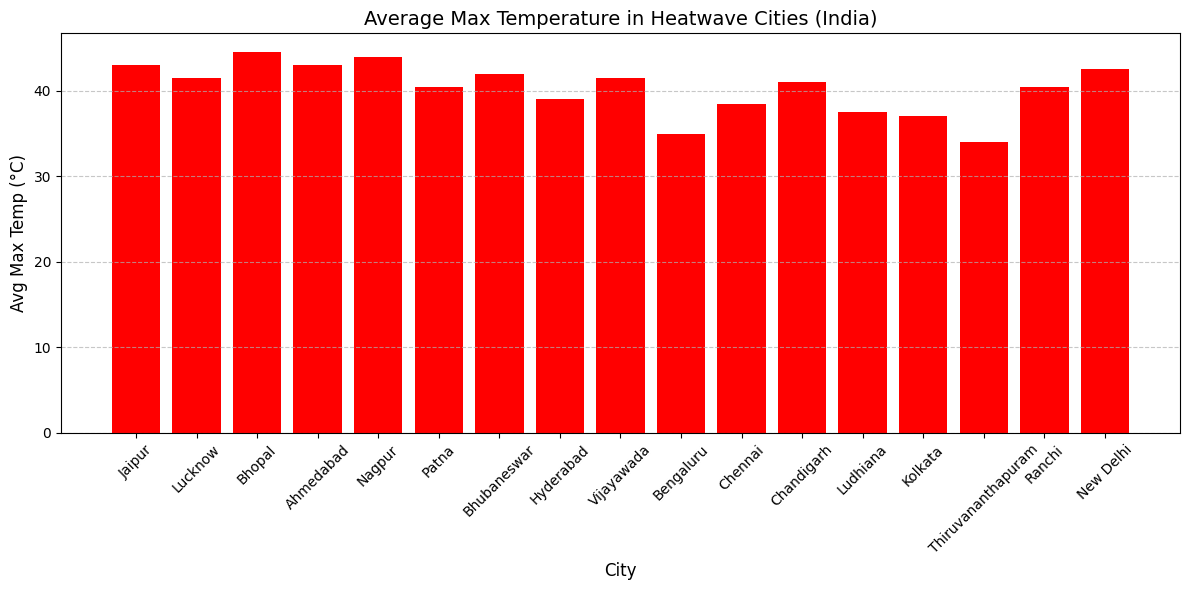

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your CSV (replace with your actual file path)
df = pd.read_csv('/content/Heatwave_cities_india.csv')  # Make sure your file is uploaded

# Step 2: Convert Max Temp range to average
def avg_temp_range(temp_range):
    parts = temp_range.replace('–', '-').split('-')
    return (float(parts[0]) + float(parts[1])) / 2

df['Avg Max Temp (°C)'] = df['Max Temp (°C)'].apply(avg_temp_range)

# Step 3: Plot
plt.figure(figsize=(12, 6))
plt.bar(df['City'], df['Avg Max Temp (°C)'], color='red')
plt.title('Average Max Temperature in Heatwave Cities (India)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Avg Max Temp (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


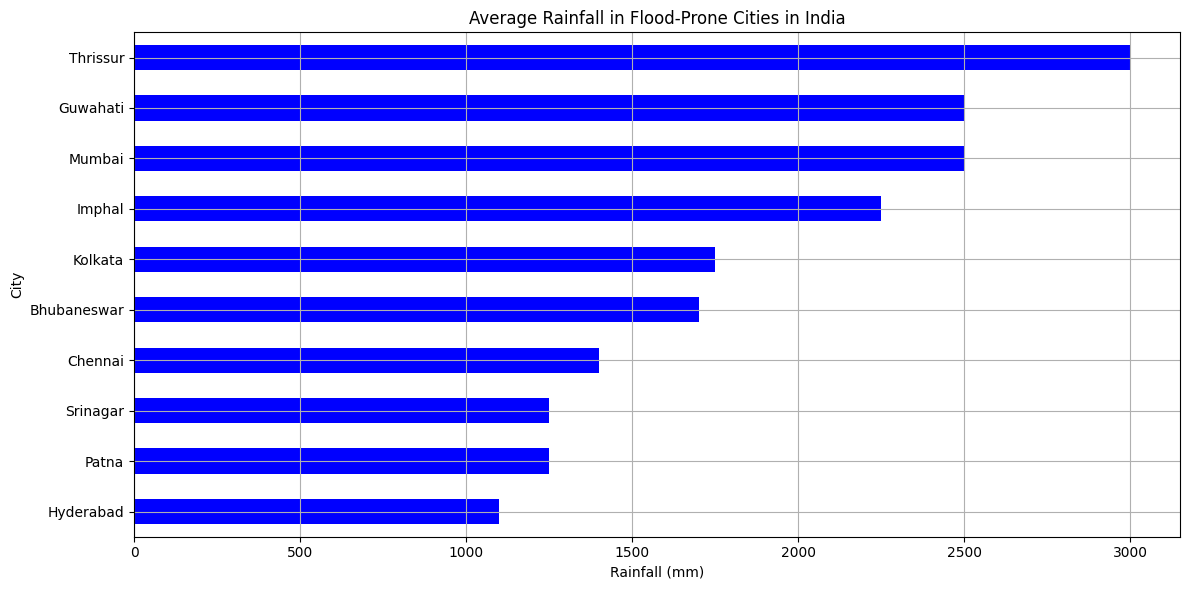

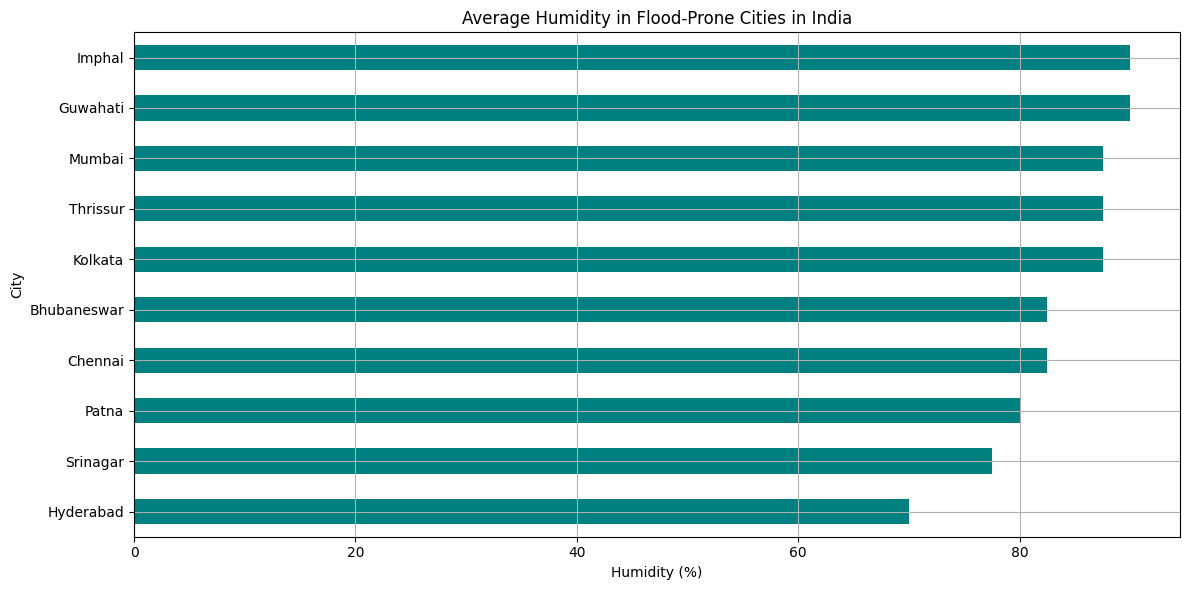

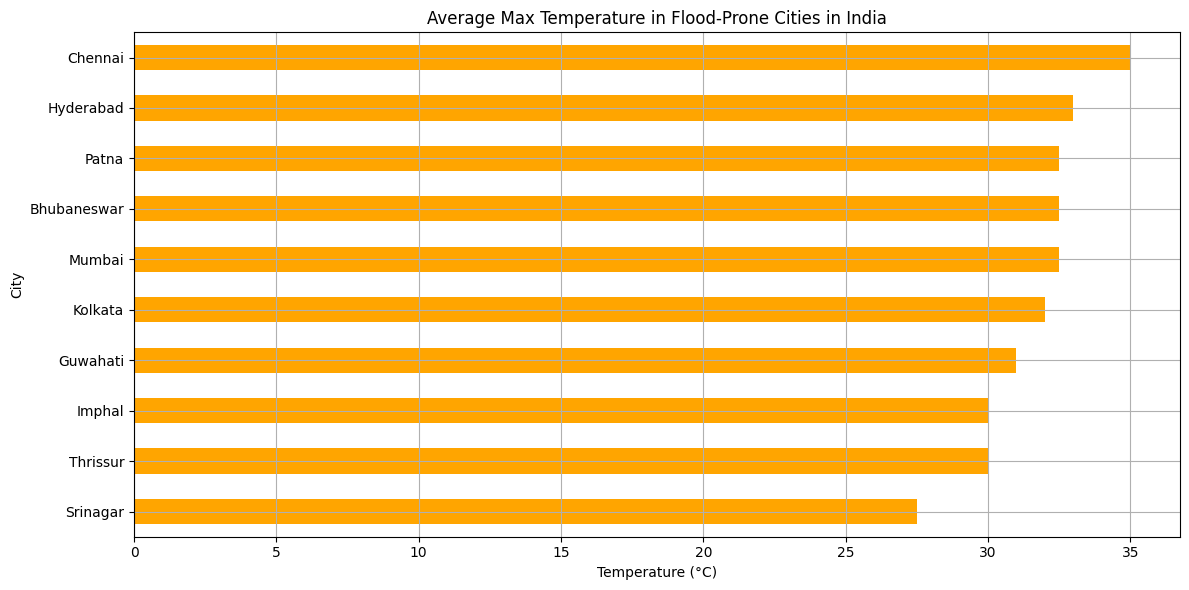

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/content/Flood_cities_india.csv'  # Change this path if needed
df = pd.read_csv(file_path)

# Helper function to extract average from a range (e.g., "2000–3000")
def average_range(value):
    try:
        parts = str(value).replace('–', '-').split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return float(parts[0])
    except:
        return None

# Apply average calculation
df['Avg Rainfall'] = df['Rainfall (mm)'].apply(average_range)
df['Avg Humidity'] = df['Humidity (%)'].apply(average_range)
df['Avg Max Temp'] = df['Max Temp (°C)'].apply(average_range)

# Set city as index for plotting
df.set_index('City', inplace=True)

# Plot 1: Average Rainfall
plt.figure(figsize=(12, 6))
df['Avg Rainfall'].sort_values().plot(kind='barh', color='blue')
plt.title('Average Rainfall in Flood-Prone Cities in India')
plt.xlabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Average Humidity
plt.figure(figsize=(12, 6))
df['Avg Humidity'].sort_values().plot(kind='barh', color='teal')
plt.title('Average Humidity in Flood-Prone Cities in India')
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Average Max Temperature
plt.figure(figsize=(12, 6))
df['Avg Max Temp'].sort_values().plot(kind='barh', color='orange')
plt.title('Average Max Temperature in Flood-Prone Cities in India')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


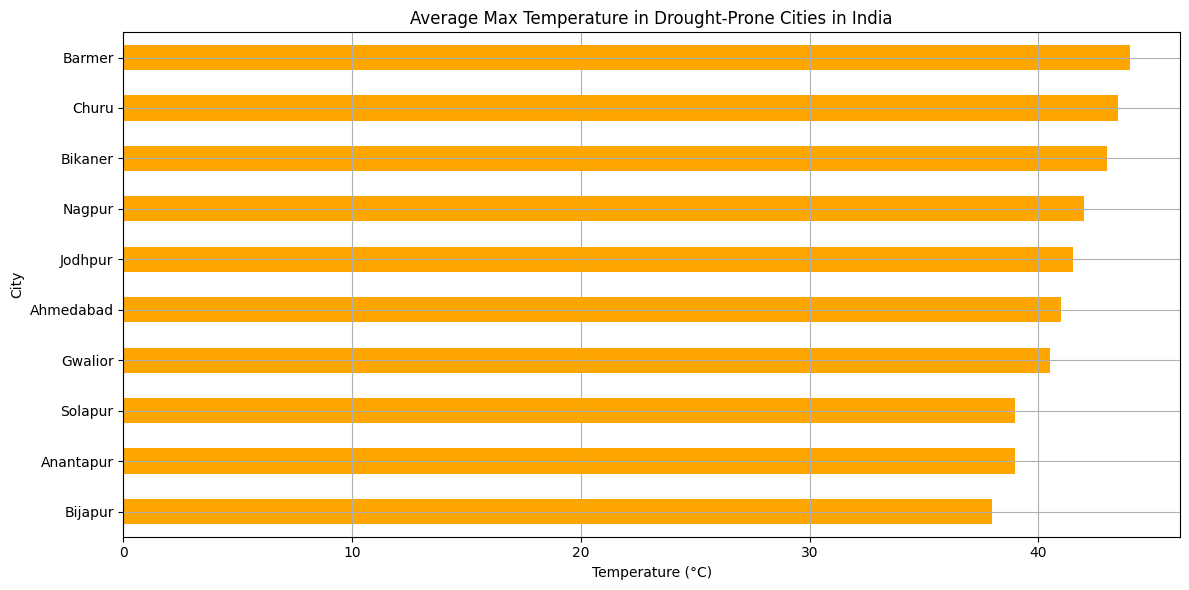

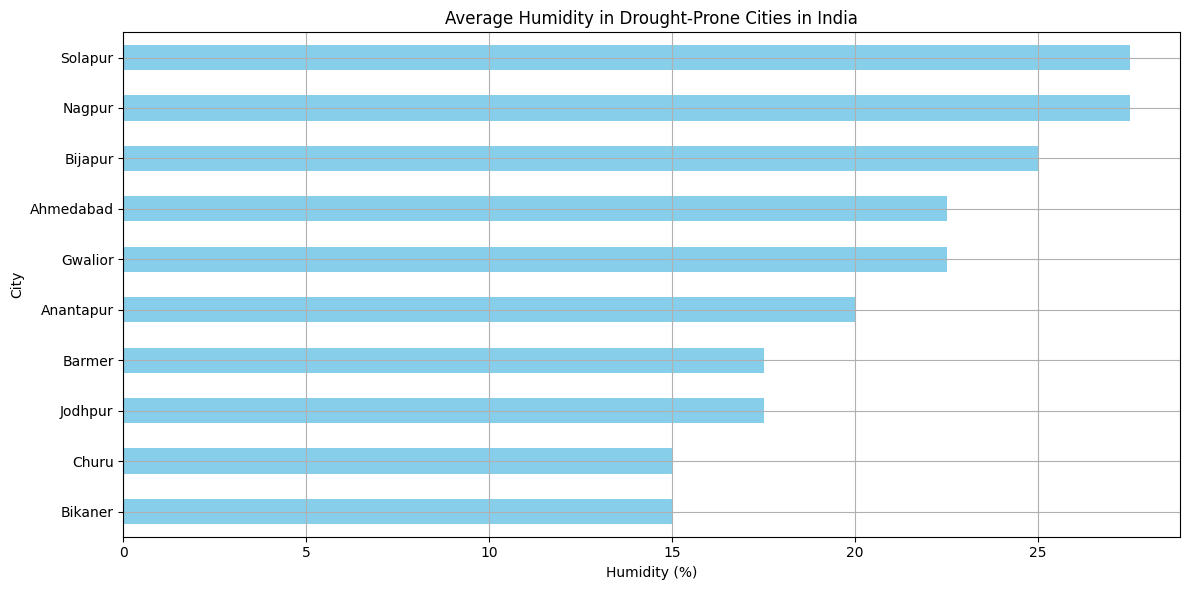

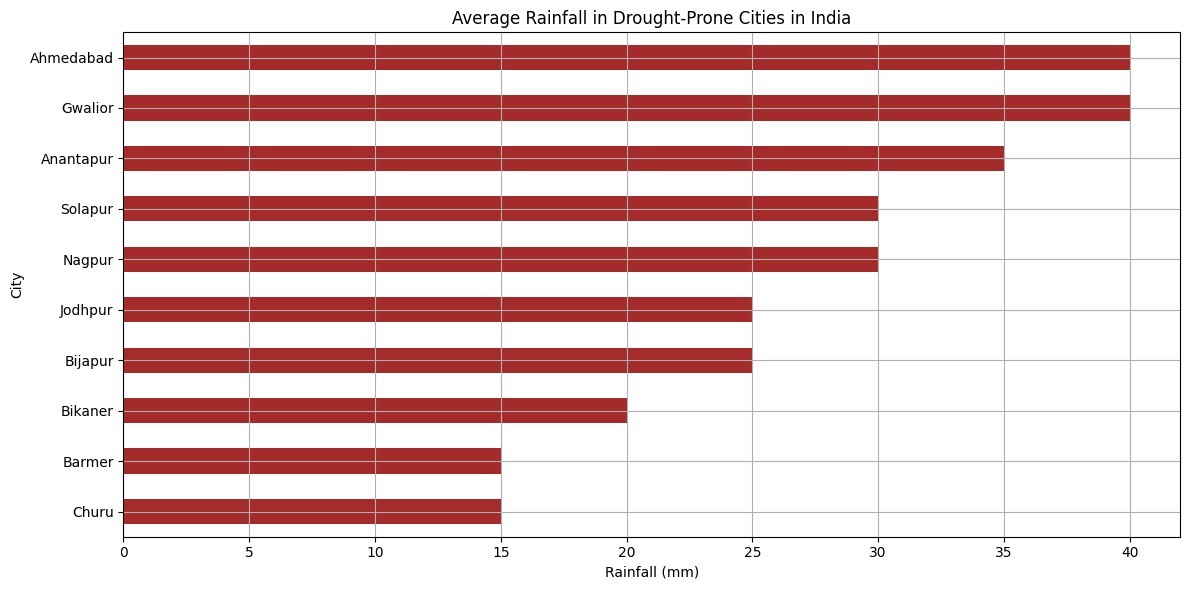

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = '/content/Drought_cities_india.csv'  # Change path if needed
df = pd.read_csv(file_path)

# Convert string ranges to numeric averages
def avg_range(value):
    try:
        value = str(value).replace('–', '-')
        parts = value.split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        return float(parts[0])
    except:
        return None

# Apply to relevant columns
df['Avg Max Temp'] = df['Max Temp (°C)'].apply(avg_range)
df['Avg Humidity'] = df['Humidity (%)'].apply(avg_range)
df['Avg Rainfall'] = df['Rainfall (mm)'].apply(avg_range)

# Set city as index
df.set_index('City', inplace=True)

# Plot: Max Temperature
plt.figure(figsize=(12, 6))
df['Avg Max Temp'].sort_values().plot(kind='barh', color='orange')
plt.title('Average Max Temperature in Drought-Prone Cities in India')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Humidity
plt.figure(figsize=(12, 6))
df['Avg Humidity'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Humidity in Drought-Prone Cities in India')
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Rainfall
plt.figure(figsize=(12, 6))
df['Avg Rainfall'].sort_values().plot(kind='barh', color='brown')
plt.title('Average Rainfall in Drought-Prone Cities in India')
plt.xlabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Install Folium if not already installed
!pip install folium

import pandas as pd
import folium

# Load the datasets
# Try with 'ISO-8859-1' (a common fallback for non-UTF-8 files)
drought_df = pd.read_csv('/content/Drought_cities_india.csv', encoding='ISO-8859-1')
flood_df = pd.read_csv('/content/Flood_cities_india.csv', encoding='ISO-8859-1')
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv', encoding='ISO-8859-1')

# Initialize map centered around India
map_center = [22.9734, 78.6569]  # Central India
disaster_map = folium.Map(location=map_center, zoom_start=5)

# Helper function to add markers
def add_markers(df, color, label):
    for _, row in df.iterrows():
        if 'Latitude' in row and 'Longitude' in row:
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=6,
                popup=f"{label}: {row.get('City', 'Unknown')}",
                color=color,
                fill=True,
                fill_opacity=0.7
            ).add_to(disaster_map)

# Add each disaster type with a unique color
add_markers(heatwave_df, 'red', 'Heatwave')
add_markers(flood_df, 'blue', 'Flood')
add_markers(drought_df, 'orange', 'Drought')

# Display the map
disaster_map


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Flood data
flood_df = pd.read_csv('/content/Flood_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
flood_map = folium.Map(location=map_center, zoom_start=5)

# Add flood markers
for _, row in flood_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (°C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="blue", icon="cloud")
    ).add_to(flood_map)

# Display map
display(flood_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Drought data
drought_df = pd.read_csv('/content/Drought_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
drought_map = folium.Map(location=map_center, zoom_start=5)

# Add drought markers
for _, row in drought_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (°C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="orange", icon="tint")
    ).add_to(drought_map)

# Display map
display(drought_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load Heatwave data
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
heatwave_map = folium.Map(location=map_center, zoom_start=5)

# Add heatwave markers
for _, row in heatwave_df.iterrows():
    popup_text = f"""
    <b>City:</b> {row['City']}<br>
    <b>Max Temp:</b> {row['Max Temp (°C)']}<br>
    <b>Humidity:</b> {row['Humidity (%)']}<br>
    <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
    <b>Pressure:</b> {row['Pressure (hPa)']}<br>
    <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color="red", icon="fire")
    ).add_to(heatwave_map)

# Display map
display(heatwave_map)


In [ ]:
import folium
import pandas as pd
from IPython.display import display

# Load the CSV files
drought_df = pd.read_csv('/content/Drought_cities_india.csv')
flood_df = pd.read_csv('/content/Flood_cities_india.csv')
heatwave_df = pd.read_csv('/content/Heatwave_cities_india.csv')

# Center of India
map_center = [22.9734, 78.6569]
combined_map = folium.Map(location=map_center, zoom_start=5)

# Feature groups for each type
drought_layer = folium.FeatureGroup(name="Drought (Orange)", show=True)
flood_layer = folium.FeatureGroup(name="Flood (Blue)", show=True)
heatwave_layer = folium.FeatureGroup(name="Heatwave (Red)", show=True)

# Function to add markers
def add_markers(df, layer, color, icon):
    for _, row in df.iterrows():
        popup_text = f"""
        <b>City:</b> {row['City']}<br>
        <b>Max Temp:</b> {row['Max Temp (°C)']}<br>
        <b>Humidity:</b> {row['Humidity (%)']}<br>
        <b>Rainfall:</b> {row['Rainfall (mm)']}<br>
        <b>Pressure:</b> {row['Pressure (hPa)']}<br>
        <b>Wind Speed:</b> {row['Wind Speed (km/h)']}
        """
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color=color, icon=icon)
        ).add_to(layer)

# Add markers to each layer
add_markers(drought_df, drought_layer, "orange", "tint")
add_markers(flood_df, flood_layer, "blue", "cloud")
add_markers(heatwave_df, heatwave_layer, "red", "fire")

# Add layers to map
drought_layer.add_to(combined_map)
flood_layer.add_to(combined_map)
heatwave_layer.add_to(combined_map)

# Add layer control
folium.LayerControl(collapsed=False).add_to(combined_map)

# Custom legend without a box (just colors and text)
legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; font-size:14px; z-index:9999;">
    <b>Disaster Legend</b><br>
    <i style="background-color:red; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Heatwave<br>
    <i style="background-color:orange; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Drought<br>
    <i style="background-color:blue; border-radius:50%; width:20px; height:20px; display:inline-block;"></i>&nbsp; Flood
</div>
"""
combined_map.get_root().html.add_child(folium.Element(legend_html))

# Show in Colab
display(combined_map)
